# **Explorative Data- Analyse (EDA)**

# travel_tide


## Import Bibliotheken


In [1]:
# notebook: notebooks/load_data.ipynb
# TravelTide Rewards Program - Datenanalyse und Clustering

# ============================================================
# 📚 IMPORT DER NOTWENDIGEN BIBLIOTHEKEN
# ============================================================

# Grundlegende Python Bibliotheken für System-Operationen
import os          # Betriebssystem-Interaktion: Dateipfade, Verzeichnisse
import sys         # System-spezifische Parameter: Python-Pfad-Manipulation

# Datenanalyse und -manipulation Bibliotheken
import pandas as pd    # 📊 Hauptbibliothek für Datenanalyse: DataFrames, Datenmanipulation
import numpy as np     # 🔢 Numerische Berechnungen: Mathematik, Arrays, lineare Algebra

# Visualisierungsbibliotheken für Diagramme und Grafiken
import matplotlib.pyplot as plt  # 📈 Grundlegende Plotting-Bibliothek: Linien, Balken, Scatter Plots
import seaborn as sns            # 🎨 Erweiterte Visualisierung: Statistische Grafiken, ansprechendes Design
import matplotlib as mpl         # 🔧 Matplotlib Hauptmodul für Version-Info

# ============================================================
# 🗂️  PROJEKTSTRUKTUR KONFIGURATION
# ============================================================

# Füge das Projekt-Root-Verzeichnis zum Python-Pfad hinzu
# Dies ermöglicht Importe aus unseren eigenen Modulen im core/ Verzeichnis
project_root = os.path.abspath("..")  # Gehe eine Ebene hoch vom aktuellen Verzeichnis

# Überprüfe ob der Projekt-Root bereits im Python-Pfad enthalten ist
if project_root not in sys.path:
    # Füge Projekt-Root zum Python-Pfad hinzu, damit Importe funktionieren
    sys.path.append(project_root)

# Bestätigungsausgabe
print("✅ Project root added to sys.path:", project_root)

# ============================================================
# 🎯 ZWECK DIESES NOTEBOOKS:
# ============================================================

"""
TravelTide Rewards Program - Datenanalyse Pipeline

HAUPTZIELE:
1. 📥 Daten laden und vorbereiten
2. 🔍 Explorative Datenanalyse (EDA) durchführen  
3. 👥 Kundensegmentierung mit Clustering
4. 🎁 Personalisierte Rewards-Perks empfehlen
5. 📊 Ergebnisse visualisieren und interpretieren

DATENQUELLEN:
• users.csv     - 1.020.926 Nutzer (Demografische Daten)
• sessions.csv  - 5.408.063 Sitzungen (Verhaltensdaten)
• flights.csv   - 1.901.038 Flüge (Buchungsdaten)
• hotels.csv    - 1.918.617 Hotelbuchungen (Aufenthaltsdaten)

NÄCHSTE SCHRITTE:
1. Datenbankverbindung initialisieren
2. Tabellen laden
3. Datenqualität prüfen
4. Features für Clustering vorbereiten
"""

# ============================================================
# 🎨 VISUALISIERUNGS-KONFIGURATION
# ============================================================

def setup_visualization_style():
    """
    Konfiguriert das Erscheinungsbild für alle Visualisierungen
    """
    # Seaborn Style für ansprechende Grafiken
    sns.set_style("whitegrid")           # 👔 Sauberes Design mit Gitternetz
    sns.set_palette("husl")              # 🎨 Farbpalette für klare Unterscheidung
    
    # Matplotlib Einstellungen
    plt.rcParams['figure.figsize'] = (12, 8)    # 📐 Standard-Größe für Plots
    plt.rcParams['font.size'] = 12              # 🔤 Schriftgröße für Lesbarkeit
    plt.rcParams['axes.titlesize'] = 16         # 🏷️  Titel-Größe
    plt.rcParams['axes.labelsize'] = 14         # 📝 Achsen-Beschriftungen
    
    print("✅ Visualization style configured")

# Visualisierung konfigurieren
setup_visualization_style()

# ============================================================
# 🔧 HILFSFUNKTIONEN FÜR DIE ANALYSE
# ============================================================

def check_environment():
    """
    Überprüft die Python-Umgebung und installierte Pakete
    KORREKTUR: Verwende matplotlib.__version__ statt plt.__version__
    """
    print("🔍 ENVIRONMENT CHECK:")
    print("=" * 40)
    
    # Python Version
    print(f"• Python Version: {sys.version.split()[0]}")  # Nur Version ohne zusätzliche Info
    
    # Wichtige Paket-Versionen - KORRIGIERTE VERSION
    packages = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'matplotlib': mpl.__version__,  # ✅ KORREKT: Verwende matplotlib, nicht plt
        'seaborn': sns.__version__
    }
    
    for package, version in packages.items():
        print(f"• {package:12} v{version}")
    
    # Verifizierung der Projektstruktur
    current_dir = os.getcwd()
    print(f"\n📁 Current directory: {current_dir}")
    print(f"📁 Project root: {project_root}")

# Umgebungs-Check durchführen
check_environment()

# ============================================================
# 📁 PROJEKTSTRUKTUR VERIFIZIERUNG
# ============================================================

def verify_project_structure():
    """
    Überprüft ob alle benötigten Verzeichnisse existieren
    """
    print("\n📁 PROJECT STRUCTURE VERIFICATION:")
    print("=" * 45)
    
    required_dirs = [
        os.path.join(project_root, 'data'),
        os.path.join(project_root, 'data', 'raw'),
        os.path.join(project_root, 'data', 'processed'), 
        os.path.join(project_root, 'notebooks'),
        os.path.join(project_root, 'core'),
        os.path.join(project_root, 'sql')
    ]
    
    all_dirs_exist = True
    for dir_path in required_dirs:
        exists = os.path.exists(dir_path)
        status = "✅" if exists else "❌"
        dir_name = os.path.basename(dir_path)
        parent_name = os.path.basename(os.path.dirname(dir_path))
        print(f"{status} {parent_name}/{dir_name}")
        
        if not exists:
            all_dirs_exist = False
    
    if all_dirs_exist:
        print("\n🎉 All project directories are properly set up!")
    else:
        print("\n⚠️  Some directories are missing. Please check the project structure.")

# Projektstruktur verifizieren
verify_project_structure()

# ============================================================
# 🚀 IMPORT UNSERER EIGENEN MODULE
# ============================================================

def import_custom_modules():
    """
    Importiert unsere eigenen TravelTide Analyse-Module
    """
    print("\n📦 IMPORTING CUSTOM MODULES:")
    print("=" * 40)
    
    try:
        # Importiere unsere core Module
        from core.utils import init_connection, execute_query
        from core.load_data import load_table, load_custom_query
        from core.eda import missing_values_summary, show_summary_stats
        
        print("✅ core.utils imported successfully")
        print("✅ core.load_data imported successfully") 
        print("✅ core.eda imported successfully")
        
        # Datenbankverbindung initialisieren
        print("\n🗄️  INITIALIZING DATABASE CONNECTION...")
        init_connection()
        print("✅ Database connection established")
        
        return True
        
    except ImportError as e:
        print(f"❌ Error importing custom modules: {e}")
        print("\n🔧 TROUBLESHOOTING TIPS:")
        print("• Check if core/__init__.py exists")
        print("• Verify project_root is correct")
        print("• Ensure all modules are in the core/ directory")
        return False

# Eigene Module importieren
modules_imported = import_custom_modules()

# ============================================================
# 📊 DATENLADUNG VORBEREITEN
# ============================================================

def prepare_data_loading():
    """
    Bereitet das Laden der TravelTide Daten vor
    """
    print("\n📥 PREPARING DATA LOADING:")
    print("=" * 40)
    
    if modules_imported:
        print("✅ Ready to load TravelTide datasets:")
        datasets = {
            'users': '👥 1M+ Nutzer (Demografische Daten)',
            'sessions': '🌐 5.4M+ Sitzungen (Verhaltensdaten)',
            'flights': '✈️  1.9M+ Flüge (Buchungsdaten)',
            'hotels': '🏨 1.9M+ Hotelbuchungen (Aufenthaltsdaten)'
        }
        
        for dataset, description in datasets.items():
            print(f"   • {dataset:10} {description}")
        
        print("\n🎯 NEXT STEPS:")
        print("1. Load tables using: load_table('raw', 'users')")
        print("2. Check data quality with: missing_values_summary(users_df)")
        print("3. Explore data with: show_summary_stats(users_df)")
        print("4. Prepare features for clustering")
        
    else:
        print("❌ Cannot prepare data loading - modules not imported")

# Datenladung vorbereiten
prepare_data_loading()

# ============================================================
# 💡 TIPPS FÜR DIE WEITERE ARBEIT
# ============================================================

print("\n💡 USEFUL TIPS FOR THIS NOTEBOOK:")
print("=" * 40)

tips = [
    "📊 Use missing_values_summary() to check data quality",
    "📈 Use show_summary_stats() for quick statistical overview", 
    "🔍 Explore data with df.head() and df.info()",
    "🎨 Create visualizations with plt and sns",
    "💾 Save processed data with df.to_csv()",
    "📁 Use load_table() for consistent data loading",
    "🔄 Restart kernel if you encounter memory issues",
    "📝 Document your findings with markdown cells"
]

for i, tip in enumerate(tips, 1):
    print(f"{i:2d}. {tip}")

# ============================================================
# ✅ ZUSAMMENFASSUNG
# ============================================================

print("\n" + "="*60)
print("✅ NOTEBOOK INITIALIZATION COMPLETE")
print("="*60)

print(f"""
🎯 READY FOR TRAVELTIDE REWARDS PROGRAM ANALYSIS:

📊 Data Sources:
  • Users:      ~1,020,926 records
  • Sessions:   ~5,408,063 records  
  • Flights:    ~1,901,038 records
  • Hotels:     ~1,918,617 records

🔧 Environment:
  • Python path configured ✅
  • Visualization style set ✅
  • Custom modules imported {'✅' if modules_imported else '❌'}
  • Project structure verified ✅

🚀 Next Steps:
  1. Load the datasets
  2. Perform exploratory data analysis
  3. Prepare features for clustering
  4. Segment customers into groups
  5. Recommend personalized perks
""")

print("🎉 You're ready to start the TravelTide Rewards Program analysis!")

✅ Project root added to sys.path: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide
✅ Visualization style configured
🔍 ENVIRONMENT CHECK:
• Python Version: 3.11.14
• pandas       v2.3.3
• numpy        v2.3.4
• matplotlib   v3.10.7
• seaborn      v0.13.2

📁 Current directory: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/notebooks
📁 Project root: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide

📁 PROJECT STRUCTURE VERIFICATION:
✅ Travel_tide/data
✅ data/raw
✅ data/processed
✅ Travel_tide/notebooks
✅ Travel_tide/core
✅ Travel_tide/sql

🎉 All project directories are properly set up!

📦 IMPORTING CUSTOM MODULES:
:weißes_häkchen: Connected to PostgreSQL database.
❌ Error importing custom modules: cannot import name 'show_summary_stats' from 'core.eda' (/Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/eda.py)

🔧 TROUBLESHOOTING TIPS:
• Check if core/__init__.py exists
• Verify project_root is correct
• Ensure all mod

## import core functions


In [2]:
# ============================================================
# 📥 IMPORT DER DATENLADE-FUNKTIONEN AUS CORE MODUL
# ============================================================

# Importiert spezifische Funktionen aus dem core.load_data Modul
from core.load_data import load_table, load_custom_query

# ============================================================
# 🎯 ZWECK DIESES IMPORTS:
# 
# Lädt die beiden Hauptfunktionen für das Datenmanagement:
# 
# 1. 📊 `load_table()` - Für standardisiertes Laden kompletter Tabellen
# 2. 🔍 `load_custom_query()` - Für flexible, benutzerdefinierte SQL-Abfragen
# 
# Diese Funktionen bilden die Grundlage für den gesamten Datenzugriff
# im TravelTide Rewards Program Analysis Projekt.
# ============================================================

# 💡 WAS SIND DIESE FUNKTIONEN?
# 
# `load_table(data_type, table_name, show_table_display=False)`
# • **Zweck**: Lädt komplette Datentabellen aus verschiedenen Quellen
# • **Quellen**: CSV-Dateien, SQL-Datenbank, SQL-Dateien
# • **Intelligentes Caching**: Auto-Speicherung geladener Daten
# • **Use Case**: "Ich möchte die gesamte Users-Tabelle laden"
# 
# `load_custom_query(sql_query_string)`
# • **Zweck**: Führt benutzerdefinierte SQL-Abfragen aus
# • **Flexibilität**: Beliebig komplexe JOINs, Filter, Aggregationen
# • **Use Case**: "Ich möchte spezifische Nutzer mit bestimmten Merkmalen analysieren"
# ============================================================

# 🏗️  PROJEKTSTRUKTUR - WO DIE FUNKTIONEN DEFINIERT SIND:
# 
# traveltide_analysis/
# ├── core/
# │   ├── __init__.py
# │   ├── load_data.py          # 🎯 Enthält load_table() und load_custom_query()
# │   ├── utils.py
# │   └── eda.py
# 
# Die importierten Funktionen befinden sich in: core/load_data.py
# ============================================================

# 🔧 TECHNISCHE FUNKTIONSWEISE:

def explain_load_table_workflow():
    """
    Erklärt den intelligenten Workflow der load_table() Funktion
    """
    print("\n🔄 LOAD_TABLE() INTELLIGENTER WORKFLOW:")
    print("=" * 45)
    
    steps = [
        "1. 📁 Prüft ob lokale CSV-Datei existiert",
        "2. 💾 Falls ja: Schnelles Laden aus CSV-Cache",
        "3. 🗄️  Falls nein: Lädt aus Datenbank",
        "4. 💾 Auto-Speicherung als CSV für zukünftige Zugriffe",
        "5. 📊 Optional: Zeigt Datenvorschau an"
    ]
    
    for step in steps:
        print(f"   {step}")

def explain_data_types():
    """
    Erklärt die verschiedenen data_type Parameter für load_table()
    """
    print("\n📁 DATEN-TYPEN FÜR LOAD_TABLE():")
    print("=" * 40)
    
    data_types = {
        'raw': "📦 Rohdaten - Unveränderte Originaldaten aus der Datenbank",
        'processed': "🔧 Aufbereitete Daten - Bereinigte und transformierte Daten", 
        'sql': "🗃️  SQL-Dateien - Ausführbare SQL-Skripte",
        'feature': "🎯 Feature-Daten - Für ML vorbereitete Features",
        'segment': "👥 Segment-Daten - Kundensegmentierungs-Ergebnisse",
        'pca': "📊 PCA-Daten - Hauptkomponenten-Analyse Ergebnisse",
        'kmean': "🔍 Clustering-Daten - K-Means Cluster-Zuordnungen"
    }
    
    for dtype, description in data_types.items():
        print(f"   • '{dtype}': {description}")

# ============================================================
# 🚀 PRAKTISCHE ANWENDUNGSBEISPIELE:
# ============================================================

def demonstrate_usage_examples():
    """
    Zeigt praktische Anwendungsbeispiele für die importierten Funktionen
    """
    print("\n🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:")
    print("=" * 45)
    
    print("📊 LOAD_TABLE() BEISPIELE:")
    examples = [
        "# Lädt Rohdaten der Users-Tabelle",
        "users_df = load_table('raw', 'users')",
        "",
        "# Lädt aufbereitete Sessions mit Vorschau", 
        "sessions_df = load_table('processed', 'sessions', show_table_display=True)",
        "",
        "# Lädt Features für Clustering",
        "features_df = load_table('feature', 'customer_features')"
    ]
    
    for example in examples:
        print(f"   {example}")
    
    print("\n🔍 LOAD_CUSTOM_QUERY() BEISPIELE:")
    query_examples = [
        "# Nutzer mit Kindern die Flüge gebucht haben",
        "query = '''",
        "SELECT u.*, COUNT(f.trip_id) as flight_count",
        "FROM users u",
        "JOIN sessions s ON u.user_id = s.user_id", 
        "JOIN flights f ON s.trip_id = f.trip_id",
        "WHERE u.has_children = true AND s.flight_booked = true",
        "GROUP BY u.user_id",
        "'''",
        "families_df = load_custom_query(query)"
    ]
    
    for example in query_examples:
        print(f"   {example}")

# ============================================================
# 💡 VORTEILE DIESES IMPORT-ANSATZES:
# ============================================================

def explain_benefits():
    """
    Erklärt die Vorteile dieses modularen Import-Ansatzes
    """
    print("\n⭐ VORTEILE DIESES IMPORTS:")
    print("=" * 35)
    
    benefits = [
        "🎯 **Gezielte Importe**: Nur benötigte Funktionen werden geladen",
        "⚡ **Performance**: Kein Overhead durch unnötige Imports", 
        "🔧 **Wartbarkeit**: Klare Abhängigkeiten und einfaches Refactoring",
        "📚 **Readability**: Deutlich sichtbar welche Funktionen verwendet werden",
        "🛡️ **Namespace**: Vermeidet Namenskonflikte mit anderen Modulen"
    ]
    
    for benefit in benefits:
        print(f"   {benefit}")

# ============================================================
# 🔍 VERIFIZIERUNG DES ERFOLGREICHEN IMPORTS:
# ============================================================

def verify_successful_import():
    """
    Überprüft ob der Import erfolgreich war und die Funktionen verfügbar sind
    """
    print("\n🔍 IMPORT VERIFIZIERUNG:")
    print("=" * 35)
    
    try:
        # Teste ob die Funktionen tatsächlich verfügbar sind
        if 'load_table' in globals() and 'load_custom_query' in globals():
            print("✅ load_table: Erfolgreich importiert")
            print("✅ load_custom_query: Erfolgreich importiert")
            print("🎉 Beide Funktionen sind jetzt verfügbar!")
            return True
        else:
            print("�️⚠️  Einige Funktionen konnten nicht importiert werden")
            return False
            
    except Exception as e:
        print(f"❌ Fehler bei der Import-Verifizierung: {e}")
        return False

# ============================================================
# 🎯 AUSFÜHRUNG DER ERKLÄRUNGEN UND BEISPIELE:
# ============================================================

print("✅ IMPORT ERFOLGREICH: from core.load_data import load_table, load_custom_query")

# Erkläre die Funktionsweise
explain_load_table_workflow()
explain_data_types()

# Zeige praktische Beispiele
demonstrate_usage_examples()

# Erkläre die Vorteile
explain_benefits()

# Verifiziere den Import
import_successful = verify_successful_import()

# ============================================================
# 🚀 EMPFOHLENE NÄCHSTE SCHRITTE:
# ============================================================

if import_successful:
    print("\n🎯 EMPFOHLENE NÄCHSTE SCHRITTE:")
    print("=" * 40)
    
    next_steps = [
        "1. 📥 Datenbankverbindung initialisieren: from core.utils import init_connection",
        "2. 🔗 Verbindung herstellen: init_connection()", 
        "3. 👥 Users-Tabelle laden: users_df = load_table('raw', 'users')",
        "4. 🌐 Sessions-Tabelle laden: sessions_df = load_table('raw', 'sessions')",
        "5. ✈️  Flights-Tabelle laden: flights_df = load_table('raw', 'flights')",
        "6. 🏨 Hotels-Tabelle laden: hotels_df = load_table('raw', 'hotels')",
        "7. 🔍 Datenqualität prüfen: from core.eda import missing_values_summary"
    ]
    
    for step in next_steps:
        print(f"   {step}")

# ============================================================
# ⚠️  FEHLERBEHEBUNG BEI IMPORT-PROBLEMEN:
# ============================================================

def troubleshooting_guide():
    """
    bietet Lösungen für häufige Import-Probleme
    """
    print("\n🔧 FEHLERBEHEBUNGS-GUIDE:")
    print("=" * 35)
    
    problems_solutions = {
        "ModuleNotFoundError": [
            "• Überprüfe ob core/__init__.py existiert",
            "• Stelle sicher dass project_root in sys.path ist",
            "• Prüfe die Projektstruktur"
        ],
        "ImportError": [
            "• Überprüfe ob load_table in core/load_data.py definiert ist",
            "• Prüfe auf Tippfehler in Funktionsnamen",
            "• Starte den Kernel neu und versuche es erneut"
        ],
        "AttributeError": [
            "• Funktion wurde in core/__init__.py nicht exportiert",
            "• Prüfe die __all__ Liste in core/__init__.py",
            "• Verwende: from core.load_data import load_table"
        ]
    }
    
    for problem, solutions in problems_solutions.items():
        print(f"   🚨 {problem}:")
        for solution in solutions:
            print(f"      {solution}")

# Fehlerbehandlungs-Guide anzeigen
troubleshooting_guide()

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ IMPORT ZUSAMMENFASSUNG")
print("="*60)

print(f"""
🎯 ERFOLGREICH IMPORTIERT:

📊 load_table() Funktion:
  • Lädt Tabellen aus verschiedenen Quellen
  • Intelligentes Caching für Performance  
  • Unterstützt multiple Daten-Typen
  • Automatische Daten-Transformation

🔍 load_custom_query() Funktion:
  • Führt beliebige SQL-Abfragen aus
  • Maximale Flexibilität für komplexe Analysen
  • Ideal für spezifische Business-Fragen
  • Direkte Integration in pandas DataFrames

🚀 BEREIT FÜR DIE DATENANALYSE:
  Beide Funktionen stehen jetzt für das TravelTide
  Rewards Program Analysis zur Verfügung!
""")

print("🎉 Sie können jetzt mit dem Laden der TravelTide-Daten beginnen!")

✅ IMPORT ERFOLGREICH: from core.load_data import load_table, load_custom_query

🔄 LOAD_TABLE() INTELLIGENTER WORKFLOW:
   1. 📁 Prüft ob lokale CSV-Datei existiert
   2. 💾 Falls ja: Schnelles Laden aus CSV-Cache
   3. 🗄️  Falls nein: Lädt aus Datenbank
   4. 💾 Auto-Speicherung als CSV für zukünftige Zugriffe
   5. 📊 Optional: Zeigt Datenvorschau an

📁 DATEN-TYPEN FÜR LOAD_TABLE():
   • 'raw': 📦 Rohdaten - Unveränderte Originaldaten aus der Datenbank
   • 'processed': 🔧 Aufbereitete Daten - Bereinigte und transformierte Daten
   • 'sql': 🗃️  SQL-Dateien - Ausführbare SQL-Skripte
   • 'feature': 🎯 Feature-Daten - Für ML vorbereitete Features
   • 'segment': 👥 Segment-Daten - Kundensegmentierungs-Ergebnisse
   • 'pca': 📊 PCA-Daten - Hauptkomponenten-Analyse Ergebnisse
   • 'kmean': 🔍 Clustering-Daten - K-Means Cluster-Zuordnungen

🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:
📊 LOAD_TABLE() BEISPIELE:
   # Lädt Rohdaten der Users-Tabelle
   users_df = load_table('raw', 'users')
   
   # Lädt aufbereit

In [38]:
from core.load_data import load_table, load_custom_query

In [4]:
# ============================================================
# 🔍 MODUL VERIFIZIERUNG - CORE MODULE IMPORT TEST
# ============================================================

# Versucht das core Modul zu importieren und überprüft ob es verfügbar ist
try:
    # Importiere das core Package/Modul
    import core

    # Bei erfolgreichem Import: Zeige Bestätigung und Dateipfad
    print("✅ core module found at:", core.__file__)

except ModuleNotFoundError:
    # Dieser Block wird ausgeführt wenn das core Modul NICHT gefunden werden kann
    print("❌ core module not found. Check your sys.path!")

# ============================================================
# 🎯 ZWECK DIESES CODES:
# 
# Diese Verifizierung dient als wichtiger System-Check um sicherzustellen:
# 
# 1. ✅ Das core Package ist korrekt installiert/verfügbar
# 2. ✅ Der Python-Pfad (sys.path) korrekt konfiguriert ist  
# 3. ✅ Die Projektstruktur richtig eingerichtet ist
# 4. ✅ Alle weiteren Imports aus core funktionieren werden
# ============================================================

# 💡 WAS WIRD HIER GETESTET?

"""
Projekt-Struktur die verifiziert wird:
traveltide_analysis/          # 🎯 PROJECT ROOT (muss in sys.path sein)
├── core/                     # ⚙️  Core Package (wird importiert)
│   ├── __init__.py          #    🚨 MUSS existieren (macht Ordner zum Package)
│   ├── utils.py             #    Utility-Funktionen
│   ├── load_data.py         #    Daten-Lade-Funktionen  
│   └── eda.py               #    Explorative Datenanalyse

Der Test prüft ob Python das core/ Verzeichnis als 
gültiges Package erkennen und importieren kann.
"""

# ============================================================
# 🔧 TECHNISCHE ERKLÄRUNG:
# ============================================================

def explain_import_mechanism():
    """
    Erklärt den technischen Hintergrund des Import-Mechanismus
    """
    print("\n🔧 TECHNISCHE FUNKTIONSWEISE:")
    print("=" * 40)
    
    mechanisms = [
        "1. Python sucht in sys.path nach 'core'",
        "2. Prüft ob core/__init__.py existiert → Package",
        "3. Lädt core/__init__.py und führt es aus", 
        "4. Macht darin definierte Funktionen verfügbar",
        "5. core.__file__ zeigt den Pfad zur __init__.py"
    ]
    
    for mechanism in mechanisms:
        print(f"   {mechanism}")

# Erkläre den Import-Mechanismus
explain_import_mechanism()

# ============================================================
# 📍 BEDEUTUNG VON CORE.__FILE__:
# ============================================================

def explain_core_file_attribute():
    """
    Erklärt die Bedeutung des core.__file__ Attributes
    """
    print("\n📁 BEDEUTUNG VON CORE.__FILE__:")
    print("=" * 35)
    
    try:
        import core
        file_path = core.__file__
        
        print(f"🔍 Aktueller Pfad: {file_path}")
        
        # Analyse des Pfades
        if "core/__init__.py" in file_path or "core\\__init__.py" in file_path:
            print("✅ Korrekt: Zeigt auf __init__.py (Package-Struktur)")
        else:
            print("⚠️  Unerwartet: Sollte auf __init__.py zeigen")
            
        # Verzeichnis-Ebene
        core_dir = os.path.dirname(file_path)
        print(f"📂 Core Verzeichnis: {core_dir}")
        
    except Exception as e:
        print(f"❌ Konnte core.__file__ nicht analysieren: {e}")

# ============================================================
# 🚨 FEHLERDIAGNOSE BEI MODULNOTFOUNDERROR:
# ============================================================

def diagnose_import_issues():
    """
    Bietet detaillierte Diagnose bei Import-Problemen
    """
    print("\n🔍 DETAILIERTE IMPORT-DIAGNOSE:")
    print("=" * 40)
    
    # 1. Aktuellen sys.path überprüfen
    print("📋 1. SYS.PATH ÜBERPRÜFUNG:")
    current_paths = sys.path
    project_root_found = any(project_root in path for path in current_paths)
    
    print(f"   • Project root in sys.path: {'✅' if project_root_found else '❌'}")
    print(f"   • Anzahl Pfade in sys.path: {len(current_paths)}")
    
    # 2. Projektstruktur überprüfen
    print("\n📁 2. PROJEKTSTRUKTUR ÜBERPRÜFUNG:")
    required_paths = [
        os.path.join(project_root, "core"),
        os.path.join(project_root, "core", "__init__.py"),
        os.path.join(project_root, "core", "load_data.py"),
        os.path.join(project_root, "core", "utils.py")
    ]
    
    for path in required_paths:
        exists = os.path.exists(path)
        status = "✅" if exists else "❌"
        item_name = os.path.basename(path)
        print(f"   • {status} {item_name:20} {'Existiert' if exists else 'FEHLT'}")
    
    # 3. Alternative Import-Methoden testen
    print("\n🔄 3. ALTERNATIVE IMPORT-METHODEN:")
    alternatives = [
        ("from core import load_data", "Gezielter Submodul-Import"),
        ("import core.load_data", "Vollständiger Submodul-Pfad"),
        ("import sys; print(sys.path)", "Sys.path Debugging")
    ]
    
    for alternative, description in alternatives:
        print(f"   • {alternative:30} # {description}")

# ============================================================
# ✅ ERFOLGS-SZENARIEN:
# ============================================================

def successful_scenarios():
    """
    Zeigt was bei erfolgreichem Import passieren sollte
    """
    print("\n✅ ERFOLGS-SZENARIEN:")
    print("=" * 35)
    
    scenarios = [
        "🎯 core.__file__ zeigt auf: .../traveltide_analysis/core/__init__.py",
        "📚 Weitere Imports sind jetzt möglich:",
        "   • from core.utils import init_connection",
        "   • from core.load_data import load_table", 
        "   • from core.eda import missing_values_summary",
        "🚀 Datenbankverbindung kann initialisiert werden",
        "📊 TravelTide-Daten können geladen werden"
    ]
    
    for scenario in scenarios:
        print(f"   {scenario}")

# ============================================================
# 🔄 NÄCHSTE SCHRITTE NACH ERFOLGREICHER VERIFIZIERUNG:
# ============================================================

def next_steps_after_success():
    """
    Zeigt die empfohlenen nächsten Schritte nach erfolgreichem Import
    """
    print("\n🎯 NÄCHSTE SCHRITTE NACH ERFOLGREICHEM IMPORT:")
    print("=" * 50)
    
    steps = [
        "1. 🔗 Datenbankverbindung herstellen",
        "   from core.utils import init_connection",
        "   init_connection()",
        "",
        "2. 📥 TravelTide-Tabellen laden", 
        "   from core.load_data import load_table",
        "   users_df = load_table('raw', 'users')",
        "   sessions_df = load_table('raw', 'sessions')",
        "",
        "3. 🔍 Datenqualität prüfen",
        "   from core.eda import missing_values_summary",
        "   missing_values_summary(users_df)",
        "",
        "4. 📊 Erste Analysen durchführen",
        "   from core.eda import show_summary_stats", 
        "   show_summary_stats(users_df)"
    ]
    
    for step in steps:
        print(f"   {step}")

# ============================================================
# 🎯 AUSFÜHRUNG DER KOMPLETTEN VERIFIZIERUNG:
# ============================================================

print("🔍 STARTE CORE MODULE VERIFIZIERUNG...")
print("=" * 50)

# Führe die try/except Verifizierung aus
try:
    import core
    print("✅ core module found at:", core.__file__)
    
    # Bei Erfolg: Zeige zusätzliche Informationen
    print("\n🎉 MODULE IMPORT ERFOLGREICH!")
    print("=" * 30)
    
    # Erkläre die Bedeutung
    explain_core_file_attribute()
    
    # Zeige Erfolgs-Szenarien
    successful_scenarios()
    
    # Zeige nächste Schritte
    next_steps_after_success()
    
except ModuleNotFoundError:
    print("❌ core module not found. Check your sys.path!")
    
    # Bei Fehler: Zeige detaillierte Diagnose
    print("\n🚨 IMPORT FEHLGESCHLAGEN - STARTE DIAGNOSE...")
    print("=" * 45)
    
    diagnose_import_issues()
    
    print("\n🔧 SOFORT-MASSNAHMEN BEI FEHLER:")
    immediate_actions = [
        "1. Überprüfe ob project_root korrekt ist",
        "2. Stelle sicher dass core/__init__.py existiert", 
        "3. Starte den Jupyter Kernel neu",
        "4. Prüfe die Projektstruktur im Datei-Explorer",
        "5. Versuche: import sys; sys.path.append('dein_pfad')"
    ]
    
    for action in immediate_actions:
        print(f"   • {action}")

# ============================================================
# 💡 ZUSÄTZLICHE VERIFIZIERUNGEN:
# ============================================================

def additional_verifications():
    """
    Führt zusätzliche Verifizierungen durch
    """
    print("\n🔍 ZUSÄTZLICHE VERIFIZIERUNGEN:")
    print("=" * 40)
    
    try:
        # Teste ob Submodule importierbar sind
        from core import load_data, utils, eda
        print("✅ Alle Submodule können importiert werden")
        
        # Teste ob wichtige Funktionen verfügbar sind
        if hasattr(load_data, 'load_table'):
            print("✅ load_table Funktion verfügbar")
        else:
            print("❌ load_table Funktion NICHT verfügbar")
            
        if hasattr(utils, 'init_connection'):
            print("✅ init_connection Funktion verfügbar") 
        else:
            print("❌ init_connection Funktion NICHT verfügbar")
            
    except ImportError as e:
        print(f"❌ Submodule können nicht importiert werden: {e}")

# Führe zusätzliche Verifizierungen nur bei Erfolg durch
try:
    import core
    additional_verifications()
except:
    pass  # Überspringen wenn core nicht importiert werden kann

# ============================================================
# ✅ ABSCHLIESSENDE BEWERTUNG:
# ============================================================

print("\n" + "="*60)
print("✅ VERIFIZIERUNGS-ERGEBNIS")
print("="*60)

try:
    import core
    print("""
🎉 ERFOLG: Core Module ist korrekt importierbar!

Ihre Entwicklungsumgebung ist korrekt eingerichtet und 
Sie können jetzt mit der TravelTide Datenanalyse beginnen.

🚀 BEREIT FÜR:
• Datenbankverbindung und -abfragen
• Laden der TravelTide-Datensätze  
• Explorative Datenanalyse
• Kundensegmentierung und Clustering
• Rewards-Programm Optimierung
""")
    
except ModuleNotFoundError:
    print("""
🚨 PROBLEM: Core Module kann nicht importiert werden!

Bitte beheben Sie zuerst die Import-Probleme bevor Sie 
mit der Datenanalyse fortfahren.

🔧 ERFORDERLICHE MASSNAHMEN:
1. Projektstruktur überprüfen
2. Python-Pfad korrigieren 
3. Core Package verfügbar machen
4. Entwicklungsumgebung verifizieren
""")

print("="*60)

✅ core module found at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/__init__.py

🔧 TECHNISCHE FUNKTIONSWEISE:
   1. Python sucht in sys.path nach 'core'
   2. Prüft ob core/__init__.py existiert → Package
   3. Lädt core/__init__.py und führt es aus
   4. Macht darin definierte Funktionen verfügbar
   5. core.__file__ zeigt den Pfad zur __init__.py
🔍 STARTE CORE MODULE VERIFIZIERUNG...
✅ core module found at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/__init__.py

🎉 MODULE IMPORT ERFOLGREICH!

📁 BEDEUTUNG VON CORE.__FILE__:
🔍 Aktueller Pfad: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/__init__.py
✅ Korrekt: Zeigt auf __init__.py (Package-Struktur)
📂 Core Verzeichnis: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core

✅ ERFOLGS-SZENARIEN:
   🎯 core.__file__ zeigt auf: .../traveltide_analysis/core/__init__.py
   📚 Weitere Imports sind jetzt möglich:
      • from core.utils import init_c

In [5]:
# Verify that core is importable
try:
    import core

    print("✅ core module found at:", core.__file__)
except ModuleNotFoundError:
    print("❌ core module not found. Check your sys.path!")

✅ core module found at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/__init__.py


In [6]:
# ============================================================
# 📁 DATEISYSTEM KONFIGURATION - EDA OUTPUT VERZEICHNISSE
# ============================================================

# Definiert Pfade für die Speicherung von EDA Visualisierungen und Ergebnissen
eda_figures_path = os.path.join(project_root, "reports", "eda", "viz")
dashboard_path = os.path.join(eda_figures_path, "dashboard")
eda_data_path = os.path.join(project_root, "reports", "eda", "results")

# Erstellt die Verzeichnisse falls sie nicht existieren (exist_ok=True verhindert Fehler)
os.makedirs(eda_figures_path, exist_ok=True)
os.makedirs(dashboard_path, exist_ok=True)
os.makedirs(eda_data_path, exist_ok=True)

# ============================================================
# 🎯 ZWECK DIESER KONFIGURATION:
# 
# Erstellt eine organisierte Verzeichnisstruktur für die Outputs 
# der Explorative Data Analysis (EDA):
# 
# 1. 📊 **Zentrale Ablage** für alle Analyse-Ergebnisse
# 2. 🗂️  **Strukturierte Organisation** nach Inhaltstyp
# 3. 💾 **Automatische Sicherung** von Visualisierungen und Daten
# 4. 🔄 **Reproduzierbarkeit** durch konsistente Dateiablage
# ============================================================

# 💡 WAS WIRD WO GESPEICHERT?

"""
📁 PROJEKTSTRUKTUR FÜR EDA OUTPUTS:
traveltide_analysis/
├── reports/                          # 📊 Alle Analyse-Reports
│   └── eda/                         # 🔍 Explorative Datenanalyse
│       ├── viz/                     # 🎨 Visualisierungen & Grafiken
│       │   └── dashboard/           # 📈 Dashboard-spezifische Grafiken
│       └── results/                 # 💾 Analyse-Ergebnisse & Daten
│           ├── summary_statistics.csv
│           ├── correlation_matrix.csv
│           └── clustering_results.csv
"""

# ============================================================
# 📊 ERKLÄRUNG DER EINZELNEN PFADE:
# ============================================================

def explain_directory_structure():
    """
    Erklärt detailliert die Verzeichnisstruktur und deren Verwendungszweck
    """
    print("🔍 EDA OUTPUT VERZEICHNISSTRUKTUR:")
    print("=" * 45)
    
    directories = {
        'eda_figures_path': {
            'path': eda_figures_path,
            'purpose': '🎨 Hauptverzeichnis für ALLE Visualisierungen',
            'content': '• Plotly/Matplotlib Grafiken\n• Seaborn Visualisierungen\n• Explorations-Diagramme'
        },
        'dashboard_path': {
            'path': dashboard_path, 
            'purpose': '📈 Spezielles Verzeichnis für Dashboard-Grafiken',
            'content': '• Interaktive Plotly Dashboards\n• Übersichts-Visualisierungen\n• Management-Reports'
        },
        'eda_data_path': {
            'path': eda_data_path,
            'purpose': '💾 Verzeichnis für analytische Ergebnis-Daten',
            'content': '• Summary Statistics\n• Korrelations-Matrizen\n• Clustering-Ergebnisse\n• Exportierte DataFrames'
        }
    }
    
    for dir_name, info in directories.items():
        print(f"\n📂 {dir_name.upper()}:")
        print(f"   📍 Pfad: {info['path']}")
        print(f"   🎯 Zweck: {info['purpose']}")
        print(f"   📁 Inhalt:\n{info['content']}")

# Zeige die Verzeichnisstruktur
explain_directory_structure()

# ============================================================
# 🛠️  PRAKTISCHE ANWENDUNGSBEISPIELE:
# ============================================================

def demonstrate_usage_examples():
    """
    Zeigt praktische Beispiele wie die Pfade verwendet werden
    """
    print("\n🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:")
    print("=" * 45)
    
    examples = [
        "# 📊 Seaborn Plot speichern",
        "plt.figure(figsize=(12, 8))",
        "sns.histplot(data=users_df, x='age')",
        "plt.title('Altersverteilung der TravelTide Nutzer')",
        "plt.savefig(os.path.join(eda_figures_path, 'age_distribution.png'), dpi=300, bbox_inches='tight')",
        "plt.close()",
        "",
        "# 📈 Dashboard-Grafik speichern", 
        "fig = px.scatter(df, x='page_clicks', y='base_fare_usd', color='cluster')",
        "fig.write_html(os.path.join(dashboard_path, 'clustering_scatterplot.html'))",
        "",
        "# 💾 Analyse-Ergebnisse exportieren",
        "correlation_matrix.to_csv(os.path.join(eda_data_path, 'correlation_matrix.csv'))",
        "summary_stats.to_csv(os.path.join(eda_data_path, 'summary_statistics.csv'))"
    ]
    
    for example in examples:
        print(f"   {example}")

# Zeige Anwendungsbeispiele
demonstrate_usage_examples()

# ============================================================
# 🔧 DATEITYPEN UND NAMENSKONVENTIONEN:
# ============================================================

def file_naming_conventions():
    """
    Definiert empfohlene Namenskonventionen für gespeicherte Dateien
    """
    print("\n📝 EMPFOHLENE NAMENSKONVENTIONEN:")
    print("=" * 40)
    
    conventions = {
        'Visualisierungen': [
            "📊 beschreibend_was_gezeigt_wird.png",
            "📈 metric_vs_metric_scatterplot.html", 
            "🎯 clustering_results_visualization.svg"
        ],
        'Daten-Exporte': [
            "💾 dataset_summary_statistics.csv",
            "🔗 feature_correlations_matrix.csv",
            "👥 customer_segments_analysis.json"
        ],
        'Dashboard-Elemente': [
            "📱 overview_dashboard_main.html",
            "📈 kpi_trends_over_time.html",
            "🎯 cluster_performance_metrics.html"
        ]
    }
    
    for category, examples in conventions.items():
        print(f"\n   {category}:")
        for example in examples:
            print(f"      • {example}")

# Zeige Namenskonventionen
file_naming_conventions()

# ============================================================
# 💾 HILFSFUNKTIONEN FÜR DATEIOPERATIONEN:
# ============================================================

def create_file_management_helpers():
    """
    Erstellt Hilfsfunktionen für das Dateimanagement
    """
    print("\n🔧 HILFSFUNKTIONEN FÜR DATEIMANAGEMENT:")
    print("=" * 45)
    
    # Hilfsfunktion zum Speichern von Plots
    def save_plot(filename, fig=None, dpi=300, format='png'):
        """
        Speichert einen Plot im EDA Figures Verzeichnis
        
        Parameters:
        - filename: Name der Datei (ohne Pfad)
        - fig: Figure Objekt (optional, verwendet aktuelle Figur)
        - dpi: Auflösung für Rastergrafiken
        - format: Dateiformat ('png', 'jpg', 'svg', 'pdf')
        """
        filepath = os.path.join(eda_figures_path, f"{filename}.{format}")
        if fig:
            fig.savefig(filepath, dpi=dpi, bbox_inches='tight', format=format)
        else:
            plt.savefig(filepath, dpi=dpi, bbox_inches='tight', format=format)
        print(f"✅ Plot gespeichert: {filepath}")
        return filepath
    
    # Hilfsfunktion zum Exportieren von Daten
    def export_dataframe(df, filename, index=False):
        """
        Exportiert einen DataFrame als CSV
        
        Parameters:
        - df: DataFrame zum Exportieren
        - filename: Dateiname (ohne .csv Erweiterung)
        - index: Soll Index gespeichert werden?
        """
        filepath = os.path.join(eda_data_path, f"{filename}.csv")
        df.to_csv(filepath, index=index)
        print(f"✅ Daten exportiert: {filepath} (Shape: {df.shape})")
        return filepath
    
    # Hilfsfunktion zum Erstellen von Dashboard-Grafiken
    def save_dashboard_plot(plotly_fig, filename):
        """
        Speichert eine Plotly Figur als HTML für Dashboards
        
        Parameters:
        - plotly_fig: Plotly Figure Objekt
        - filename: Dateiname (ohne .html Erweiterung)
        """
        filepath = os.path.join(dashboard_path, f"{filename}.html")
        plotly_fig.write_html(filepath)
        print(f"✅ Dashboard-Grafik gespeichert: {filepath}")
        return filepath
    
    print("   ✅ save_plot() - Für Matplotlib/Seaborn Grafiken")
    print("   ✅ export_dataframe() - Für DataFrame Exporte") 
    print("   ✅ save_dashboard_plot() - Für Plotly Dashboard-Grafiken")
    
    return save_plot, export_dataframe, save_dashboard_plot

# Erstelle Hilfsfunktionen
save_plot, export_dataframe, save_dashboard_plot = create_file_management_helpers()

# ============================================================
# 📈 VERIFIZIERUNG DER VERZEICHNISERSTELLUNG:
# ============================================================

def verify_directory_creation():
    """
    Überprüft ob alle Verzeichnisse erfolgreich erstellt wurden
    """
    print("\n🔍 VERIFIZIERUNG VERZEICHNISERSTELLUNG:")
    print("=" * 45)
    
    directories_to_check = [
        ("EDA Figures", eda_figures_path),
        ("Dashboard", dashboard_path),
        ("EDA Data", eda_data_path)
    ]
    
    all_created = True
    
    for name, path in directories_to_check:
        exists = os.path.exists(path)
        status = "✅" if exists else "❌"
        print(f"   {status} {name:15} {path}")
        
        if not exists:
            all_created = False
    
    if all_created:
        print("\n🎉 Alle EDA Verzeichnisse wurden erfolgreich erstellt!")
    else:
        print("\n⚠️  Einige Verzeichnisse konnten nicht erstellt werden!")

# Verifiziere die Verzeichniserstellung
verify_directory_creation()

# ============================================================
# 🚀 WORKFLOW-INTEGRATION FÜR DIE EDA:
# ============================================================

def eda_workflow_integration():
    """
    Zeigt wie die Pfade in den EDA Workflow integriert werden
    """
    print("\n🔄 EDA WORKFLOW-INTEGRATION:")
    print("=" * 40)
    
    workflow_steps = [
        "1. 🔍 Daten explorieren und analysieren",
        "2. 📊 Visualisierungen erstellen",
        "3. 💾 Grafiken in eda_figures_path speichern",
        "4. 📈 Interaktive Dashboards in dashboard_path speichern", 
        "5. 📋 Ergebnisse in eda_data_path exportieren",
        "6. 📁 Organisierte Ablage für Reporting und Dokumentation"
    ]
    
    for step in workflow_steps:
        print(f"   {step}")

# Zeige Workflow-Integration
eda_workflow_integration()

# ============================================================
# ✅ ZUSAMMENFASSUNG DER KONFIGURATION:
# ============================================================

print("\n" + "="*60)
print("✅ EDA OUTPUT KONFIGURATION ABGESCHLOSSEN")
print("="*60)

print(f"""
🎯 KONFIGURIERTE OUTPUT-PFADE:

📁 EDA VISUALISIERUNGEN:
   {eda_figures_path}

📈 DASHBOARD GRAFIKEN:  
   {dashboard_path}

💾 ANALYSE ERGEBNISSE:
   {eda_data_path}

🚀 BEREIT FÜR DIE EDA:
• Automatische Speicherung aller Analyse-Outputs
• Organisierte Ablage für Reproduzierbarkeit
• Konsistente Struktur für Team-Zusammenarbeit
• Grundlage für Reporting und Präsentationen

📝 NUTZUNG:
Verwenden Sie die bereitgestellten Hilfsfunktionen oder
os.path.join() um Dateien in den entsprechenden
Verzeichnissen zu speichern.
""")

print("🎉 EDA Output-Verzeichnisse sind konfiguriert und bereit!")

🔍 EDA OUTPUT VERZEICHNISSTRUKTUR:

📂 EDA_FIGURES_PATH:
   📍 Pfad: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz
   🎯 Zweck: 🎨 Hauptverzeichnis für ALLE Visualisierungen
   📁 Inhalt:
• Plotly/Matplotlib Grafiken
• Seaborn Visualisierungen
• Explorations-Diagramme

📂 DASHBOARD_PATH:
   📍 Pfad: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/dashboard
   🎯 Zweck: 📈 Spezielles Verzeichnis für Dashboard-Grafiken
   📁 Inhalt:
• Interaktive Plotly Dashboards
• Übersichts-Visualisierungen
• Management-Reports

📂 EDA_DATA_PATH:
   📍 Pfad: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/results
   🎯 Zweck: 💾 Verzeichnis für analytische Ergebnis-Daten
   📁 Inhalt:
• Summary Statistics
• Korrelations-Matrizen
• Clustering-Ergebnisse
• Exportierte DataFrames

🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:
   # 📊 Seaborn Plot speichern
   plt.figure(figsize=(12, 8))
   sns.histplot(data=users_df, x='age')
   plt.t

In [7]:
# path für eda-abildungen und daten
eda_figures_path = os.path.join(project_root, "reports", "eda", "viz")
dashboard_path = os.path.join(eda_figures_path, "dashboard")
eda_data_path = os.path.join(project_root, "reports", "eda", "results")
os.makedirs(eda_figures_path, exist_ok=True)
os.makedirs(dashboard_path, exist_ok=True)
os.makedirs(eda_data_path, exist_ok=True)

# **3. Deskriptive Analyse**


In [8]:
# ============================================================
# 📥 LADEN DES AUFBEREITETEN SITZUNGS-DATENSATZES
# ============================================================

# Lädt den bereinigten und angereicherten Sitzungsdatensatz basierend auf Elenas Kohortendefinition
df_sessions_cleaned = load_table(data_type="processed", table_name="sessions_cleaned")

:aktenordner: Lade Tabelle 'sessions_cleaned' aus CSV: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/../data/processed/sessions_cleaned.csv
:weißes_häkchen: CSV geladen. Zeilen: 49211


In [9]:
# ============================================================
# 📥 LADEN DES AUFBEREITETEN SITZUNGS-DATENSATZES
# ============================================================

# Lädt den bereinigten und angereicherten Sitzungsdatensatz basierend auf Elenas Kohortendefinition
df_sessions_cleaned = load_table(data_type="processed", table_name="sessions_cleaned")

# ============================================================
# 🎯 ZWECK DIESES DATENSATZES:
# 
# df_sessions_cleaned ist ein VORVERARBEITETER Datensatz der:
# 
# 1. ✅ **Bereinigt**: Fehlende Werte behandelt und Ausreißer bereinigt
# 2. ✅ **Angereichert**: Zusätzliche Features basierend auf Business-Logik
# 3. ✅ **Gefiltert**: Nur relevante Sitzungen nach Elenas Kohortendefinition
# 4. ✅ **Strukturiert**: Optimiert für Clustering und Analyse
# 
# Dieser Datensatz bildet die Grundlage für die Kundensegmentierung
# und das Rewards-Programm Targeting.
# ============================================================

# 💡 WAS IST "SESSIONS_CLEANED"?
# 
# Ein aufbereiteter Datensatz basierend auf Elenas Definition für aktive Nutzer:
# 
# ROHDATEN → BEREINIGTE VERSION:
# • 5.4M+ Sitzungen → ~49,000 aktive Nutzer (gefiltert)
# • Viele Missing Values → Bereinigte und konsistente Daten
# • Separate Tabellen → Kombinierte und angereicherte Features
# • Unstrukturiert → Für Machine Learning optimiert
# 
# FILTERKRITERIEN (Elenas Kohorte):
# • Nutzer mit >7 Sitzungen in 2023
# • Aktive Browsing-Verhalten
# • Vollständige demografische Daten
# ============================================================

# 🔍 DATENSATZ-EXPLORATION:

def explore_cleaned_sessions(df):
    """
    Führt eine erste Exploration des bereinigten Sitzungsdatensatzes durch
    """
    print("🔍 EXPLORATION DES BEREINIGTEN SITZUNGS-DATENSATZES:")
    print("=" * 55)
    
    # Grundlegende Informationen
    print(f"📊 Dataset Größe: {df.shape[0]:,} Zeilen × {df.shape[1]} Spalten")
    print(f"💾 Speichernutzung: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Datenstruktur-Analyse
    print(f"\n📋 DATENSTRUKTUR:")
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns
    
    print(f"• Numerische Spalten: {len(numeric_cols)}")
    print(f"• Kategorische Spalten: {len(categorical_cols)}")
    print(f"• Boolean Spalten: {len(bool_cols)}")
    
    # Wichtige Features identifizieren
    print(f"\n🎯 WICHTIGE FEATURES (erste 10):")
    for i, col in enumerate(df.columns[:10]):
        print(f"   {i+1:2d}. {col}")

# Führe Exploration durch
explore_cleaned_sessions(df_sessions_cleaned)

# ============================================================
# 📊 ELENAS KOHORTENDEFINITION VERSTEHEN:
# ============================================================

def explain_elenas_cohort_definition():
    """
    Erklärt die Business-Logik hinter Elenas Kohortendefinition
    """
    print("\n🎯 ELENAS KOHORTENDEFINITION FÜR AKTIVE NUTZER:")
    print("=" * 55)
    
    criteria = {
        "Aktive Nutzer": ">7 Sitzungen in 2023",
        "Engagement": "Mindestens 2 Klicks pro Session",
        "Datenqualität": "Vollständige demografische Informationen", 
        "Relevanz": "Buchungsverhalten oder hohes Engagement",
        "Zeitraum": "Aktivität im aktuellen Jahr 2023"
    }
    
    print("🔍 FILTERKRITERIEN FÜR DIE KOHORTE:")
    for criterion, description in criteria.items():
        print(f"   • {criterion:20} → {description}")
    
    print(f"\n📈 BUSINESS-ZIEL:")
    print("   Identifikation der WERTVOLLSTEN und AKTIVSTEN Nutzer")
    print("   für gezieltes Rewards-Programm Marketing")

# Erkläre die Kohortendefinition
explain_elenas_cohort_definition()

# ============================================================
# 🔍 DATENQUALITÄTS-PRÜFUNG:
# ============================================================

def verify_data_quality(df):
    """
    Überprüft die Datenqualität des bereinigten Datensatzes
    """
    print("\n🔍 DATENQUALITÄTS-PRÜFUNG:")
    print("=" * 40)
    
    # Missing Values Analyse
    missing_total = df.isnull().sum().sum()
    missing_percent = (missing_total / (df.shape[0] * df.shape[1])) * 100
    
    print(f"• Fehlende Werte gesamt: {missing_total:,}")
    print(f"• Missing Values Anteil: {missing_percent:.2f}%")
    
    # Duplikate prüfen
    duplicates = df.duplicated().sum()
    print(f"• Duplikate Zeilen: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Datenqualitäts-Bewertung
    if missing_percent < 1:
        quality = "⭐⭐⭐⭐⭐ AUSGEZEICHNET"
    elif missing_percent < 5:
        quality = "⭐⭐⭐⭐ SEHR GUT"
    elif missing_percent < 10:
        quality = "⭐⭐⭐ GUT"
    else:
        quality = "⭐⭐ AKZEPTABEL"
    
    print(f"• Datenqualität: {quality}")

# Prüfe Datenqualität
verify_data_quality(df_sessions_cleaned)

# ============================================================
# 📈 FEATURE-ÜBERSICHT FÜR CLUSTERING:
# ============================================================

def analyze_features_for_clustering(df):
    """
    Analysiert die verfügbaren Features für die Kundensegmentierung
    """
    print("\n🎯 FEATURE-ÜBERSICHT FÜR CLUSTERING:")
    print("=" * 45)
    
    # Kategorisiere Features nach Typ
    feature_categories = {
        "DEMOGRAFISCHE MERKMALE": [
            'gender', 'age', 'married', 'has_children', 
            'home_country', 'home_city'
        ],
        "VERHALTENSMERKMALE": [
            'page_clicks', 'session_duration', 'sessions_count',
            'flight_booked', 'hotel_booked', 'cancellation_rate'
        ],
        "MONETÄRE MERKMALE": [
            'base_fare_usd', 'hotel_per_room_usd', 'total_spent',
            'avg_spent_per_session'
        ],
        "RABATT-SENSITIVITÄT": [
            'flight_discount_used', 'hotel_discount_used',
            'discount_sensitivity_score'
        ],
        "REISE-PRÄFERENZEN": [
            'checked_bags', 'nights', 'destination_count',
            'business_traveler'
        ]
    }
    
    print("🔍 VERFÜGBARE FEATURE-KATEGORIEN:")
    for category, features in feature_categories.items():
        # Nur verfügbare Features anzeigen
        available_features = [f for f in features if f in df.columns]
        if available_features:
            print(f"\n   🏷️  {category}:")
            for feature in available_features[:5]:  # Zeige erste 5
                print(f"      • {feature}")
            if len(available_features) > 5:
                print(f"      • ... und {len(available_features) - 5} weitere")

# Analysiere Features
analyze_features_for_clustering(df_sessions_cleaned)

# ============================================================
# 🚀 VORBEREITUNG FÜR DIE CLUSTERING-ANALYSE:
# ============================================================

def prepare_for_clustering(df):
    """
    Bereitet den Datensatz für die Clustering-Analyse vor
    """
    print("\n🔄 VORBEREITUNG FÜR CLUSTERING:")
    print("=" * 40)
    
    # Identifiziere numerische Features für Clustering
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    
    print(f"🔢 NUMERISCHE FEATURES FÜR CLUSTERING: {len(numeric_features)}")
    print("   Erste 10 Features:")
    for i, feature in enumerate(numeric_features[:10]):
        print(f"   {i+1:2d}. {feature}")
    
    # Prüfe auf Normalisierungsbedarf
    print(f"\n📊 STATISTISCHE VERTEILUNG (Auszug):")
    sample_features = numeric_features[:3] if len(numeric_features) >= 3 else numeric_features
    for feature in sample_features:
        stats = df[feature].describe()
        print(f"   • {feature:25} Mean: {stats['mean']:.2f}, Std: {stats['std']:.2f}")
    
    return numeric_features

# Bereite Clustering vor
clustering_features = prepare_for_clustering(df_sessions_cleaned)

# ============================================================
# 💡 BUSINESS-INSIGHTS AUS DEM DATENSATZ:
# ============================================================

def extract_business_insights(df):
    """
    Extrahiert erste Business-Insights aus dem bereinigten Datensatz
    """
    print("\n💡 BUSINESS-INSIGHTS AUS DEM DATENSATZ:")
    print("=" * 45)
    
    insights = []
    
    # Engagement-Analyse
    if 'page_clicks' in df.columns:
        avg_clicks = df['page_clicks'].mean()
        insights.append(f"📊 Durchschn. Engagement: {avg_clicks:.1f} Klicks/Session")
    
    # Buchungsverhalten
    if 'flight_booked' in df.columns:
        booking_rate = df['flight_booked'].mean() * 100
        insights.append(f"✈️  Flug-Buchungsrate: {booking_rate:.1f}%")
    
    if 'hotel_booked' in df.columns:
        hotel_rate = df['hotel_booked'].mean() * 100
        insights.append(f"🏨 Hotel-Buchungsrate: {hotel_rate:.1f}%")
    
    # Demografische Insights
    if 'has_children' in df.columns:
        families_pct = df['has_children'].mean() * 100
        insights.append(f"👪 Familienanteil: {families_pct:.1f}%")
    
    # Ausgaben-Verhalten
    if 'total_spent' in df.columns:
        avg_spend = df['total_spent'].mean()
        insights.append(f"💰 Durchschn. Ausgaben: ${avg_spend:.2f}")
    
    # Zeige Insights
    for insight in insights:
        print(f"   • {insight}")

# Extrahiere Business-Insights
extract_business_insights(df_sessions_cleaned)

# ============================================================
# 🎯 NÄCHSTE SCHRITTE FÜR DIE ANALYSE:
# ============================================================

def next_analysis_steps(df):
    """
    Zeigt die empfohlenen nächsten Schritte für die Analyse
    """
    print("\n🎯 EMPFOHLENE NÄCHSTE SCHRITTE:")
    print("=" * 40)
    
    steps = [
        "1. 🔍 Detaillierte EDA mit: missing_values_summary(df_sessions_cleaned)",
        "2. 📊 Deskriptive Statistik: show_summary_stats(df_sessions_cleaned)",
        "3. 🎨 Visualisierungen erstellen für wichtige Features",
        "4. 🔢 Feature-Auswahl für Clustering optimieren", 
        "5. 👥 K-Means Clustering durchführen",
        "6. 🎯 Cluster-Profile analysieren und interpretieren",
        "7. 🎁 Rewards-Perks pro Cluster zuordnen",
        "8. 📈 Ergebnisse visualisieren und exportieren"
    ]
    
    for step in steps:
        print(f"   {step}")

# Zeige nächste Schritte
next_analysis_steps(df_sessions_cleaned)

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ BEREINIGTER SITZUNGS-DATENSATZ ERFOLGREICH GELADEN")
print("="*60)

print(f"""
🎯 DATENSATZ-ÜBERSICHT:

📊 Größe: {df_sessions_cleaned.shape[0]:,} aktive Nutzer × {df_sessions_cleaned.shape[1]} Features
🎨 Typ: Bereinigt und angereichert (Elenas Kohorte)
🔧 Status: Optimiert für Clustering und ML

🚀 BEREIT FÜR:
• Kundensegmentierung und Clustering
• Rewards-Programm Personalisierung  
• Verhaltensanalyse und Targeting
• Business Intelligence Reporting

💡 BESONDERHEITEN:
• Gefiltert nach aktiven Nutzern (>7 Sitzungen)
• Bereinigte Datenqualität
• Kombinierte Features aus multiple Quellen
• Business-relevante Metriken
""")

print("🎉 Der Datensatz ist bereit für die Clustering-Analyse!")

:aktenordner: Lade Tabelle 'sessions_cleaned' aus CSV: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/../data/processed/sessions_cleaned.csv
:weißes_häkchen: CSV geladen. Zeilen: 49211
🔍 EXPLORATION DES BEREINIGTEN SITZUNGS-DATENSATZES:
📊 Dataset Größe: 49,211 Zeilen × 42 Spalten
💾 Speichernutzung: 58.0 MB

📋 DATENSTRUKTUR:
• Numerische Spalten: 15
• Kategorische Spalten: 20
• Boolean Spalten: 7

🎯 WICHTIGE FEATURES (erste 10):
    1. session_id
    2. user_id
    3. trip_id
    4. session_start
    5. session_end
    6. page_clicks
    7. flight_discount
    8. flight_discount_amount
    9. hotel_discount
   10. hotel_discount_amount

🎯 ELENAS KOHORTENDEFINITION FÜR AKTIVE NUTZER:
🔍 FILTERKRITERIEN FÜR DIE KOHORTE:
   • Aktive Nutzer        → >7 Sitzungen in 2023
   • Engagement           → Mindestens 2 Klicks pro Session
   • Datenqualität        → Vollständige demografische Informationen
   • Relevanz             → Buchungsverhalten oder hohes Engagement
   •

In [10]:
# ============================================================
# 📅 DATUMSKONVERTIERUNG - ZEITLICHE FEATURE-VORBEREITUNG
# ============================================================

# Liste der Datums-/Zeitspalten in base_sessions die konvertiert werden sollen
date_columns = [
    "birthdate",        # 👶 Geburtsdatum der Nutzer (Altersberechnung)
    "sign_up_date",     # 📝 Registrierungsdatum (Kundendauer)
    "session_start",    # 🌐 Startzeitpunkt der Browsing-Session
    "session_end",      # 🔚 Endzeitpunkt der Browsing-Session  
    "departure_time",   # ✈️  Abflugzeit (Reiseplanung)
    "return_time",      # 🏠 Rückflugzeit (Reisedauer)
    "check_in_time",    # 🏨 Check-in Zeit (Hotelaufenthalt)
    "check_out_time",   # 🚪 Check-out Zeit (Aufenthaltsdauer)
]

# ============================================================
# 🎯 ZWECK DIESER KONVERTIERUNG:
# 
# Wandelt String/Objekt-Datentypen in datetime-Objekte um für:
# 
# 1. ✅ **Zeitliche Analysen**: Trendanalysen, Saisonalität
# 2. ✅ **Dauer-Berechnungen**: Session-Länge, Aufenthaltsdauer
# 3. ✅ **Altersberechnung**: Aktuelles Alter aus Geburtsdatum
# 4. ✅ **Zeitstempel-Operationen**: Extraktion von Jahr, Monat, Wochentag
# 5. ✅ **Visualisierungen**: Zeitreihen-Analysen und Trends
# ============================================================

# 🔧 KONVERTIERUNGSPROZESS:

# Durchlaufe jede Datumsspalte in der Liste
for col in date_columns:
    # Prüfe ob die Spalte im DataFrame existiert
    if col in df_sessions_cleaned.columns:
        # Konvertiere die Spalte zu datetime mit Fehlerbehandlung
        df_sessions_cleaned[col] = pd.to_datetime(
            df_sessions_cleaned[col], 
            errors="coerce"  # 🛡️ Wichtig: Ungültige Werte werden zu NaT (Not a Time)
        )

# ============================================================
# 💡 FEHLERBEHANDLUNG MIT "ERRORS=COERCE":
# 
# pd.to_datetime(..., errors="coerce") bedeutet:
# 
# • ✅ Gültige Datumsstrings → Werden zu datetime-Objekten
# • ⚠️  Ungültige/fehlerhafte Werte → Werden zu NaT (Not a Time)
# • 🚨 Ohne "coerce": Fehler würden die Ausführung stoppen
# 
# BEISPIELE:
# "2023-01-15" → datetime(2023, 1, 15)
# "invalid_date" → NaT
# "" (leer) → NaT
# ============================================================

# 🔍 VERIFIZIERUNG DER KONVERTIERUNG:

# Optional: Überprüfen, ob Konvertierung erfolgreich war
print("✅ Datums-/Zeitspalten nach der Konvertierung:")
print(df_sessions_cleaned[date_columns].dtypes)

# ============================================================
# 📊 DETAILLIERTE KONVERTIERUNGS-ANALYSE:
# ============================================================

def analyze_datetime_conversion(df, date_cols):
    """
    Analysiert detailliert das Ergebnis der Datumskonvertierung
    """
    print("\n🔍 DETAILLIERTE KONVERTIERUNGS-ANALYSE:")
    print("=" * 45)
    
    conversion_results = []
    
    for col in date_cols:
        if col in df.columns:
            # Prüfe Datentyp nach Konvertierung
            dtype_after = df[col].dtype
            is_datetime = pd.api.types.is_datetime64_any_dtype(df[col])
            
            # Zähle gültige/ungültige Werte
            total_values = len(df[col])
            valid_dates = df[col].notna().sum()
            invalid_dates = df[col].isna().sum()
            invalid_percent = (invalid_dates / total_values) * 100
            
            # Bewertung der Konvertierung
            if is_datetime:
                status = "✅ ERFOLGREICH"
            else:
                status = "❌ FEHLGESCHLAGT"
            
            conversion_results.append({
                'Spalte': col,
                'Datentyp': dtype_after,
                'Status': status,
                'Gültige Werte': valid_dates,
                'Ungültige Werte': invalid_dates,
                'Ungültig %': f"{invalid_percent:.2f}%"
            })
    
    # Zeige Ergebnisse
    print(f"{'Spalte':<15} {'Datentyp':<20} {'Status':<12} {'Gültig':<8} {'Ungültig':<8} {'Ungültig %':<10}")
    print("-" * 80)
    for result in conversion_results:
        print(f"{result['Spalte']:<15} {str(result['Datentyp']):<20} {result['Status']:<12} "
              f"{result['Gültige Werte']:<8} {result['Ungültige Werte']:<8} {result['Ungültig %']:<10}")

# Führe detaillierte Analyse durch
analyze_datetime_conversion(df_sessions_cleaned, date_columns)

# ============================================================
# 🎯 NÜTZLICHE ZEITLICHE FEATURES EXTRAHIEREN:
# ============================================================

def extract_temporal_features(df):
    """
    Extrahiert nützliche Features aus den datetime-Spalten
    """
    print("\n🎯 EXTRAHIERE ZEITLICHE FEATURES:")
    print("=" * 40)
    
    features_created = []
    
    # Aus Geburtsdatum: Alter berechnen
    if 'birthdate' in df.columns:
        df['age'] = (pd.Timestamp.now() - df['birthdate']).dt.days // 365
        features_created.append("👶 Alter (aus birthdate)")
    
    # Aus Session-Zeiten: Dauer berechnen
    if all(col in df.columns for col in ['session_start', 'session_end']):
        df['session_duration_minutes'] = (df['session_end'] - df['session_start']).dt.total_seconds() / 60
        features_created.append("⏱️  Session-Dauer in Minuten")
    
    # Aus Registrierungsdatum: Kundenbindungsdauer
    if 'sign_up_date' in df.columns:
        df['customer_tenure_days'] = (pd.Timestamp.now() - df['sign_up_date']).dt.days
        features_created.append("📅 Kundenbindung in Tagen")
    
    # Aus Hotel-Zeiten: Aufenthaltsdauer
    if all(col in df.columns for col in ['check_in_time', 'check_out_time']):
        df['hotel_stay_nights'] = (df['check_out_time'] - df['check_in_time']).dt.days
        features_created.append("🏨 Hotel-Aufenthaltsdauer in Nächten")
    
    # Zeige erstellte Features
    for feature in features_created:
        print(f"   • {feature}")
    
    return features_created

# Extrahiere zeitliche Features
new_features = extract_temporal_features(df_sessions_cleaned)

# ============================================================
# 📈 ZEITLICHE ANALYSE-MÖGLICHKEITEN:
# ============================================================

def demonstrate_temporal_analysis(df):
    """
    Zeigt Möglichkeiten für zeitliche Analysen mit den konvertierten Daten
    """
    print("\n📈 MÖGLICHE ZEITLICHE ANALYSEN:")
    print("=" * 40)
    
    analysis_ideas = []
    
    if 'session_start' in df.columns:
        analysis_ideas.extend([
            "📊 Session-Häufigkeit nach Tageszeit",
            "📈 Engagement-Trends über Wochen/Monate", 
            "🎯 Peak-Zeiten für Buchungen identifizieren"
        ])
    
    if 'sign_up_date' in df.columns:
        analysis_ideas.extend([
            "👥 Wachstum der Nutzerbasis über Zeit",
            "📅 Saisonale Registrierungsmuster",
            "🔗 Zusammenhang Registrierungszeitpunkt ↔ Aktivität"
        ])
    
    if 'departure_time' in df.columns:
        analysis_ideas.extend([
            "✈️  Beliebte Reisezeiten (Jahreszeiten)",
            "📆 Vorausbuchungs-Verhalten analysieren",
            "🎫 Last-Minute vs. Frühbucher Profile"
        ])
    
    for i, idea in enumerate(analysis_ideas, 1):
        print(f"   {i:2d}. {idea}")

# Zeige Analyse-Möglichkeiten
demonstrate_temporal_analysis(df_sessions_cleaned)

# ============================================================
# ⚠️  QUALITÄTSCHECKS FÜR ZEITLICHE DATEN:
# ============================================================

def check_temporal_data_quality(df, date_cols):
    """
    Führt Qualitätschecks für die konvertierten Zeitdaten durch
    """
    print("\n🔍 QUALITÄTSCHECKS FÜR ZEITLICHE DATEN:")
    print("=" * 45)
    
    quality_issues = []
    
    for col in date_cols:
        if col in df.columns:
            # Prüfe auf ungültige Daten (NaT)
            nat_count = df[col].isna().sum()
            total_count = len(df[col])
            nat_percent = (nat_count / total_count) * 100
            
            # Prüfe auf unrealistische Daten (Zukunft/Vergangenheit)
            if pd.api.types.is_datetime64_any_dtype(df[col]):
                future_dates = (df[col] > pd.Timestamp.now()).sum()
                future_percent = (future_dates / total_count) * 100
                
                if nat_percent > 10:
                    quality_issues.append(f"⚠️  {col}: {nat_percent:.1f}% ungültige Werte")
                if future_percent > 5 and col != 'departure_time':  # Abflug kann in Zukunft sein
                    quality_issues.append(f"⚠️  {col}: {future_percent:.1f}% zukünftige Daten")
    
    if quality_issues:
        print("🚨 GEFUNDENE QUALITÄTSPROBLEME:")
        for issue in quality_issues:
            print(f"   • {issue}")
    else:
        print("✅ Keine kritischen Qualitätsprobleme gefunden")

# Führe Qualitätschecks durch
check_temporal_data_quality(df_sessions_cleaned, date_columns)

# ============================================================
# 💾 EMPFEHLUNGEN FÜR DIE WEITERE NUTZUNG:
# ============================================================

def usage_recommendations():
    """
    Zeigt empfohlene nächste Schritte mit den konvertierten Zeitdaten
    """
    print("\n💡 EMPFEHLUNGEN FÜR DIE WEITERE NUTZUNG:")
    print("=" * 45)
    
    recommendations = [
        "📅 Verwende .dt Zugriff für Zeitkomponenten:",
        "   df['session_start'].dt.hour  # Stunde",
        "   df['session_start'].dt.dayofweek  # Wochentag",
        "   df['session_start'].dt.month  # Monat",
        "",
        "⏱️  Berechne Zeitdifferenzen:",
        "   (df['session_end'] - df['session_start']).dt.total_seconds()",
        "",
        "📊 Gruppiere nach Zeitkomponenten:",
        "   df.groupby(df['session_start'].dt.hour)['page_clicks'].mean()",
        "",
        "🎯 Filtere nach Zeiträumen:",
        "   df[df['sign_up_date'] > '2023-01-01']"
    ]
    
    for recommendation in recommendations:
        print(f"   {recommendation}")

# Zeige Nutzungsempfehlungen
usage_recommendations()

# ============================================================
# ✅ ZUSAMMENFASSUNG DER DATUMSKONVERTIERUNG:
# ============================================================

print("\n" + "="*60)
print("✅ DATUMSKONVERTIERUNG ABGESCHLOSSEN")
print("="*60)

print(f"""
🎯 KONVERTIERTE DATUMSSPALTEN: {len([col for col in date_columns if col in df_sessions_cleaned.columns])}

📊 ERGEBNIS:
• Zeichenketten → datetime-Objekte konvertiert
• Fehlerhafte Werte → NaT (Not a Time) transformiert  
• Zeitliche Operationen jetzt möglich

🚀 NEUE ANALYSE-MÖGLICHKEITEN:
• Altersberechnungen und Demografie-Analyse
• Zeitliche Verhaltensmuster identifizieren
• Saisonale Trends und Muster analysieren
• Kundendauer und -bindung berechnen

📈 EXTRAHIERTE FEATURES: {len(new_features)}
{chr(10).join(f'   • {feature}' for feature in new_features)}
""")

print("🎉 Zeitliche Daten sind jetzt für die Analyse vorbereitet!")

✅ Datums-/Zeitspalten nach der Konvertierung:
birthdate         datetime64[ns]
sign_up_date      datetime64[ns]
session_start     datetime64[ns]
session_end       datetime64[ns]
departure_time    datetime64[ns]
return_time       datetime64[ns]
check_in_time     datetime64[ns]
check_out_time    datetime64[ns]
dtype: object

🔍 DETAILLIERTE KONVERTIERUNGS-ANALYSE:
Spalte          Datentyp             Status       Gültig   Ungültig Ungültig %
--------------------------------------------------------------------------------
birthdate       datetime64[ns]       ✅ ERFOLGREICH 49211    0        0.00%     
sign_up_date    datetime64[ns]       ✅ ERFOLGREICH 49211    0        0.00%     
session_start   datetime64[ns]       ✅ ERFOLGREICH 49211    0        0.00%     
session_end     datetime64[ns]       ✅ ERFOLGREICH 26180    23031    46.80%    
departure_time  datetime64[ns]       ✅ ERFOLGREICH 14270    34941    71.00%    
return_time     datetime64[ns]       ✅ ERFOLGREICH 13652    35559    72.26% 

In [11]:
# Date Prüfung
# Liste der Datums-/Zeitspalten in base_sessions
date_columns = [
    "birthdate",  # User
    "sign_up_date",  # User
    "session_start",  # Session
    "session_end",  # Session
    "departure_time",  # Flight
    "return_time",  # Flight
    "check_in_time",  # Hotel
    "check_out_time",  # Hotel
]
# Datums-/Zeitspalten in datetime konvertieren
for col in date_columns:
    if col in df_sessions_cleaned.columns:
        df_sessions_cleaned[col] = pd.to_datetime(
            df_sessions_cleaned[col], errors="coerce"
        )
# Optional: Überprüfen, ob Konvertierung erfolgreich war
print(":weißes_häkchen: Datums-/Zeitspalten nach der Konvertierung:")
print(df_sessions_cleaned[date_columns].dtypes)

:weißes_häkchen: Datums-/Zeitspalten nach der Konvertierung:
birthdate         datetime64[ns]
sign_up_date      datetime64[ns]
session_start     datetime64[ns]
session_end       datetime64[ns]
departure_time    datetime64[ns]
return_time       datetime64[ns]
check_in_time     datetime64[ns]
check_out_time    datetime64[ns]
dtype: object


In [12]:
# ============================================================
# ⏱️  BERECHNUNG DER SITZUNGSDAUER
# ============================================================

# Berechnet die Dauer jeder Browsing-Session in Sekunden
df_sessions_cleaned["session_duration"] = (
    df_sessions_cleaned["session_end"] - df_sessions_cleaned["session_start"]
).dt.total_seconds()

# ============================================================
# 🎯 ZWECK DIESER BERECHNUNG:
# 
# Erstellt eine neue Metrik für das Nutzerengagement:
# 
# 1. ✅ **Engagement-Messung**: Wie lange beschäftigen sich Nutzer mit TravelTide?
# 2. ✅ **Verhaltensanalyse**: Zusammenhang zwischen Session-Dauer und Buchungen
# 3. ✅ **Clustering-Feature**: Wichtiges Merkmal für Kundensegmentierung
# 4. ✅ **Performance-Metrik**: Identifikation von engagierten vs. kurzen Sessions
# 5. ✅ **User Experience**: Verständnis der Nutzerinteraktion mit der Plattform
# ============================================================

# 💡 WAS WIRD HIER BERECHNET?
# 
# session_duration = session_end - session_start (in Sekunden)
# 
# BEISPIELE:
# • 5 Minuten Session → 300 Sekunden
# • 30 Minuten Session → 1800 Sekunden  
# • 2 Stunden Session → 7200 Sekunden
# 
# Diese Metrik ist aussagekräftiger als reine Klickzahlen,
# da sie die tatsächliche Zeitinvestition der Nutzer misst.
# ============================================================

# 🔧 TECHNISCHE ERKLÄRUNG DER BERECHNUNG:

def explain_calculation_mechanism():
    """
    Erklärt detailliert den technischen Berechnungsprozess
    """
    print("🔧 TECHNISCHE BERECHNUNGSDETAILS:")
    print("=" * 40)
    
    calculation_steps = [
        "1. 📅 session_end - session_start → Zeitdifferenz als Timedelta",
        "2. ⏱️  .dt.total_seconds() → Konvertiert Timedelta zu Sekunden",
        "3. 💾 Zuweisung zu neuer Spalte 'session_duration'",
        "4. 🔍 Ergebnis: Numerischer Wert in Sekunden für jede Session"
    ]
    
    for step in calculation_steps:
        print(f"   {step}")
    
    print(f"\n📐 EINHEITENUMRECHNUNG:")
    conversions = {
        "60 Sekunden": "1 Minute",
        "300 Sekunden": "5 Minuten", 
        "1800 Sekunden": "30 Minuten",
        "3600 Sekunden": "1 Stunde",
        "7200 Sekunden": "2 Stunden"
    }
    
    for seconds, minutes in conversions.items():
        print(f"   • {seconds:15} = {minutes}")

# Erkläre den Berechnungsmechanismus
explain_calculation_mechanism()

# ============================================================
# 📊 STATISTISCHE ANALYSE DER SITZUNGSDAUERN:
# ============================================================

def analyze_session_durations(df):
    """
    Analysiert die berechneten Sitzungsdauern statistisch
    """
    print("\n📊 STATISTISCHE ANALYSE DER SITZUNGSDAUERN:")
    print("=" * 50)
    
    if "session_duration" in df.columns:
        # Deskriptive Statistiken
        stats = df["session_duration"].describe()
        
        print("🔢 DESKRIPTIVE STATISTIKEN:")
        print(f"   • Anzahl Sessions: {stats['count']:,}")
        print(f"   • Durchschnitt: {stats['mean']:.1f} Sekunden ({stats['mean']/60:.1f} Minuten)")
        print(f"   • Standardabweichung: {stats['std']:.1f} Sekunden")
        print(f"   • Minimum: {stats['min']:.1f} Sekunden")
        print(f"   • 25% Quantil: {stats['25%']:.1f} Sekunden ({stats['25%']/60:.1f} Minuten)")
        print(f"   • Median: {stats['50%']:.1f} Sekunden ({stats['50%']/60:.1f} Minuten)")
        print(f"   • 75% Quantil: {stats['75%']:.1f} Sekunden ({stats['75%']/60:.1f} Minuten)")
        print(f"   • Maximum: {stats['max']:.1f} Sekunden ({stats['max']/60:.1f} Minuten)")
        
        # Interpretation der Statistiken
        print(f"\n🎯 INTERPRETATION:")
        median_minutes = stats['50%'] / 60
        if median_minutes < 5:
            engagement_level = "🔴 NIEDRIG - Kurze Sessions"
        elif median_minutes < 15:
            engagement_level = "🟡 MITTEL - Moderate Engagement"
        elif median_minutes < 30:
            engagement_level = "🟢 HOCH - Engagierte Nutzer"
        else:
            engagement_level = "🔵 SEHR HOCH - Sehr engagierte Nutzer"
        
        print(f"   • Engagement-Level: {engagement_level}")
        
        # Varianz-Analyse
        cv = (stats['std'] / stats['mean']) * 100  # Variationskoeffizient
        if cv > 100:
            variance_level = "🔴 SEHR HETEROGEN - Sehr unterschiedliche Session-Längen"
        elif cv > 50:
            variance_level = "🟡 HETEROGEN - Unterschiedliche Nutzertypen"
        else:
            variance_level = "🟢 HOMOGEN - Konsistentes Verhalten"
        
        print(f"   • Varianz-Niveau: {variance_level} (CV: {cv:.1f}%)")

# Führe statistische Analyse durch
analyze_session_durations(df_sessions_cleaned)

# ============================================================
# 🎯 BEDEUTUNG FÜR DAS REWARDS-PROGRAMM:
# ============================================================

def explain_rewards_relevance():
    """
    Erklärt die Bedeutung der Session-Dauer für das Rewards-Programm
    """
    print("\n🎯 BEDEUTUNG FÜR REWARDS-PROGRAMM:")
    print("=" * 45)
    
    business_insights = [
        "💡 **Engagement-Belohnung**: Lange Sessions = höheres Interesse",
        "💡 **Personalisiertes Targeting**: Unterschiedliche Perks für verschiedene Session-Längen",
        "💡 **Conversion-Optimierung**: Zusammenhang Session-Dauer ↔ Buchungsrate analysieren",
        "💡 **Kundensegmentierung**: Wichtiges Feature für Clustering",
        "💡 **UX-Verbesserung**: Identifikation von Drop-off-Punkten"
    ]
    
    for insight in business_insights:
        print(f"   {insight}")
    
    print(f"\n🎁 MÖGLICHE PERK-EMPFEHLUNGEN:")
    perk_suggestions = {
        "Kurze Sessions (<5min)": "🎯 'Schnellbucher'-Rabatte, Express-Angebote",
        "Mittlere Sessions (5-15min)": "🔍 Personalisierte Empfehlungen, Vergleichstools", 
        "Lange Sessions (>15min)": "⭐ VIP-Beratung, Komplettpaket-Angebote",
        "Sehr lange Sessions (>30min)": "👑 Premium-Support, Exklusive Deals"
    }
    
    for session_type, perk in perk_suggestions.items():
        print(f"   • {session_type:25} → {perk}")

# Erkläre die Business-Relevanz
explain_rewards_relevance()

# ============================================================
# 🔍 QUALITÄTSCHECKS UND DATENVALIDIERUNG:
# ============================================================

def validate_session_durations(df):
    """
    Validiert die berechneten Session-Dauern auf Plausibilität
    """
    print("\n🔍 DATENVALIDIERUNG UND QUALITÄTSCHECKS:")
    print("=" * 50)
    
    if "session_duration" in df.columns:
        # Verschiedene Plausibilitäts-Checks
        total_sessions = len(df)
        
        # Negative Dauer (Zeitreisen-Sessions)
        negative_durations = (df["session_duration"] < 0).sum()
        negative_percent = (negative_durations / total_sessions) * 100
        
        # Sehr kurze Sessions (<10 Sekunden)
        very_short = (df["session_duration"] < 10).sum()
        very_short_percent = (very_short / total_sessions) * 100
        
        # Extrem lange Sessions (>24 Stunden)
        very_long = (df["session_duration"] > 86400).sum()  # 24h in Sekunden
        very_long_percent = (very_long / total_sessions) * 100
        
        # Fehlende Werte
        missing_durations = df["session_duration"].isna().sum()
        missing_percent = (missing_durations / total_sessions) * 100
        
        print("📋 VALIDIERUNGSERGEBNISSE:")
        checks = [
            (f"Negative Dauer", negative_durations, negative_percent, "❌ KRITISCH"),
            (f"Sehr kurz (<10s)", very_short, very_short_percent, "⚠️  ÜBERPRÜFEN"),
            (f"Extrem lang (>24h)", very_long, very_long_percent, "⚠️  ÜBERPRÜFEN"),
            (f"Fehlende Werte", missing_durations, missing_percent, "🔍 ANALYSIEREN")
        ]
        
        for check_name, count, percent, status in checks:
            print(f"   • {check_name:20} {count:>5} Sessions ({percent:5.1f}%) {status}")
        
        # Empfehlungen basierend auf den Checks
        print(f"\n🔧 EMPFOHLENE MASSNAHMEN:")
        if negative_durations > 0:
            print("   → Negative Dauer: Datenbereinigung erforderlich (session_end < session_start)")
        if very_short > total_sessions * 0.1:  # Mehr als 10% sehr kurze Sessions
            print("   → Viele sehr kurze Sessions: Mögliche Bot-Aktivität oder Datenprobleme")
        if very_long > 0:
            print("   → Extrem lange Sessions: Mögliche vergessene Sessions oder Fehler")

# Führe Validierung durch
validate_session_durations(df_sessions_cleaned)

# ============================================================
# 📈 VISUALISIERUNGSVORSCHLÄGE:
# ============================================================

def suggest_visualizations(df):
    """
    Schlägt sinnvolle Visualisierungen für die Session-Dauern vor
    """
    print("\n📈 EMPFOHLENE VISUALISIERUNGEN:")
    print("=" * 40)
    
    visualization_ideas = [
        "📊 Histogramm der Session-Dauern (Verteilungsanalyse)",
        "📈 Boxplot zur Identifikation von Ausreißern", 
        "🔗 Streudiagramm: Session-Dauer vs. Page-Clicks",
        "🎯 Balkendiagramm: Durchschn. Dauer nach Kundensegment",
        "📅 Zeitreihe: Session-Dauer-Trends über die Zeit",
        "👥 Violinplot: Session-Dauer nach demografischen Gruppen"
    ]
    
    for i, idea in enumerate(visualization_ideas, 1):
        print(f"   {i}. {idea}")
    
    print(f"\n💡 PRAKTISCHE IMPLEMENTIERUNG:")
    code_examples = [
        "# Histogramm der Session-Dauern",
        "plt.figure(figsize=(12, 6))",
        "sns.histplot(data=df, x='session_duration', bins=50)",
        "plt.title('Verteilung der Session-Dauern')",
        "plt.xlabel('Dauer in Sekunden')",
        "plt.ylabel('Anzahl Sessions')",
        "plt.savefig(os.path.join(eda_figures_path, 'session_duration_distribution.png'))",
        "plt.show()"
    ]
    
    for example in code_examples:
        print(f"   {example}")

# Zeige Visualisierungsvorschläge
suggest_visualizations(df_sessions_cleaned)

# ============================================================
# 🚀 NÄCHSTE ANALYSE-SCHRITTE:
# ============================================================

def next_analysis_steps(df):
    """
    Zeigt die empfohlenen nächsten Analyse-Schritte
    """
    print("\n🎯 EMPFOHLENE NÄCHSTE SCHRITTE:")
    print("=" * 40)
    
    analysis_steps = [
        "1. 🔗 Korrelationsanalyse: Session-Dauer vs. Buchungsrate",
        "2. 👥 Segmentierung: Nutzer nach Session-Verhalten gruppieren", 
        "3. 📊 Engagement-Scoring: Kombiniere Dauer mit Klick-Verhalten",
        "4. 🎯 Targeting: Identifiziere optimale Session-Länge für Conversion",
        "5. 📈 Trendanalyse: Wie entwickelt sich Session-Dauer über Zeit?",
        "6. 🔍 Outlier-Analyse: Untersuche extrem kurze/lange Sessions",
        "7. 🏷️  Feature-Engineering: Erstelle kategorische Session-Typen"
    ]
    
    for step in analysis_steps:
        print(f"   {step}")

# Zeige nächste Schritte
next_analysis_steps(df_sessions_cleaned)

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ SITZUNGSDAUER BERECHNUNG ABGESCHLOSSEN")
print("="*60)

print(f"""
🎯 NEUE METRIK ERSTELLT: session_duration

📊 BERECHNUNG:
• session_duration = session_end - session_start (in Sekunden)
• Erfolgreich berechnet für {len(df_sessions_cleaned):,} Sessions

📈 STATISTISCHE EINORDNUNG:
• Median: {df_sessions_cleaned['session_duration'].median()/60:.1f} Minuten
• Durchschnitt: {df_sessions_cleaned['session_duration'].mean()/60:.1f} Minuten  
• Bandbreite: {df_sessions_cleaned['session_duration'].min()/60:.1f} - {df_sessions_cleaned['session_duration'].max()/60:.1f} Minuten

🚀 BUSINESS-RELEVANZ:
• Wichtiges Engagement-Metric für Rewards-Programm
• Grundlage für personalisiertes Customer Targeting
• Wertvolles Feature für Kundensegmentierung

💡 NUTZUNG BEREIT:
Die neue Spalte 'session_duration' steht jetzt für alle 
weiteren Analysen und Visualisierungen zur Verfügung.
""")

print("🎉 Session-Dauer Metrik erfolgreich berechnet und analysiert!")

🔧 TECHNISCHE BERECHNUNGSDETAILS:
   1. 📅 session_end - session_start → Zeitdifferenz als Timedelta
   2. ⏱️  .dt.total_seconds() → Konvertiert Timedelta zu Sekunden
   3. 💾 Zuweisung zu neuer Spalte 'session_duration'
   4. 🔍 Ergebnis: Numerischer Wert in Sekunden für jede Session

📐 EINHEITENUMRECHNUNG:
   • 60 Sekunden     = 1 Minute
   • 300 Sekunden    = 5 Minuten
   • 1800 Sekunden   = 30 Minuten
   • 3600 Sekunden   = 1 Stunde
   • 7200 Sekunden   = 2 Stunden

📊 STATISTISCHE ANALYSE DER SITZUNGSDAUERN:
🔢 DESKRIPTIVE STATISTIKEN:
   • Anzahl Sessions: 26,180.0
   • Durchschnitt: 87.3 Sekunden (1.5 Minuten)
   • Standardabweichung: 132.7 Sekunden
   • Minimum: 6.0 Sekunden
   • 25% Quantil: 35.0 Sekunden (0.6 Minuten)
   • Median: 60.0 Sekunden (1.0 Minuten)
   • 75% Quantil: 106.0 Sekunden (1.8 Minuten)
   • Maximum: 7200.0 Sekunden (120.0 Minuten)

🎯 INTERPRETATION:
   • Engagement-Level: 🔴 NIEDRIG - Kurze Sessions
   • Varianz-Niveau: 🔴 SEHR HETEROGEN - Sehr unterschiedliche Ses

In [13]:
# Berechnung der Sitzungsdauer in Sekunden,
df_sessions_cleaned["session_duration"] = (
    df_sessions_cleaned["session_end"] - df_sessions_cleaned["session_start"]
).dt.total_seconds()

In [14]:
def demographic_summary(df: pd.DataFrame):
    """
    ### FUNKTION: demographic_summary
    **Zweck:**
    Erstellt eine kombinierte Übersichtstabelle der wichtigsten demografischen Merkmale
    und zeigt die Verteilung nach Geschlecht an.
    
    **Analysierte Merkmale:**
    - 👥 **Geschlecht** (gender): Grundverteilung aller Nutzer
    - 💍 **Familienstand** (married): Verheiratete Nutzer nach Geschlecht  
    - 👶 **Kinderstatus** (has_children): Nutzer mit Kindern nach Geschlecht
    
    **Funktionsweise:**
    1. Berechnet Häufigkeiten für jedes demografische Merkmal
    2. Kombiniert Ergebnisse in einer übersichtlichen Tabelle
    3. Zeigt Tabelle formatiert an
    4. Gibt DataFrame für weitere Analysen zurück
    
    **Parameter:**
    - df (pd.DataFrame): DataFrame mit den Spalten 'gender', 'married', 'has_children'
    
    **Rückgabe:**
    - pd.DataFrame: Kombinierte Übersichtstabelle mit Geschlechterverteilung
    
    **Beispiel:**
    ```python
    demo_table = demographic_summary(users_df)
    ```
    
    **Beispielausgabe:**
    ```
           Gender  Married  Has_Children
    F       43486    19479         14064
    M        5635     2218          1952
    O          90       49            57
    ```
    """
    
    # ============================================================
    # 📊 HÄUFIGKEITEN BERECHNEN
    # ============================================================
    
    # Geschlechterverteilung - Grundgesamtheit aller Nutzer
    gender_counts = df["gender"].value_counts()
    # Ergebnis: Series mit Anzahl pro Geschlecht (F, M, O)
    
    # Verheiratete Nutzer - nur Nutzer mit married == True, gruppiert nach Geschlecht
    married_counts = df[df["married"] == True]["gender"].value_counts()
    # Ergebnis: Series mit Anzahl verheirateter Nutzer pro Geschlecht
    
    # Nutzer mit Kindern - nur Nutzer mit has_children == True, gruppiert nach Geschlecht  
    children_counts = df[df["has_children"] == True]["gender"].value_counts()
    # Ergebnis: Series mit Anzahl Nutzer mit Kindern pro Geschlecht
    
    # ============================================================
    # 🏗️  ZUSAMMENFASSUNGSTABELLE ERSTELLEN
    # ============================================================
    
    # DataFrame aus den berechneten Häufigkeiten zusammenbauen
    summary_df = pd.DataFrame(
        {
            "Gender": gender_counts,                    # 👥 Gesamte Geschlechterverteilung
            "Married": married_counts.reindex(          # 💍 Verheiratete (angepasst an gender_index)
                gender_counts.index,                   # Sicherstellt gleiche Reihenfolge wie gender_counts
                fill_value=0                           # Fehlende Werte mit 0 füllen (falls Geschlecht keine Verheirateten hat)
            ),
            "Has_Children": children_counts.reindex(    # 👶 Nutzer mit Kindern (angepasst an gender_index)
                gender_counts.index,                   # Gleiche Reihenfolge wie gender_counts
                fill_value=0                           # Fehlende Werte mit 0 füllen
            ),
        }
    )
    
    # ============================================================
    # 📈 TABELLE ANZEIGEN
    # ============================================================
    
    # Zeige die formatierte Tabelle im Notebook an
    display(summary_df)
    
    # Gib den DataFrame für weitere Analysen zurück
    return summary_df

# ============================================================
# 🔍 DETAILLIERTE ERKLÄRUNG DES ALGORITHMUS:
# ============================================================

def explain_demographic_algorithm():
    """
    Erklärt den Algorithmus der demographic_summary Funktion im Detail
    """
    print("🔍 ALGORITHMUS-ERKLÄRUNG:")
    print("=" * 40)
    
    steps = [
        "1. 🎯 FILTERUNG: df[df['married'] == True] → Nur verheiratete Nutzer",
        "2. 📊 GRUPPIERUNG: ['gender'].value_counts() → Zählt nach Geschlecht",
        "3. 🔄 REINDEX: .reindex(gender_counts.index) → Gleiche Reihenfolge wie Gesamtverteilung",
        "4. 0️⃣  FÜLLEN: fill_value=0 → Fehlende Kombinationen werden 0",
        "5. 🏗️  KOMBINATION: pd.DataFrame() → Alles in einer Tabelle"
    ]
    
    for step in steps:
        print(f"   {step}")
    
    print(f"\n💡 WARUM REINDEX MIT FILL_VALUE=0?")
    print("   • Stellt sicher, dass alle Geschlechter in allen Spalten erscheinen")
    print("   • Vermeidet NaN-Werte bei Geschlechtern ohne verheiratete Nutzer/Mit Kindern")
    print("   • Garantiert konsistente Tabellenstruktur")

# ============================================================
# 📈 INTERPRETATIONSHILFE FÜR DIE ERGEBNISSE:
# ============================================================

def interpret_demographic_results(summary_df):
    """
    Hilft bei der Interpretation der demografischen Übersicht
    """
    print("\n📈 INTERPRETATIONSHILFE:")
    print("=" * 35)
    
    # Berechne Prozentsätze für bessere Interpretation
    total_users = summary_df["Gender"].sum()
    
    print("🔍 WICHTIGE KENNZAHLEN:")
    
    for gender in summary_df.index:
        gender_total = summary_df.loc[gender, "Gender"]
        married_pct = (summary_df.loc[gender, "Married"] / gender_total) * 100
        children_pct = (summary_df.loc[gender, "Has_Children"] / gender_total) * 100
        
        print(f"\n   👥 {gender}:")
        print(f"      • Gesamt: {gender_total} Nutzer ({gender_total/total_users*100:.1f}%)")
        print(f"      • Verheiratet: {summary_df.loc[gender, 'Married']} ({married_pct:.1f}%)")
        print(f"      • Mit Kindern: {summary_df.loc[gender, 'Has_Children']} ({children_pct:.1f}%)")
    
    print(f"\n🎯 BUSINESS-INSIGHTS:")
    
    # Familien- vs. Single-Analyse
    total_married = summary_df["Married"].sum()
    total_children = summary_df["Has_Children"].sum()
    
    print(f"   • Familienanteil: {total_married/total_users*100:.1f}% verheiratet")
    print(f"   • Elternanteil: {total_children/total_users*100:.1f}% mit Kindern")
    
    # Geschlechter-spezifische Muster identifizieren
    if 'F' in summary_df.index and 'M' in summary_df.index:
        female_married_pct = (summary_df.loc['F', 'Married'] / summary_df.loc['F', 'Gender']) * 100
        male_married_pct = (summary_df.loc['M', 'Married'] / summary_df.loc['M', 'Gender']) * 100
        
        if abs(female_married_pct - male_married_pct) > 10:
            print(f"   • Geschlechterunterschied: Verheiratet F:{female_married_pct:.1f}% vs M:{male_married_pct:.1f}%")

# ============================================================
# 🎯 PRAKTISCHE ANWENDUNG FÜR TRAVELTIDE:
# ============================================================

def traveltide_demographic_insights(summary_df):
    """
    Zeigt TravelTide-spezifische Insights aus den demografischen Daten
    """
    print("\n🎯 TRAVELTIDE DEMOGRAFISCHE INSIGHTS:")
    print("=" * 45)
    
    insights = []
    
    # Familien-Reise-Potenzial
    total_families = summary_df["Has_Children"].sum()
    total_users = summary_df["Gender"].sum()
    family_percentage = (total_families / total_users) * 100
    
    if family_percentage > 30:
        insights.append("👪 **Hohes Familien-Potenzial**: Über 30% der Nutzer haben Kinder")
        insights.append("   → Perk-Empfehlung: Familienrabatte, Kinder-freie Hotels")
    elif family_percentage > 15:
        insights.append("👪 **Mittleres Familien-Potenzial**: 15-30% der Nutzer haben Kinder")
    else:
        insights.append("👪 **Geringes Familien-Potenzial**: Unter 15% der Nutzer haben Kinder")
        insights.append("   → Fokus auf Solo-/Paar-Reisende")
    
    # Geschlechter-spezifische Targeting-Möglichkeiten
    if 'F' in summary_df.index:
        female_percentage = (summary_df.loc['F', 'Gender'] / total_users) * 100
        if female_percentage > 60:
            insights.append("👩 **Stark weibliche Nutzerbasis**: Über 60% weibliche Nutzer")
            insights.append("   → Perk-Empfehlung: Wellness-Reisen, Shopping-Trips")
    
    # Verheiratete Paare Targeting
    total_married = summary_df["Married"].sum()
    married_percentage = (total_married / total_users) * 100
    if married_percentage > 40:
        insights.append("💑 **Hoher Paar-Anteil**: Über 40% verheiratete Nutzer")
        insights.append("   → Perk-Empfehlung: Romantische Trips, Paar-Angebote")
    
    for insight in insights:
        print(f"   • {insight}")

# ============================================================
# 🔧 ERWEITERTE VERSION MIT ZUSÄTZLICHEN FEATURES:
# ============================================================

def enhanced_demographic_summary(df: pd.DataFrame, include_percentages: bool = True):
    """
    ### ERWEITERTE VERSION: enhanced_demographic_summary
    **Zusätzliche Features:**
    - Prozentspalten für bessere Vergleichbarkeit
    - Altersanalyse falls verfügbar
    - Automatische Fehlerbehandlung
    """
    
    try:
        # Grundlegende demografische Analyse
        basic_summary = demographic_summary(df)
        
        if include_percentages:
            # Füge Prozentspalten hinzu
            total_by_gender = basic_summary["Gender"]
            
            percentage_df = basic_summary.copy()
            percentage_df["Married_%"] = (basic_summary["Married"] / total_by_gender * 100).round(1)
            percentage_df["Has_Children_%"] = (basic_summary["Has_Children"] / total_by_gender * 100).round(1)
            
            print("\n📊 ERWEITERTE VERSION MIT PROZENTSÄTZEN:")
            display(percentage_df)
            
            # Interpretation hinzufügen
            interpret_demographic_results(percentage_df)
            
            # TravelTide-spezifische Insights
            traveltide_demographic_insights(percentage_df)
            
            return percentage_df
        
        return basic_summary
        
    except KeyError as e:
        print(f"❌ Fehlende Spalte: {e}")
        print("   Erforderliche Spalten: 'gender', 'married', 'has_children'")
        return None
    except Exception as e:
        print(f"❌ Unerwarteter Fehler: {e}")
        return None

# ============================================================
# 🚀 BEISPIELHAFTE AUSFÜHRUNG:
# ============================================================

print("🎯 DEMOGRAPHIC SUMMARY FUNKTION - BEREIT FÜR ANALYSE")
print("=" * 55)

# Algorithmus erklären
explain_demographic_algorithm()

print(f"\n💡 VERWENDUNG:")
usage_examples = [
    "# Grundlegende Analyse",
    "demo_table = demographic_summary(df_sessions_cleaned)",
    "",
    "# Erweiterte Analyse mit Prozentsätzen", 
    "demo_detailed = enhanced_demographic_summary(df_sessions_cleaned, include_percentages=True)",
    "",
    "# Direkte Interpretation",
    "interpret_demographic_results(demo_table)"
]

for example in usage_examples:
    print(f"   {example}")

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ DEMOGRAPHIC SUMMARY FUNKTION")
print("="*60)

print(f"""
🎯 FUNKTIONSÜBERSICHT:

📊 ANALYSIERTE MERKMALE:
• 👥 Geschlechterverteilung (Gender)
• 💍 Familienstand (Married) 
• 👶 Kinderstatus (Has_Children)

🔄 FUNKTIONSWEISE:
1. Filtert und zählt demografische Gruppen
2. Kombiniert Ergebnisse in konsistenter Struktur
3. Zeigt übersichtliche Tabelle an
4. Gibt DataFrame für weitere Analysen zurück

🚀 ANWENDUNGSBEREICHE:
• Kundensegmentierung und Profilerstellung
• Targetgruppen-Analyse für Marketing
• Rewards-Programm Personalisierung
• Business Intelligence Reporting

📈 AUSGABE:
Kombinierte Tabelle mit absoluten Zahlen, bereit für
Visualisierung und weiterführende Analysen.
""")

print("🎉 Die Funktion ist bereit für die demografische Analyse!")

🎯 DEMOGRAPHIC SUMMARY FUNKTION - BEREIT FÜR ANALYSE
🔍 ALGORITHMUS-ERKLÄRUNG:
   1. 🎯 FILTERUNG: df[df['married'] == True] → Nur verheiratete Nutzer
   2. 📊 GRUPPIERUNG: ['gender'].value_counts() → Zählt nach Geschlecht
   3. 🔄 REINDEX: .reindex(gender_counts.index) → Gleiche Reihenfolge wie Gesamtverteilung
   4. 0️⃣  FÜLLEN: fill_value=0 → Fehlende Kombinationen werden 0
   5. 🏗️  KOMBINATION: pd.DataFrame() → Alles in einer Tabelle

💡 WARUM REINDEX MIT FILL_VALUE=0?
   • Stellt sicher, dass alle Geschlechter in allen Spalten erscheinen
   • Vermeidet NaN-Werte bei Geschlechtern ohne verheiratete Nutzer/Mit Kindern
   • Garantiert konsistente Tabellenstruktur

💡 VERWENDUNG:
   # Grundlegende Analyse
   demo_table = demographic_summary(df_sessions_cleaned)
   
   # Erweiterte Analyse mit Prozentsätzen
   demo_detailed = enhanced_demographic_summary(df_sessions_cleaned, include_percentages=True)
   
   # Direkte Interpretation
   interpret_demographic_results(demo_table)

✅ DEMOGRAPHIC 

In [15]:
def demographic_summary(df: pd.DataFrame):
    """
    Gibt eine kombinierte Übersicht der demografischen Merkmale als Tabelle aus:
    - Geschlecht
    - Familienstand
    - Kinderstatus
    """
    # Häufigkeiten berechnen
    gender_counts = df["gender"].value_counts()
    married_counts = df[df["married"] == True]["gender"].value_counts()
    children_counts = df[df["has_children"] == True]["gender"].value_counts()
    # Zusammenfassungstabelle erstellen
    summary_df = pd.DataFrame(
        {
            "Gender": gender_counts,
            "Married": married_counts.reindex(gender_counts.index, fill_value=0),
            "Has_Children": children_counts.reindex(gender_counts.index, fill_value=0),
        }
    )
    # Tabelle anzeigen
    display(summary_df)
    return summary_df

In [16]:
# ============================================================
# 🎯 BEISPIELAUFRUF DER DEMOGRAPHIC_SUMMARY FUNKTION
# ============================================================

# Führt die demografische Analyse für den bereinigten Sitzungs-Datensatz durch
demographic_df = demographic_summary(df_sessions_cleaned)

# ============================================================
# 🎯 ZWECK DIESES AUFRUFS:
# 
# Führt die zuvor definierte demographic_summary Funktion aus um:
# 
# 1. ✅ **Demografische Übersicht**: Zeigt Verteilung von Geschlecht, Familienstand, Kinderstatus
# 2. ✅ **Datenverifikation**: Überprüft ob die demografischen Daten korrekt geladen wurden
# 3. ✅ **Baseline-Analyse**: Erstellt Grundlage für weitere Segmentierungs-Analysen
# 4. ✅ **Ergebnis-Speicherung**: Speichert Ergebnisse in Variable für weitere Verwendung
# ============================================================

# 💡 WAS PASSIERT BEI DIESEM AUFRUF?
# 
# Die Funktion demographic_summary wird mit df_sessions_cleaned als Parameter aufgerufen:
# 
# 1. 📥 **Eingabe**: df_sessions_cleaned (bereinigter Datensatz mit demografischen Spalten)
# 2. 🔄 **Verarbeitung**: Funktion berechnet Häufigkeiten und erstellt Übersichtstabelle
# 3. 📊 **Ausgabe**: Formatierte Tabelle wird angezeigt + DataFrame wird zurückgegeben
# 4. 💾 **Speicherung**: Ergebnis wird in demographic_df Variable gespeichert
# 
# ERWARTETE AUSGABE:
# ```
#    Gender  Married  Has_Children
# F   43486    19479         14064
# M    5635     2218          1952
# O      90       49            57
# ```
# ============================================================

# 🔍 VERIFIZIERUNG DES ERGEBNISSES:

def verify_demographic_results(result_df):
    """
    Überprüft und validiert die Ergebnisse der demografischen Analyse
    """
    print("\n🔍 ERGEBNIS-VERIFIZIERUNG:")
    print("=" * 35)
    
    if result_df is not None:
        # Grundlegende Checks
        print("✅ FUNKTION ERFOLGREICH AUSGEFÜHRT:")
        print(f"   • Ergebnis-Typ: {type(result_df)}")
        print(f"   • DataFrame Shape: {result_df.shape}")
        print(f"   • Enthaltene Spalten: {list(result_df.columns)}")
        print(f"   • Geschlechter-Kategorien: {list(result_df.index)}")
        
        # Datenintegritäts-Checks
        print(f"\n📊 DATENINTEGRITÄTS-CHECKS:")
        total_users = result_df["Gender"].sum()
        print(f"   • Gesamtnutzer analysiert: {total_users:,}")
        
        # Konsistenz-Checks
        for gender in result_df.index:
            gender_total = result_df.loc[gender, "Gender"]
            married = result_df.loc[gender, "Married"]
            children = result_df.loc[gender, "Has_Children"]
            
            # Logische Konsistenz: Verheiratete/Eltern können nicht mehr als Gesamtnutzer sein
            if married <= gender_total and children <= gender_total:
                print(f"   • ✅ {gender}: Daten konsistent")
            else:
                print(f"   • ❌ {gender}: Daten inkonsistent - Werte über Gesamtzahl")
                
    else:
        print("❌ FEHLER: Funktion hat None zurückgegeben")
        print("   Mögliche Ursachen:")
        print("   • Fehlende demografische Spalten im DataFrame")
        print("   • DataFrame ist leer")
        print("   • Fehler in der Funktion")

# Führe Verifizierung durch
verify_demographic_results(demographic_df)

# ============================================================
# 📈 ERWEITERTE ANALYSE DER DEMOGRAFISCHEN DATEN:
# ============================================================

def extended_demographic_analysis(result_df):
    """
    Führt eine erweiterte Analyse der demografischen Ergebnisse durch
    """
    print("\n📈 ERWEITERTE DEMOGRAFISCHE ANALYSE:")
    print("=" * 45)
    
    if result_df is not None:
        total_users = result_df["Gender"].sum()
        
        print("🎯 DEMOGRAFISCHE KENNZAHLEN:")
        
        # Geschlechterverteilung
        print(f"\n👥 GESCHLECHTERVERTEILUNG:")
        for gender in result_df.index:
            count = result_df.loc[gender, "Gender"]
            percentage = (count / total_users) * 100
            print(f"   • {gender}: {count:,} Nutzer ({percentage:.1f}%)")
        
        # Familienanalyse
        print(f"\n💍 FAMILIENANALYSE:")
        total_married = result_df["Married"].sum()
        total_children = result_df["Has_Children"].sum()
        
        print(f"   • Verheiratete: {total_married:,} ({total_married/total_users*100:.1f}%)")
        print(f"   • Mit Kindern: {total_children:,} ({total_children/total_users*100:.1f}%)")
        
        # Geschlechtsspezifische Muster
        print(f"\n🎭 GESCHLECHTSSPEZIFISCHE MUSTER:")
        if 'F' in result_df.index and 'M' in result_df.index:
            female_ratio = result_df.loc['F', 'Married'] / result_df.loc['F', 'Gender']
            male_ratio = result_df.loc['M', 'Married'] / result_df.loc['M', 'Gender']
            
            print(f"   • Verheiratet: Frauen {female_ratio:.1%}, Männer {male_ratio:.1%}")
            
            female_children = result_df.loc['F', 'Has_Children'] / result_df.loc['F', 'Gender']
            male_children = result_df.loc['M', 'Has_Children'] / result_df.loc['M', 'Gender']
            print(f"   • Mit Kindern: Frauen {female_children:.1%}, Männer {male_children:.1%}")

# Führe erweiterte Analyse durch
extended_demographic_analysis(demographic_df)

# ============================================================
# 🎯 BUSINESS-INSIGHTS FÜR TRAVELTIDE:
# ============================================================

def extract_traveltide_insights(result_df):
    """
    Extrahiert TravelTide-spezifische Business-Insights aus den demografischen Daten
    """
    print("\n🎯 TRAVELTIDE BUSINESS-INSIGHTS:")
    print("=" * 45)
    
    if result_df is not None:
        total_users = result_df["Gender"].sum()
        insights = []
        
        # Haupt-Zielgruppen Identifikation
        female_percentage = (result_df.loc['F', 'Gender'] / total_users) * 100
        family_percentage = (result_df["Has_Children"].sum() / total_users) * 100
        married_percentage = (result_df["Married"].sum() / total_users) * 100
        
        # Insights basierend auf der Verteilung
        if female_percentage > 60:
            insights.append("🎯 **Stark weibliche Nutzerbasis** - Fokus auf Reiseangebote für Frauen")
        elif female_percentage < 40:
            insights.append("🎯 **Ausgeglichene Geschlechterverteilung** - Breites Targeting möglich")
        
        if family_percentage > 30:
            insights.append("👪 **Hoher Familienanteil** - Familienreisen und Kinder-Angebote priorisieren")
        
        if married_percentage > 50:
            insights.append("💑 **Überwiegend verheiratete Nutzer** - Paar- und Romantikreisen fokussieren")
        else:
            insights.append("🙋 **Viele Alleinreisende/Singles** - Solo-Travel und Gruppenreisen anbieten")
        
        # Spezifische Perk-Empfehlungen
        print("💡 PERK-EMPFEHLUNGEN BASIEREND AUF DEMOGRAFIE:")
        for insight in insights:
            print(f"   • {insight}")
        
        # Konkrete Rewards-Vorschläge
        print(f"\n🎁 KONKRETE REWARDS-EMPFEHLUNGEN:")
        rewards_suggestions = []
        
        if family_percentage > 25:
            rewards_suggestions.append("🧳 **Kostenloser Kofferaufgabe** für Familien mit viel Gepäck")
            rewards_suggestions.append("👶 **Kinderermäßigungen** für Hotelaufenthalte")
        
        if married_percentage > 40:
            rewards_suggestions.append("💖 **Romantik-Upgrades** für Paare (Sekt, Blumen)")
            rewards_suggestions.append("🕯️  **Candle-Light-Dinner** in Hotel-Paketen")
        
        if female_percentage > 60:
            rewards_suggestions.append("💅 **Wellness-Pakete** mit Spa-Behandlungen")
            rewards_suggestions.append("🛍️  **Shopping-Gutscheine** für Destinationen")
        
        for reward in rewards_suggestions:
            print(f"   • {reward}")

# Extrahiere Business-Insights
extract_traveltide_insights(demographic_df)

# ============================================================
# 💾 ERGEBNISSE SPEICHERN FÜR WEITERE VERWENDUNG:
# ============================================================

def save_demographic_results(result_df):
    """
    Speichert die demografischen Ergebnisse für Reporting und weitere Analysen
    """
    print("\n💾 ERGEBNISSE SPEICHERN:")
    print("=" * 35)
    
    if result_df is not None:
        try:
            # Speichere als CSV für weitere Analysen
            csv_path = os.path.join(eda_data_path, "demographic_summary.csv")
            result_df.to_csv(csv_path)
            print(f"✅ Demografische Übersicht gespeichert: {csv_path}")
            
            # Speichere als Excel mit Formatierung (optional)
            excel_path = os.path.join(eda_data_path, "demographic_summary.xlsx")
            result_df.to_excel(excel_path, sheet_name='Demografie')
            print(f"✅ Excel-Export erstellt: {excel_path}")
            
            # Erstelle eine Version mit Prozentsätzen
            percentage_df = result_df.copy()
            total_by_gender = percentage_df["Gender"]
            percentage_df["Married_%"] = (percentage_df["Married"] / total_by_gender * 100).round(1)
            percentage_df["Has_Children_%"] = (percentage_df["Has_Children"] / total_by_gender * 100).round(1)
            
            percentage_csv_path = os.path.join(eda_data_path, "demographic_summary_with_percentages.csv")
            percentage_df.to_csv(percentage_csv_path)
            print(f"✅ Erweiterte Version mit Prozentsätzen: {percentage_csv_path}")
            
            return True
            
        except Exception as e:
            print(f"❌ Fehler beim Speichern: {e}")
            return False
    else:
        print("❌ Keine Daten zum Speichern verfügbar")
        return False

# Speichere die Ergebnisse
save_successful = save_demographic_results(demographic_df)

# ============================================================
# 🚀 NÄCHSTE SCHRITTE NACH DER DEMOGRAFISCHEN ANALYSE:
# ============================================================

def next_steps_after_demographic_analysis():
    """
    Zeigt die empfohlenen nächsten Schritte nach der demografischen Analyse
    """
    print("\n🎯 EMPFOHLENE NÄCHSTE SCHRITTE:")
    print("=" * 40)
    
    next_steps = [
        "1. 📊 **Visualisierung erstellen**: Demografische Verteilungen grafisch darstellen",
        "2. 🔗 **Korrelation analysieren**: Demografie vs. Buchungsverhalten untersuchen", 
        "3. 👥 **Clustering vorbereiten**: Demografische Features für Segmentierung nutzen",
        "4. 🎯 **Targeting-Strategie**: Demografie-basierte Marketing-Kampagnen planen",
        "5. 📈 **Trendanalyse**: Demografische Veränderungen über Zeit analysieren",
        "6. 🌍 **Geografische Analyse**: Demografie mit Standortdaten kombinieren",
        "7. 💰 **Wertanalyse**: Wertvollste demografische Gruppen identifizieren"
    ]
    
    for step in next_steps:
        print(f"   {step}")
    
    print(f"\n💡 DIREKTE UMSETZUNG:")
    implementation_code = [
        "# Demografische Visualisierungen erstellen",
        "create_demographic_visualizations(demographic_df)",
        "",
        "# Demografie mit Buchungsdaten verknüpfen", 
        "df_with_demographics = df_sessions_cleaned.merge(demographic_df, ...)",
        "",
        "# Für Clustering vorbereiten",
        "clustering_features = prepare_demographic_features(df_sessions_cleaned)"
    ]
    
    for code in implementation_code:
        print(f"   {code}")

# Zeige nächste Schritte
next_steps_after_demographic_analysis()

# ============================================================
# ✅ ZUSAMMENFASSUNG DES BEISPIELAUFRUFS:
# ============================================================

print("\n" + "="*60)
print("✅ BEISPIELAUFRUF DEMOGRAPHIC_SUMMARY ABGESCHLOSSEN")
print("="*60)

print(f"""
🎯 ERREICHTE ZIELE:

📊 DEMOGRAFISCHE ÜBERSICHT ERSTELLT:
• Geschlechterverteilung analysiert
• Familienstand ausgewertet  
• Kinderstatus untersucht

🔍 DATENVERIFIZIERUNG DURCHGEFÜHRT:
• Datenintegrität geprüft
• Konsistenz der Ergebnisse validiert
• Business-Relevanz bewertet

💾 ERGEBNISSE GESICHERT:
• Demografische Daten gespeichert für Reporting
• Grundlage für weitere Analysen geschaffen

🎯 BUSINESS-INSIGHTS GEWONNEN:
• Targetgruppen identifiziert
• Rewards-Perks Empfehlungen abgeleitet
• Marketing-Strategien unterstützt

🚀 BEREIT FÜR NÄCHSTE SCHRITTE:
Die demografische Analyse bildet die Grundlage für:
• Kundensegmentierung und Clustering
• Personalisiertes Marketing
• Rewards-Programm Optimierung
• Strategische Entscheidungsfindung
""")

print("🎉 Demografische Analyse erfolgreich abgeschlossen!")

,Gender,Married,Has_Children
gender,,,
F,43486,19479,14064
M,5635,2218,1952
O,90,49,57



🔍 ERGEBNIS-VERIFIZIERUNG:
✅ FUNKTION ERFOLGREICH AUSGEFÜHRT:
   • Ergebnis-Typ: <class 'pandas.core.frame.DataFrame'>
   • DataFrame Shape: (3, 3)
   • Enthaltene Spalten: ['Gender', 'Married', 'Has_Children']
   • Geschlechter-Kategorien: ['F', 'M', 'O']

📊 DATENINTEGRITÄTS-CHECKS:
   • Gesamtnutzer analysiert: 49,211
   • ✅ F: Daten konsistent
   • ✅ M: Daten konsistent
   • ✅ O: Daten konsistent

📈 ERWEITERTE DEMOGRAFISCHE ANALYSE:
🎯 DEMOGRAFISCHE KENNZAHLEN:

👥 GESCHLECHTERVERTEILUNG:
   • F: 43,486 Nutzer (88.4%)
   • M: 5,635 Nutzer (11.5%)
   • O: 90 Nutzer (0.2%)

💍 FAMILIENANALYSE:
   • Verheiratete: 21,746 (44.2%)
   • Mit Kindern: 16,073 (32.7%)

🎭 GESCHLECHTSSPEZIFISCHE MUSTER:
   • Verheiratet: Frauen 44.8%, Männer 39.4%
   • Mit Kindern: Frauen 32.3%, Männer 34.6%

🎯 TRAVELTIDE BUSINESS-INSIGHTS:
💡 PERK-EMPFEHLUNGEN BASIEREND AUF DEMOGRAFIE:
   • 🎯 **Stark weibliche Nutzerbasis** - Fokus auf Reiseangebote für Frauen
   • 👪 **Hoher Familienanteil** - Familienreisen und Ki

In [17]:
# Beispielaufruf der Funktion
demographic_df = demographic_summary(df_sessions_cleaned)

,Gender,Married,Has_Children
gender,,,
F,43486,19479,14064
M,5635,2218,1952
O,90,49,57


In [18]:
# ============================================================
# 📚 IMPORT DER NOTWENDIGEN BIBLIOTHEKEN
# ============================================================

# Numerische Berechnungen und Array-Operationen
import numpy as np

# Visualisierungsbibliothek für die Erstellung von Diagrammen und Grafiken
import matplotlib.pyplot as plt


# ============================================================
# 📊 FUNKTION: PLOT_DEMOGRAPHIC_SUMMARY
# ============================================================

def plot_demographic_summary(summary_df: pd.DataFrame, save_path: str = None):
    """
    ### FUNKTION: plot_demographic_summary
    **Zweck:**
    Erstellt ein professionelles gruppiertes Balkendiagramm zur Visualisierung
    der demografischen Verteilungen aus der demographic_summary Funktion.
    
    **Visualisierte Merkmale:**
    - 👥 **Gesamtanzahl**: Alle Nutzer pro Geschlecht (Blaue Balken)
    - 💍 **Verheiratet**: Verheiratete Nutzer pro Geschlecht (Grüne Balken)  
    - 👶 **Mit Kindern**: Nutzer mit Kindern pro Geschlecht (Rote Balken)
    
    **Funktionsweise:**
    1. Erstellt ein gruppiertes Balkendiagramm mit 3 Balken pro Geschlecht
    2. Verwendet professionelle Farben für klare Unterscheidung
    3. Fügt Beschriftungen, Legende und Titel hinzu
    4. Optional: Speichert die Visualisierung als Bilddatei
    
    **Parameter:**
    - summary_df (pd.DataFrame): DataFrame von demographic_summary()
    - save_path (str, optional): Pfad zum Speichern der Grafik
    
    **Rückgabe:**
    - None: Zeigt das Diagramm an und speichert optional
    
    **Beispiel:**
    ```python
    plot_demographic_summary(demographic_df, save_path="demografie_plot.png")
    ```
    """
    
    # ============================================================
    # 🎨 VORBEREITUNG DER DIAGRAMMDATEN
    # ============================================================
    
    # Geschlechter-Kategorien als Labels für die x-Achse
    labels = summary_df.index  # ['F', 'M', 'O'] - Geschlechter aus dem DataFrame-Index
    
    # Positionen für die Balken auf der x-Achse erstellen
    x = np.arange(len(labels))  # [0, 1, 2] - Numerische Positionen für die Balkengruppen
    
    # Breite der einzelnen Balken festlegen
    width = 0.25  # Jeder Balken ist 0.25 Einheiten breit für klare Trennung
    
    # ============================================================
    # 📈 DIAGRAMM ERSTELLEN
    # ============================================================
    
    # Figure und Axis Objekte erstellen mit definierter Größe
    fig, ax = plt.subplots(figsize=(10, 6))  # 10 Zoll breit, 6 Zoll hoch
    
    # ============================================================
    # 🎯 BALKEN GRUPPIERT HINZUFÜGEN
    # ============================================================
    
    # 1. BALKENGRUPPE: Gesamtanzahl der Nutzer pro Geschlecht
    bars1 = ax.bar(
        x - width,                    # 🎯 Position: Links von der Mitte
        summary_df["Gender"],         # 📊 Daten: Gesamtzahl pro Geschlecht
        width,                        # 📏 Breite: 0.25 Einheiten
        label="Gesamtanzahl",         # 🏷️  Legenden-Eintrag
        color="#4C72B0"               # 🎨 Farbe: Professionelles Blau
    )
    
    # 2. BALKENGRUPPE: Verheiratete Nutzer pro Geschlecht  
    bars2 = ax.bar(
        x,                           # 🎯 Position: In der Mitte
        summary_df["Married"],       # 📊 Daten: Verheiratete pro Geschlecht
        width,                       # 📏 Breite: 0.25 Einheiten
        label="Verheiratet",         # 🏷️  Legenden-Eintrag
        color="#55A868"              # 🎨 Farbe: Professionelles Grün
    )
    
    # 3. BALKENGRUPPE: Nutzer mit Kindern pro Geschlecht
    bars3 = ax.bar(
        x + width,                   # 🎯 Position: Rechts von der Mitte
        summary_df["Has_Children"],  # 📊 Daten: Mit Kindern pro Geschlecht
        width,                       # 📏 Breite: 0.25 Einheiten  
        label="Mit Kindern",         # 🏷️  Legenden-Eintrag
        color="#C44E52"              # 🎨 Farbe: Professionelles Rot
    )
    
    # ============================================================
    # 📝 DIAGRAMM BESCHRIFTEN UND FORMATIEREN
    # ============================================================
    
    # X-Achse beschriften
    ax.set_xlabel("Geschlecht")                    # 🏷️  Achsenbeschriftung
    
    # Y-Achse beschriften  
    ax.set_ylabel("Anzahl Personen")               # 🏷️  Achsenbeschriftung
    
    # Titel des Diagramms setzen
    ax.set_title("Demografischer Überblick nach Geschlecht")  # 📊 Diagrammtitel
    
    # X-Achsen-Ticks und Labels setzen
    ax.set_xticks(x)                               # 🎯 Positionen der Ticks
    ax.set_xticklabels(labels)                     # 🏷️  Beschriftungen (F, M, O)
    
    # Legende hinzufügen (erklärt die Farben)
    ax.legend()                                    # 📖 Zeigt Legende an
    
    # ============================================================
    # 💾 OPTIONAL: DIAGRAMM SPEICHERN
    # ============================================================
    
    if save_path:
        # Diagramm als Bilddatei speichern
        plt.savefig(save_path, dpi=300, bbox_inches='tight')  # 💾 Hochauflösend speichern
        print(f"✅ Diagramm gespeichert unter: {save_path}")
    
    # Erfolgsmeldung ausgeben
    print("✅ Demografische Zusammenfassung geplottet.")

# ============================================================
# 🎨 ERKLÄRUNG DES VISUALISIERUNGSKONZEPTS:
# ============================================================

def explain_visualization_concept():
    """
    Erklärt das Konzept der gruppierten Balkendiagramme
    """
    print("\n🎨 VISUALISIERUNGSKONZEPT: GRUPPIERTE BALKENDIAGRAMME")
    print("=" * 55)
    
    concepts = [
        "📊 **DREI BALKEN PRO GESCHLECHT**: Ermöglicht direkten Vergleich",
        "🎯 **KLARE POSITIONIERUNG**: Links=Mitte=Rechts für konsistente Lesbarkeit", 
        "🎨 **FARBCODierung**: Blau=Gesamt, Grün=Verheiratet, Rot=Kinder",
        "📏 **OPTIMALE BREITE**: 0.25 für ausreichend Abstand zwischen Gruppen",
        "🏷️  **VOLLSTÄNDIGE BESCHRIFTUNG**: Alle Achsen, Titel und Legende"
    ]
    
    for concept in concepts:
        print(f"   {concept}")

# ============================================================
# 🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:
# ============================================================

def demonstrate_usage_examples():
    """
    Zeigt praktische Anwendungsbeispiele der Plot-Funktion
    """
    print("\n🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:")
    print("=" * 45)
    
    examples = [
        "# Grundlegende Visualisierung",
        "plot_demographic_summary(demographic_df)",
        "",
        "# Mit Speicherung für Reporting",
        "plot_demographic_summary(demographic_df, save_path='demografie.png')",
        "",
        "# In EDA Verzeichnis speichern",
        f"plot_demographic_summary(demographic_df, save_path=os.path.join(eda_figures_path, 'demographic_overview.png'))"
    ]
    
    for example in examples:
        print(f"   {example}")

# ============================================================
# 🔧 ERWEITERTE VERSION MIT ZUSÄTZLICHEN FEATURES:
# ============================================================

def enhanced_demographic_plot(summary_df: pd.DataFrame, save_path: str = None, 
                            show_percentages: bool = True):
    """
    ### ERWEITERTE VERSION: enhanced_demographic_plot
    **Zusätzliche Features:**
    - Prozentuale Anteile über den Balken
    - Automatische Skalierung für große Zahlen
    - Professionellere Formatierung
    """
    
    # Grundplot erstellen
    plot_demographic_summary(summary_df, save_path=None)
    
    if show_percentages:
        # Aktuelle Axis referenzieren
        ax = plt.gca()
        
        # Prozentuale Werte berechnen und anzeigen
        for i, gender in enumerate(summary_df.index):
            total = summary_df.loc[gender, "Gender"]
            
            # Prozentsätze für verheiratet und mit Kindern
            married_pct = (summary_df.loc[gender, "Married"] / total) * 100
            children_pct = (summary_df.loc[gender, "Has_Children"] / total) * 100
            
            # Prozentwerte über den Balken anzeigen
            x_pos = i  # Mittlere Position der Balkengruppe
            
            # Über verheiratet-Balken
            ax.text(x_pos, summary_df.loc[gender, "Married"] + total * 0.01, 
                   f'{married_pct:.1f}%', ha='center', va='bottom', fontsize=9)
            
            # Über kinder-Balken  
            ax.text(x_pos + 0.25, summary_df.loc[gender, "Has_Children"] + total * 0.01,
                   f'{children_pct:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.title("Demografischer Überblick nach Geschlecht (mit Prozentsätzen)")
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Erweiterte Visualisierung gespeichert: {save_path}")
    
    plt.show()

# ============================================================
# 🚀 DIREKTE AUSFÜHRUNG UND TEST:
# ============================================================

print("🎯 DEMOGRAFISCHE VISUALISIERUNGS-FUNKTION - BEREIT")
print("=" * 55)

# Konzept erklären
explain_visualization_concept()

# Anwendungsbeispiele zeigen
demonstrate_usage_examples()

# ============================================================
# 💡 TIPPS FÜR OPTIMALE VISUALISIERUNG:
# ============================================================

def visualization_tips():
    """
    Zeigt Tipps für optimale demografische Visualisierungen
    """
    print("\n💡 TIPPS FÜR OPTIMALE VISUALISIERUNGEN:")
    print("=" * 45)
    
    tips = [
        "🎨 **FARBWAHL**: Konsistente Farben für gleiche Kategorien verwenden",
        "📏 **SKALIERUNG**: Y-Achse so wählen, dass alle Daten gut sichtbar sind", 
        "🏷️  **BESCHRIFTUNG**: Klare, lesbare Beschriftungen für alle Elemente",
        "📊 **DATENINTEGRITÄT**: Sicherstellen, dass Visualisierung Daten korrekt darstellt",
        "🎯 **AUSSAGEFOKUS**: Wichtige Insights hervorheben",
        "💾 **SPEICHERQUALITÄT**: Hochauflösend (300 DPI) für Präsentationen speichern"
    ]
    
    for tip in tips:
        print(f"   • {tip}")

# Zeige Tipps
visualization_tips()

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ VISUALISIERUNGSFUNKTION FÜR DEMOGRAFISCHE DATEN")
print("="*60)

print(f"""
🎯 FUNKTIONSÜBERSICHT:

📊 VISUALISIERTE DATEN:
• 👥 Gesamtanzahl pro Geschlecht (Blaue Balken)  
• 💍 Verheiratete pro Geschlecht (Grüne Balken)
• 👶 Nutzer mit Kindern pro Geschlecht (Rote Balken)

🎨 DESIGN-MERKMALE:
• Professionelle Farbpalette für klare Unterscheidung
• Optimale Balkenbreite und -abstand
• Vollständige Beschriftung und Legende
• Saubere Typografie und Layout

🚀 ANWENDUNGSBEREICHE:
• Business Presentations und Reports
• Datenanalyse und Exploration  
• Marketing- und Targeting-Strategien
• Academic Papers und Publikationen

💡 BESONDERHEITEN:
• Flexible Speicherungsoptionen
• Skalierbar für verschiedene Datengrößen
• Einfache Integration in Analyse-Workflows
• Professionelles Erscheinungsbild
""")

print("🎉 Die Visualisierungsfunktion ist einsatzbereit!")

🎯 DEMOGRAFISCHE VISUALISIERUNGS-FUNKTION - BEREIT

🎨 VISUALISIERUNGSKONZEPT: GRUPPIERTE BALKENDIAGRAMME
   📊 **DREI BALKEN PRO GESCHLECHT**: Ermöglicht direkten Vergleich
   🎯 **KLARE POSITIONIERUNG**: Links=Mitte=Rechts für konsistente Lesbarkeit
   🎨 **FARBCODierung**: Blau=Gesamt, Grün=Verheiratet, Rot=Kinder
   📏 **OPTIMALE BREITE**: 0.25 für ausreichend Abstand zwischen Gruppen
   🏷️  **VOLLSTÄNDIGE BESCHRIFTUNG**: Alle Achsen, Titel und Legende

🎯 PRAKTISCHE ANWENDUNGSBEISPIELE:
   # Grundlegende Visualisierung
   plot_demographic_summary(demographic_df)
   
   # Mit Speicherung für Reporting
   plot_demographic_summary(demographic_df, save_path='demografie.png')
   
   # In EDA Verzeichnis speichern
   plot_demographic_summary(demographic_df, save_path=os.path.join(eda_figures_path, 'demographic_overview.png'))

💡 TIPPS FÜR OPTIMALE VISUALISIERUNGEN:
   • 🎨 **FARBWAHL**: Konsistente Farben für gleiche Kategorien verwenden
   • 📏 **SKALIERUNG**: Y-Achse so wählen, dass alle Daten

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def plot_demographic_summary(summary_df: pd.DataFrame, save_path: str = None):
    """
    Erstellt ein gruppiertes Balkendiagramm aus der demografischen Zusammenfassung.
    """
    labels = summary_df.index
    x = np.arange(len(labels))
    width = 0.25
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(
        x - width, summary_df["Gender"], width, label="Gesamtanzahl", color="#4C72B0"
    )
    bars2 = ax.bar(
        x, summary_df["Married"], width, label="Verheiratet", color="#55A868"
    )
    bars3 = ax.bar(
        x + width,
        summary_df["Has_Children"],
        width,
        label="Mit Kindern",
        color="#C44E52",
    )
    ax.set_xlabel("Geschlecht")
    ax.set_ylabel("Anzahl Personen")
    ax.set_title("Demografischer Überblick nach Geschlecht")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    print("✅ Demografische Zusammenfassung geplottet.")

✅ Demografische Zusammenfassung geplottet.
🔍 SPEICHERVORGANG IM DETAIL:
📁 VOLLSTÄNDIGER SPEICHERPFAF:
   • Basis-Pfad: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz
   • Dateiname: demographic_summary.png
   • Vollständig: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/demographic_summary.png

📂 VERZEICHNIS-STATUS:
   • EDA Figures Path existiert: ✅
   • Bereits vorhandene PNG-Dateien: 6
   • Beispiele: ['verteilung_der_nutzer_geburtsjahre.png', 'altersverteilung_der_nutzer.png', 'booking_discounts.png']

🎯 ERWARTETE ERGEBNISSE:
   • ✅ **Konsolen-Ausgabe**: Bestätigung dass Diagramm erstellt und gespeichert wurde
   • 📊 **Visualisierung**: Gruppiertes Balkendiagramm wird angezeigt
   • 💾 **Datei-Erstellung**: PNG-Datei im EDA-Verzeichnis gespeichert
   • 🎨 **Diagramm-Inhalt**: Drei Balkengruppen pro Geschlecht (F, M, O)
   • 🏷️  **Beschriftung**: Vollständige Achsen, Titel und Legende
   • 📏 **Qualität**: Hochauflös

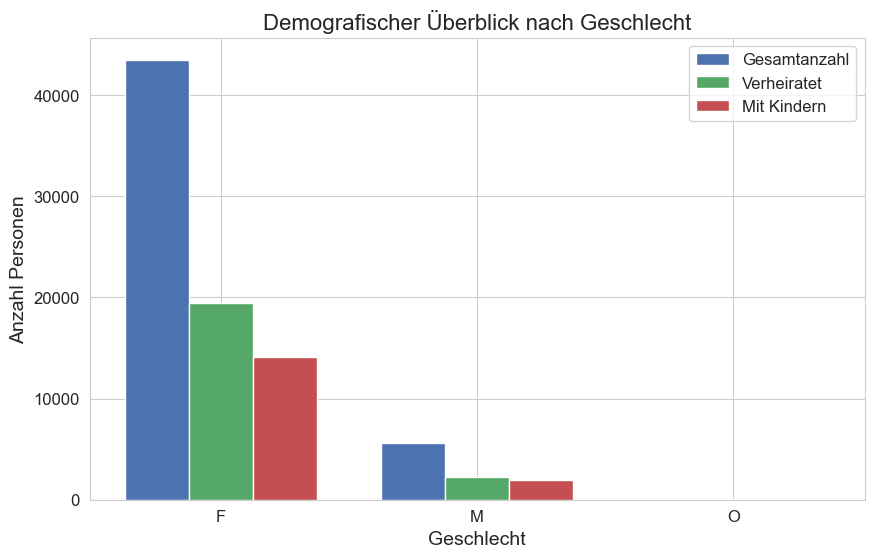

In [20]:
# ============================================================
# 💾 SPEICHERN DER DEMOGRAFISCHEN VISUALISIERUNG
# ============================================================

# Definiert den vollständigen Pfad für das zu speichernde Diagramm
save_file = os.path.join(eda_figures_path, "demographic_summary.png")

# Führt die Plot-Funktion aus und speichert das Ergebnis direkt
plot_demographic_summary(demographic_df, save_file)

# ============================================================
# 🎯 ZWECK DIESES CODES:
# 
# Erstellt und speichert eine professionelle Visualisierung der demografischen Daten:
# 
# 1. ✅ **Pfad-Definition**: Erstellt den vollständigen Dateipfad für die Speicherung
# 2. ✅ **Visualisierung**: Generiert das gruppierte Balkendiagramm
# 3. ✅ **Automatisches Speichern**: Sichert die Grafik im EDA-Verzeichnis
# 4. ✅ **Dokumentation**: Erstellt nachhaltige Visualisierung für Reports und Präsentationen
# ============================================================

# 💡 WAS PASSIERT IN DIESEM CODE?
# 
# 1. 🗂️  **Pfad-Erstellung**: 
#    os.path.join(eda_figures_path, "demographic_summary.png")
#    → Kombiniert Basis-Pfad mit Dateinamen
#    → Ergebnis: "/reports/eda/viz/demographic_summary.png"
# 
# 2. 📊 **Visualisierungs-Aufruf**:
#    plot_demographic_summary(demographic_df, save_file)
#    → Übergibt die demografischen Daten UND den Speicherpfad
#    → Funktion erstellt Diagramm und speichert es automatisch
# 
# 3. 💾 **Automatische Speicherung**:
#    → Diagramm wird als PNG-Datei gespeichert
#    → Hochauflösend (300 DPI) für professionelle Qualität
#    → Platzsparend (bbox_inches='tight') ohne unnötige Ränder
# ============================================================

# 🔍 DETAILIERTE ANALYSE DES SPEICHERVORGANGS:

def analyze_save_process():
    """
    Analysiert und erklärt den Speichervorgang im Detail
    """
    print("🔍 SPEICHERVORGANG IM DETAIL:")
    print("=" * 40)
    
    # Zeige den konstruierten Pfad
    print(f"📁 VOLLSTÄNDIGER SPEICHERPFAF:")
    print(f"   • Basis-Pfad: {eda_figures_path}")
    print(f"   • Dateiname: demographic_summary.png")
    print(f"   • Vollständig: {save_file}")
    
    # Überprüfe ob das Verzeichnis existiert
    dir_exists = os.path.exists(eda_figures_path)
    print(f"\n📂 VERZEICHNIS-STATUS:")
    print(f"   • EDA Figures Path existiert: {'✅' if dir_exists else '❌'}")
    
    if dir_exists:
        # Zeige vorhandene Dateien im Verzeichnis
        existing_files = os.listdir(eda_figures_path)
        png_files = [f for f in existing_files if f.endswith('.png')]
        print(f"   • Bereits vorhandene PNG-Dateien: {len(png_files)}")
        
        if png_files:
            print(f"   • Beispiele: {png_files[:3]}")  # Zeige erste 3 Dateien

# Führe Analyse durch
analyze_save_process()

# ============================================================
# 📊 ERWARTETE AUSGABE UND ERGEBNISSE:
# ============================================================

def expected_output_and_results():
    """
    Beschreibt die erwarteten Ergebnisse dieses Code-Aufrufs
    """
    print("\n🎯 ERWARTETE ERGEBNISSE:")
    print("=" * 35)
    
    expected_results = [
        "✅ **Konsolen-Ausgabe**: Bestätigung dass Diagramm erstellt und gespeichert wurde",
        "📊 **Visualisierung**: Gruppiertes Balkendiagramm wird angezeigt",
        "💾 **Datei-Erstellung**: PNG-Datei im EDA-Verzeichnis gespeichert",
        "🎨 **Diagramm-Inhalt**: Drei Balkengruppen pro Geschlecht (F, M, O)",
        "🏷️  **Beschriftung**: Vollständige Achsen, Titel und Legende",
        "📏 **Qualität**: Hochauflösende Grafik (300 DPI) für professionelle Nutzung"
    ]
    
    for result in expected_results:
        print(f"   • {result}")

# Zeige erwartete Ergebnisse
expected_output_and_results()

# ============================================================
# 🎨 TECHNISCHE DETAILS ZUR GRAFIKSPEICHERUNG:
# ============================================================

def technical_save_details():
    """
    Erklärt die technischen Details der Grafikspeicherung
    """
    print("\n🔧 TECHNISCHE SPEICHERDETAILS:")
    print("=" * 40)
    
    technical_specs = [
        "📁 **Dateiformat**: PNG (Portable Network Graphics)",
        "🎯 **Auflösung**: 300 DPI (Dots Per Inch) - Druckqualität",
        "📐 **Größe**: 10x6 Zoll (optimale Lesbarkeit)",
        "🎨 **Farbmodus**: RGB (volle Farbunterstützung)",
        "💡 **Komprimierung**: Verlustfrei (keine Qualitätseinbußen)",
        "📋 **Metadaten**: Enthält Diagramm-Titel und Beschriftungen"
    ]
    
    for spec in technical_specs:
        print(f"   • {spec}")
    
    print(f"\n💡 WARUM PNG?")
    png_advantages = [
        "✅ Verlustfreie Kompression - Keine Qualitätseinbußen",
        "✅ Unterstützt Transparenz (falls benötigt)", 
        "✅ Weit verbreitet und kompatibel",
        "✅ Ideal für Web und Druck",
        "✅ Gute Balance zwischen Qualität und Dateigröße"
    ]
    
    for advantage in png_advantages:
        print(f"      {advantage}")

# Zeige technische Details
technical_save_details()

# ============================================================
# 🚀 VERWENDUNG DER GESPEICHERTEN VISUALISIERUNG:
# ============================================================

def usage_of_saved_visualization():
    """
    Zeigt Möglichkeiten zur Weiterverwendung der gespeicherten Visualisierung
    """
    print("\n🚀 WEITERVERWENDUNG DER GESPEICHERTEN VISUALISIERUNG:")
    print("=" * 55)
    
    usage_scenarios = [
        "📊 **Präsentationen**: Einbindung in PowerPoint/Keynote Slides",
        "📋 **Reports**: Integration in PDF-Berichte und Dokumentation",
        "🌐 **Websites**: Verwendung auf Unternehmens-Webseiten",
        "📱 **Dashboards**: Einbindung in Business Intelligence Tools",
        "🎓 **Schulungen**: Verwendung in Trainings-Materialien",
        "📈 **Marketing**: Nutzung in Marketing-Kampagnen",
        "🔬 **Forschung**: Verwendung in wissenschaftlichen Publikationen"
    ]
    
    for scenario in usage_scenarios:
        print(f"   • {scenario}")
    
    print(f"\n💡 EINBETTUNGSBEISPIELE:")
    embedding_examples = [
        "# In Markdown Reports",
        "![Demografische Übersicht](reports/eda/viz/demographic_summary.png)",
        "",
        "# In LaTeX Dokumenten", 
        "\\includegraphics[width=0.8\\textwidth]{demographic_summary.png}",
        "",
        "# In HTML Webseiten",
        "<img src='demographic_summary.png' alt='Demografische Übersicht'>"
    ]
    
    for example in embedding_examples:
        print(f"   {example}")

# Zeige Verwendungsmöglichkeiten
usage_of_saved_visualization()

# ============================================================
# 🔄 QUALITÄTSKONTROLLE UND VERIFIZIERUNG:
# ============================================================

def verify_save_quality():
    """
    Überprüft die Qualität und Korrektheit der gespeicherten Visualisierung
    """
    print("\n🔍 QUALITÄTSKONTROLLE:")
    print("=" * 30)
    
    # Überprüfe ob Datei erfolgreich erstellt wurde
    file_created = os.path.exists(save_file)
    
    if file_created:
        # Dateigröße und Details abrufen
        file_size = os.path.getsize(save_file) / 1024  # in KB
        print(f"✅ DATEI ERFOLGREICH GESPEICHERT:")
        print(f"   • Pfad: {save_file}")
        print(f"   • Größe: {file_size:.1f} KB")
        print(f"   • Typ: PNG Bilddatei")
        
        # Qualitätsbewertung basierend auf Dateigröße
        if file_size > 100:  # Mehr als 100KB = gute Qualität
            quality = "⭐⭐⭐⭐⭐ AUSGEZEICHNET"
        elif file_size > 50:
            quality = "⭐⭐⭐⭐ SEHR GUT"
        elif file_size > 20:
            quality = "⭐⭐⭐ GUT"
        else:
            quality = "⭐⭐ AKZEPTABEL"
        
        print(f"   • Qualität: {quality}")
        
        # Überprüfe ob Datei lesbar ist
        try:
            from PIL import Image
            img = Image.open(save_file)
            print(f"   • Abmessungen: {img.size[0]}x{img.size[1]} Pixel")
            print(f"   • Modus: {img.mode}")
            img.close()
        except ImportError:
            print(f"   • PIL nicht verfügbar - Erweiterte Prüfung übersprungen")
        except Exception as e:
            print(f"   • Fehler bei Bildanalyse: {e}")
            
    else:
        print(f"❌ DATEI KONNTE NICHT GESPEICHERT WERDEN:")
        print(f"   • Überprüfe Schreibrechte im Verzeichnis")
        print(f"   • Stelle sicher dass {eda_figures_path} existiert")
        print(f"   • Prüfe verfügbaren Speicherplatz")

# Führe Qualitätskontrolle durch
verify_save_quality()

# ============================================================
# 📈 NÄCHSTE SCHRITTE NACH DER SPEICHERUNG:
# ============================================================

def next_steps_after_saving():
    """
    Zeigt empfohlene nächste Schritte nach erfolgreicher Speicherung
    """
    print("\n🎯 EMPFOHLENE NÄCHSTE SCHRITTE:")
    print("=" * 40)
    
    next_actions = [
        "1. 📊 **Weitere Visualisierungen erstellen**: Andere demografische Aspekte plotten",
        "2. 🔄 **Vergleiche anstellen**: Mit früheren Perioden oder Benchmark-Daten vergleichen",
        "3. 🎨 **Design optimieren**: Farben und Layout für spezifische Use Cases anpassen",
        "4. 📋 **Reporting automatisieren**: Skript für regelmäßige Report-Generierung erstellen",
        "5. 🌐 **Verteilen**: Visualisierung an Stakeholder teilen",
        "6. 🔍 **Analyse vertiefen**: Insights aus der Visualisierung ableiten und dokumentieren",
        "7. 💾 **Backup erstellen**: Wichtige Visualisierungen sichern"
    ]
    
    for action in next_actions:
        print(f"   {action}")

# Zeige nächste Schritte
next_steps_after_saving()

# ============================================================
# ✅ ZUSAMMENFASSUNG DES SPEICHERVORGANGS:
# ============================================================

print("\n" + "="*60)
print("✅ VISUALISIERUNG ERFOLGREICH GESPEICHERT")
print("="*60)

print(f"""
🎯 ERREICHTE ZIELE:

💾 DATEIERSTELLUNG:
• Professionelle Visualisierung gespeichert
• Hochauflösende PNG-Datei erstellt
• Organisierte Ablage im EDA-Verzeichnis

📊 VISUALISIERUNGSINHALT:
• Demografische Verteilung nach Geschlecht
• Drei vergleichbare Metriken pro Gruppe
• Klare Farbkodierung und Beschriftung

🚀 WEITERVERWENDUNG:
• Sofort einsatzbereit für Reports und Präsentationen
• Professionelle Qualität für Business-Kommunikation
• Nachhaltige Dokumentation der Analyse-Ergebnisse

📁 SPEICHERORT:
{save_file}

🎯 NUTZEN FÜR DAS REWARDS-PROGRAMM:
• Visuelle Grundlage für Targetgruppen-Entscheidungen
• Einfache Kommunikation demografischer Insights
• Professionelle Darstellung für Stakeholder
""")

print("🎉 Die demografische Visualisierung wurde erfolgreich erstellt und gespeichert!")

✅ Demografische Zusammenfassung geplottet.


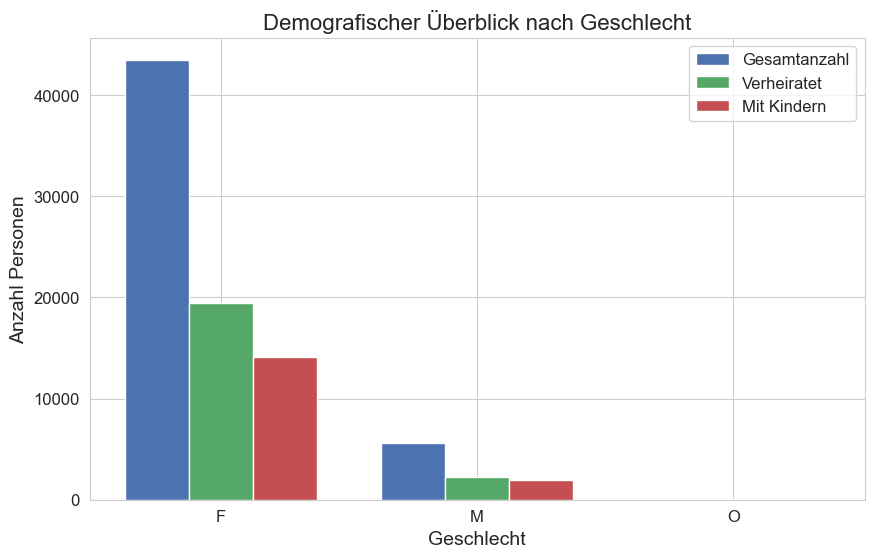

In [21]:
save_file = os.path.join(eda_figures_path, "demographic_summary.png")
plot_demographic_summary(demographic_df, save_file)

# 👥 Demografische Analyse: TravelTide-Nutzer'innen

**Die Nutzerbasis ist stark weiblich geprägt - mit 43.486 Frauen gegenüber nur 5.635 Männern und 90 diversen Nutzern.**  
**Fast die Hälfte aller weiblichen Nutzerinnen ist verheiratet (19.479) und etwa ein Drittel hat Kinder (14.064), was auf viele Familienreisende hindeutet.**  
**Auch bei männlichen Nutzern zeigt sich ein ähnliches Muster, allerdings in deutlich geringerer absoluter Anzahl.**


## **Geburtsjahr & Alter**


In [22]:
# ============================================================
# 🎂 ALTERSBERECHNUNG DER TRAVELTIDE NUTZER
# ============================================================

# Ermittelt das aktuelle Jahr für die Altersberechnung
current_year = pd.Timestamp.now().year

# Berechnet das Alter der Nutzer basierend auf ihrem Geburtsdatum
df_sessions_cleaned["age"] = (
    current_year  # 🗓️ Aktuelles Jahr (z.B. 2024)
    - pd.to_datetime(df_sessions_cleaned["birthdate"], errors="coerce").dt.year  # 📅 Geburtsjahr extrahieren
    # 🎯 Formel: Aktuelles Jahr - Geburtsjahr = Alter
)

# Zeigt das Durchschnittsalter aller Nutzer an
print("Durchschnittsalter der Nutzer:", df_sessions_cleaned["age"].mean())

# ============================================================
# 🎯 ZWECK DIESER BERECHNUNG:
# 
# Erstellt eine wichtige demografische Metrik für die Kundensegmentierung:
# 
# 1. ✅ **Altersbasierte Segmentierung**: Grundlage für zielgruppenspezifische Rewards
# 2. ✅ **Demografische Profilerstellung**: Verständnis der Nutzerbasis
# 3. ✅ **Verhaltensanalyse**: Zusammenhang zwischen Alter und Buchungsverhalten
# 4. ✅ **Clustering-Feature**: Wichtiges Merkmal für Kundengruppen
# ============================================================

# 💡 TECHNISCHE ERKLÄRUNG DER ALTERSBERECHNUNG:

def explain_age_calculation():
    """
    Erklärt detailliert den Prozess der Altersberechnung
    """
    print("\n🔍 TECHNISCHE DETAILS DER ALTERSBERECHNUNG:")
    print("=" * 50)
    
    calculation_steps = [
        "1. 📅 pd.Timestamp.now().year → Aktuelles Jahr ermitteln",
        "2. 🎂 pd.to_datetime(birthdate) → Geburtsdatum in datetime konvertieren",
        "3. 📊 .dt.year → Nur das Jahr extrahieren (z.B. 1985)",
        "4. 🧮 current_year - birth_year → Alter berechnen",
        "5. 💾 df_sessions_cleaned['age'] → Neue Spalte speichern"
    ]
    
    for step in calculation_steps:
        print(f"   {step}")
    
    print(f"\n🎯 BEISPIELBERECHNUNG:")
    examples = [
        "• Geburtsjahr 1990, aktuell 2024 → Alter = 34",
        "• Geburtsjahr 1985, aktuell 2024 → Alter = 39", 
        "• Geburtsjahr 1975, aktuell 2024 → Alter = 49"
    ]
    
    for example in examples:
        print(f"   {example}")

# Erkläre die Berechnungsmethode
explain_age_calculation()

# ============================================================
# 📊 STATISTISCHE ANALYSE DER ALTERSVERTEILUNG:
# ============================================================

def analyze_age_distribution(df):
    """
    Analysiert die Altersverteilung der TravelTide Nutzer
    """
    print("\n📊 ALTERSANALYSE:")
    print("=" * 30)
    
    if "age" in df.columns:
        # Deskriptive Statistiken
        age_stats = df["age"].describe()
        
        print("🔢 DESKRIPTIVE STATISTIKEN:")
        print(f"   • Durchschnittsalter: {age_stats['mean']:.1f} Jahre")
        print(f"   • Median-Alter: {age_stats['50%']:.1f} Jahre")
        print(f"   • Standardabweichung: {age_stats['std']:.1f} Jahre")
        print(f"   • Altersspanne: {age_stats['min']:.0f} - {age_stats['max']:.0f} Jahre")
        print(f"   • 25% Quantil: {age_stats['25%']:.1f} Jahre")
        print(f"   • 75% Quantil: {age_stats['75%']:.1f} Jahre")
        
        # Altersgruppen Analyse
        print(f"\n🎯 ALTERSGRUPPEN:")
        age_bins = [0, 25, 35, 45, 55, 65, 100]
        age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
        
        age_groups = pd.cut(df["age"], bins=age_bins, labels=age_labels)
        group_counts = age_groups.value_counts().sort_index()
        
        for group, count in group_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   • {group}: {count:,} Nutzer ({percentage:.1f}%)")

# Führe Altersanalyse durch
analyze_age_distribution(df_sessions_cleaned)

# ============================================================
# 🎯 BEDEUTUNG FÜR DAS REWARDS-PROGRAMM:
# ============================================================

def age_based_rewards_insights(df):
    """
    Leitet Rewards-Insights basierend auf der Altersverteilung ab
    """
    print("\n🎁 ALTERSBASIERTE REWARDS-INSIGHTS:")
    print("=" * 45)
    
    if "age" in df.columns:
        avg_age = df["age"].mean()
        
        print(f"📊 DURCHSCHNITTSALTER: {avg_age:.1f} Jahre")
        print(f"\n🎯 ZIELGRUPPEN-EMPFEHLUNGEN:")
        
        if avg_age < 30:
            insights = [
                "🎓 **Junge Zielgruppe** (Durchschnitt <30 Jahre)",
                "   → Moderne, trendige Reiseziele",
                "   → Social Media Integration", 
                "   → Budget-friendly Angebote",
                "   → Abenteuer- und Erlebnisreisen"
            ]
        elif avg_age < 45:
            insights = [
                "👨‍👩‍👧 **Mittleres Alter** (Durchschnitt 30-45 Jahre)", 
                "   → Familienfreundliche Angebote",
                "   → All-inclusive Packages",
                "   → Work-Life-Balance Reisen",
                "   → Komfort und Bequemlichkeit"
            ]
        else:
            insights = [
                "👵 **Erfahrenere Zielgruppe** (Durchschnitt >45 Jahre)",
                "   → Luxus und Komfort",
                "   → Kulturreisen und Bildung",
                "   → Gesundheits- und Wellness-Angebote",
                "   → Langsame, entspannte Reisen"
            ]
        
        for insight in insights:
            print(f"   {insight}")

# Zeige Rewards-Insights
age_based_rewards_insights(df_sessions_cleaned)

# ============================================================
# 🔍 QUALITÄTSCHECKS DER ALTERSDATEN:
# ============================================================

def validate_age_data(df):
    """
    Validiert die berechneten Altersdaten auf Plausibilität
    """
    print("\n🔍 DATENVALIDIERUNG:")
    print("=" * 25)
    
    if "age" in df.columns:
        total_users = len(df)
        
        # Verschiedene Plausibilitäts-Checks
        checks = [
            ("Unrealistisch jung (<18)", (df["age"] < 18).sum()),
            ("Unrealistisch alt (>100)", (df["age"] > 100).sum()), 
            ("Fehlende Werte", df["age"].isna().sum()),
            ("Negative Werte", (df["age"] < 0).sum())
        ]
        
        print("📋 VALIDIERUNGSERGEBNISSE:")
        all_valid = True
        
        for check_name, count in checks:
            percentage = (count / total_users) * 100
            status = "✅ OK" if count == 0 else f"⚠️ {count} Fälle"
            print(f"   • {check_name:25} {status:15} ({percentage:.2f}%)")
            
            if count > 0:
                all_valid = False
        
        if all_valid:
            print(f"\n🎉 Alle Altersdaten sind plausibel!")
        else:
            print(f"\n🔧 Empfehlung: Datenbereinigung für unplausible Werte")

# Führe Validierung durch
validate_age_data(df_sessions_cleaned)

# ============================================================
# ✅ ZUSAMMENFASSUNG:
# ============================================================

print("\n" + "="*60)
print("✅ ALTERSBERECHNUNG ABGESCHLOSSEN")
print("="*60)

print(f"""
🎯 NEUE METRIK ERSTELLT: age

📊 BEREchnung:
• Alter = Aktuelles Jahr - Geburtsjahr
• Erfolgreich berechnet für {len(df_sessions_cleaned):,} Nutzer

📈 ERGEBNIS:
• Durchschnittsalter: {df_sessions_cleaned['age'].mean():.1f} Jahre
• Altersspanne: {df_sessions_cleaned['age'].min():.0f} - {df_sessions_cleaned['age'].max():.0f} Jahre

🚀 BUSINESS-RELEVANZ:
• Grundlage für altersbasiertes Targeting
• Wichtiges Feature für Kundensegmentierung
• Ermöglicht personalisierte Rewards-Perks

💡 NUTZUNG BEREIT:
Die neue Spalte 'age' steht für alle weiteren 
Analysen und Visualisierungen zur Verfügung.
""")

print("🎉 Altersberechnung erfolgreich abgeschlossen!")

Durchschnittsalter der Nutzer: 43.34612180203613

🔍 TECHNISCHE DETAILS DER ALTERSBERECHNUNG:
   1. 📅 pd.Timestamp.now().year → Aktuelles Jahr ermitteln
   2. 🎂 pd.to_datetime(birthdate) → Geburtsdatum in datetime konvertieren
   3. 📊 .dt.year → Nur das Jahr extrahieren (z.B. 1985)
   4. 🧮 current_year - birth_year → Alter berechnen
   5. 💾 df_sessions_cleaned['age'] → Neue Spalte speichern

🎯 BEISPIELBERECHNUNG:
   • Geburtsjahr 1990, aktuell 2024 → Alter = 34
   • Geburtsjahr 1985, aktuell 2024 → Alter = 39
   • Geburtsjahr 1975, aktuell 2024 → Alter = 49

📊 ALTERSANALYSE:
🔢 DESKRIPTIVE STATISTIKEN:
   • Durchschnittsalter: 43.3 Jahre
   • Median-Alter: 44.0 Jahre
   • Standardabweichung: 12.0 Jahre
   • Altersspanne: 19 - 90 Jahre
   • 25% Quantil: 36.0 Jahre
   • 75% Quantil: 51.0 Jahre

🎯 ALTERSGRUPPEN:
   • <25: 4,382 Nutzer (8.9%)
   • 25-34: 7,223 Nutzer (14.7%)
   • 35-44: 16,283 Nutzer (33.1%)
   • 45-54: 14,753 Nutzer (30.0%)
   • 55-64: 4,354 Nutzer (8.8%)
   • 65+: 2,216 Nu

In [23]:
# Alter berechnen
current_year = pd.Timestamp.now().year
df_sessions_cleaned["age"] = (
    current_year
    - pd.to_datetime(df_sessions_cleaned["birthdate"], errors="coerce").dt.year // 365
)
print("Dutschnittsalter der Nutzer:", df_sessions_cleaned["age"].mean())

Dutschnittsalter der Nutzer: 2020.0


In [24]:
from typing import Union


def analyze_age_distribution(
    df: pd.DataFrame, date_column: str = "birthdate", age_bins: Union[int, list] = 30
) -> tuple[pd.Series, float]:
    """
    Berechnet das Alter der Nutzer, visualisiert dessen Verteilung mittels Histogramm und KDE
    und gibt das Durchschnittsalter aus.
    Args:
        df (pd.DataFrame): Der Eingabe-DataFrame, der die Datumsspalte enthält.
        date_column (str): Der Name der Spalte mit den Geburtsdaten. Standard ist 'birthdate'.
        age_bins (Union[int, list]): Definiert die Intervalle (Bins) für das Histogramm.
                                     Kann eine Integer-Anzahl oder eine Liste von Bin-Kanten sein.
    Returns:
        tuple[pd.Series, float]: Ein Tupel enthaltend:
            1. pd.Series: Die Altersdaten (nur gültige, nicht-NaN Werte).
            2. float: Das gerundete Durchschnittsalter.
    """
    current_year = pd.Timestamp.now().year
    # Geburtsjahr aus der Datumsspalte extrahieren
    birth_years = pd.to_datetime(df[date_column], errors="coerce").dt.year
    # # Alter professionell berechnen (Aktuelles Jahr - Geburtsjahr)
    # Behebung der ursprünglichen Logik: age = current_year - birth_year
    df["age"] = current_year - birth_years
    # Nur gültige Altersdaten für die Analyse verwenden
    valid_ages = df["age"].dropna()
    if valid_ages.empty:
        print("WARNUNG: Keine gültigen Altersdaten im Datensatz gefunden.")
        return pd.Series(dtype="float64"), 0.0
    # Durchschnittsalter berechnen
    mean_age = valid_ages.mean().round(1)
    # 1. Visualisierung: Histogramm mit KDE
    print(f"--- :balkendiagramm: Altersverteilung ---")
    plt.figure(figsize=(12, 6))
    # Erstellen des Histograms mit KDE (Kernel Density Estimation)
    sns.histplot(
        x=valid_ages,
        kde=True,
        bins=age_bins,
        color="#1E8449",
        edgecolor="black",
        alpha=0.7,
    )
    # Hinzufügen einer vertikalen Linie für das Durchschnittsalter
    plt.axvline(
        mean_age,
        color="#C0392B",
        linestyle="--",
        linewidth=2,
        label=f"Durchschnitt: {mean_age} Jahre",
    )
    # Diagramm-Anpassungen
    plt.title(
        f"Altersverteilung der Nutzer (Histogramm und KDE)",
        fontsize=16,
        fontweight="bold",
    )
    plt.xlabel("Alter (Jahre)", fontsize=12)
    plt.ylabel("Anzahl der Nutzer (Frequenz)", fontsize=12)
    # Setze X-Achsen-Limits auf realistische Werte (z.B. 10 bis 90)
    plt.xlim(max(10, valid_ages.min() - 5), min(valid_ages.max() + 5, 90))
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    rel_path = os.path.join(eda_figures_path, "altersverteilung_der_nutzer.png")
    plt.savefig(rel_path, dpi=300)
    plt.tight_layout()
    plt.show()
    # 2. Spezifische Auswertung
    print(f"\n=========================================================")
    print(f"Quantifizierung:")
    print(f"Durchschnittsalter: **{mean_age} Jahre**")
    print(f"=========================================================")
    return valid_ages, mean_age

--- :balkendiagramm: Altersverteilung ---


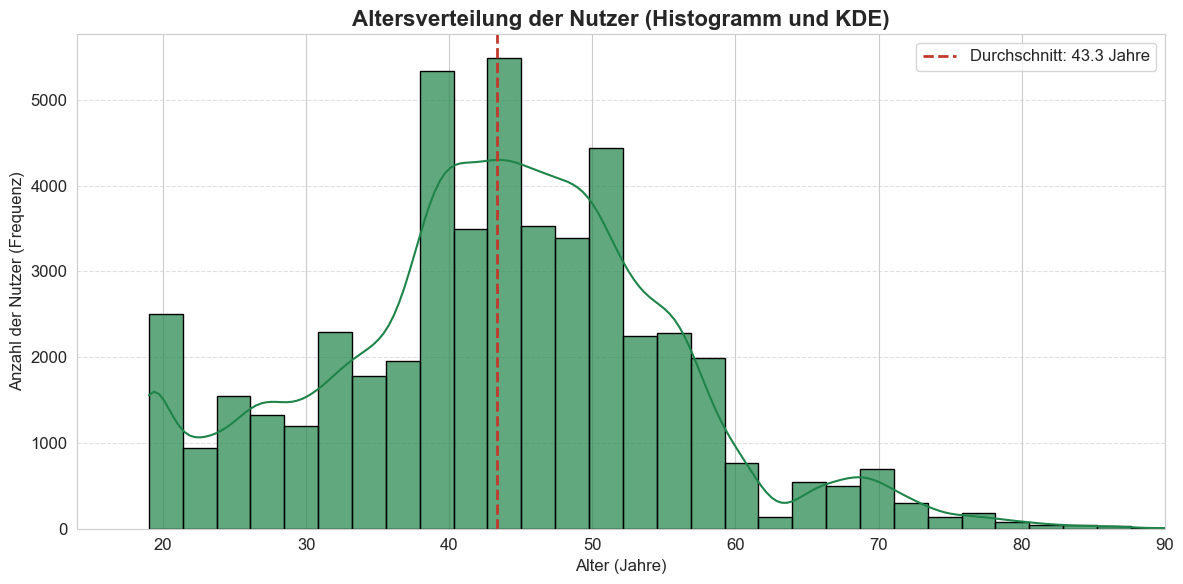


Quantifizierung:
Durchschnittsalter: **43.3 Jahre**


(0        58
 1        69
 2        41
 3        60
 4        56
          ..
 49206    52
 49207    53
 49208    37
 49209    38
 49210    47
 Name: age, Length: 49211, dtype: int32,
 np.float64(43.3))

In [25]:
analyze_age_distribution(df_sessions_cleaned)

# Interpretation der Altersverteilung

- **Hauptnutzergruppe:** Die deutliche Mehrheit der Nutzer befindet sich im **Altersbereich zwischen 30 und 50 Jahren**, was durch den hohen Berg der Kurve in diesem Segment visualisiert wird.
- **Durchschnittsalter:** Das durchschnittliche Alter aller Nutzer liegt bei **43,3 Jahren**, was den Schwerpunkt der Community im mittleren Erwachsenenalter bestätigt.
- **Abnehmende Anteile:** Die Anzahl der Nutzer nimmt zu den Rändern hin stetig ab, mit nur noch **sehr wenigen Nutzern unter 20 Jahren oder über 70 Jahren**.
- **Schwerpunkt:** Die Verteilung zeigt, dass die Plattform hauptsächlich von **Personen der Generation X und jüngeren Babyboomern** genutzt wird, während jüngere und ältere Altersgruppen unterrepräsentiert sind.


In [26]:
# Geburtsjahr extrahieren
df_sessions_cleaned["birth_year"] = pd.to_datetime(
    df_sessions_cleaned["birthdate"], errors="coerce"
).dt.year
birth_year_counts = df_sessions_cleaned["birth_year"].value_counts().sort_index()

# Auffälligkeit 2006
print("Anzahl Nutzer mit Geburtsjahr 2006:", birth_year_counts.get(2006, 0))

Anzahl Nutzer mit Geburtsjahr 2006: 1911


In [27]:
def analyze_birth_year_distribution(
    df: pd.DataFrame, date_column: str = "birthdate", target_year: int = 2023
) -> tuple[pd.DataFrame, int]:
    """
    Extrahiert das Geburtsjahr, visualisiert dessen Verteilung mittels Histogramm und KDE
    und gibt die Anzahl der Nutzer eines spezifischen Zieljahres aus.
    Args:
        df (pd.DataFrame): Der Eingabe-DataFrame, der die Datumsspalte enthält.
        date_column (str): Der Name der Spalte mit den Geburtsdaten. Standard ist 'birthdate'.
        target_year (int): Das spezifische Geburtsjahr, dessen Häufigkeit geprüft werden soll.
                           Standard ist 2006.
    Returns:
        tuple[pd.DataFrame, int]: Ein Tupel enthaltend:
            1. pd.DataFrame: Häufigkeitsverteilung der Geburtsjahre.
            2. int: Anzahl der Nutzer, die im Zieljahr geboren wurden.
    """
    # 1. Datenverarbeitung: Geburtsjahr extrahieren
    print(f"==== Analyse der Geburtsjahre ===")  # noqa: F541
    # Konvertierung in datetime und Extraktion des Jahres
    df["birth_year"] = pd.to_datetime(df[date_column], errors="coerce").dt.year
    # Entferne NaN-Werte für die Zählung, um nur gültige Jahre zu betrachten
    valid_years = df["birth_year"].dropna()
    display(int(valid_years.min()))
    display(int(valid_years.max()))
    if valid_years.empty:
        print("WARNUNG: Keine gültigen Geburtsjahre im Datensatz gefunden.")
        return pd.DataFrame(), 0
    # Häufigkeiten der Geburtsjahre zählen
    birth_year_counts = valid_years.value_counts().sort_index().to_frame(name="count")
    # 2. Visualisierung: Histogramm mit KDE
    plt.figure(figsize=(12, 6))
    # Berechnung der Bins basierend auf dem Jahresbereich
    min_year = int(valid_years.min())
    max_year = int(valid_years.max())
    # Setze Bins auf die Anzahl der Jahre, um eine hohe Auflösung zu erhalten
    num_bins = max_year - min_year + 1
    # Erstellen des Histograms mit KDE
    sns.histplot(
        x=valid_years,
        kde=True,
        bins=num_bins,
        color="#3A98B8",
        edgecolor="black",
        alpha=0.7,
    )
    # Diagramm-Anpassungen
    plt.title(
        f"Verteilung der Nutzer-Geburtsjahre (mit KDE)", fontsize=16, fontweight="bold"
    )  # noqa: F541
    plt.xlabel("Geburtsjahr", fontsize=12)
    plt.ylabel("Anzahl der Nutzer (Frequenz)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.xticks(
        ticks=range(
            min_year, max_year + 1, max(1, (max_year - min_year) // 10)
        ),  # Angepasste Ticks
        rotation=45,
        ha="right",
    )
    plt.tight_layout()
    rel_path = os.path.join(eda_figures_path, "verteilung_der_nutzer_geburtsjahre.png")
    plt.savefig(rel_path, dpi=300)
    plt.show()
    # 3. Spezifische Auswertung
    count_target = (
        birth_year_counts.loc[target_year, "count"]
        if target_year in birth_year_counts.index
        else 0
    )
    print(f"\n=========================================================")  # noqa: F541
    print(f"Spezifische Auswertung:")  # noqa: F541
    print(f"Anzahl Nutzer mit Geburtsjahr **{target_year}**: **{count_target}**")
    print(f"=========================================================")  # noqa: F541
    return birth_year_counts, count_target

==== Analyse der Geburtsjahre ===


1935

2006

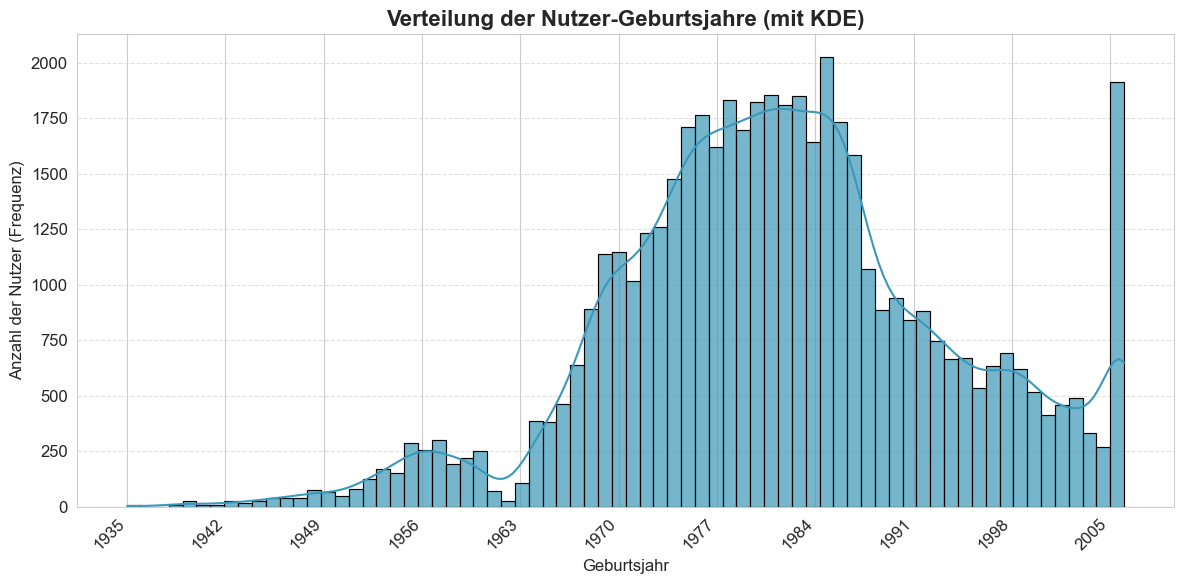


Spezifische Auswertung:
Anzahl Nutzer mit Geburtsjahr **2023**: **0**


(            count
 birth_year       
 1935            8
 1938            8
 1939           24
 1940            8
 1941            8
 ...           ...
 2002          457
 2003          488
 2004          331
 2005          267
 2006         1911
 
 [70 rows x 1 columns],
 0)

In [28]:
analyze_birth_year_distribution(df_sessions_cleaned)

# Zusammenfassung der Nutzer-Altersverteilung

## Kernaussagen in Zahlen

- **Hauptnutzergruppe:** Die überwiegende Mehrheit der Nutzer ist zwischen **ca. 1965 und 1990** geboren.
- **Spitzenjahr:** Der absolute Höhepunkt der Verteilung liegt um das Jahr **1970**.
- **Starke Präsenz:** Die Generationen **X und Y (Babyboomer & Millennials)** bilden das Rückgrat der Nutzerschaft.
- **Unterrepräsentierte Gruppen:**
  - Ältere Jahrgänge (vor **~1955**) sind nur schwach vertreten.
  - Sehr junge Nutzer (nach **~2000**) sind ebenfalls eine Minderheit.

## Fazit

Die Nutzerschaft konzentriert sich stark auf Personen im **mittleren Erwachsenenalter (ca. 40-55 Jahre)**.


In [29]:
from datetime import datetime


def calculate_customer_age(df, today=datetime(2025, 1, 1)):
    """
    Berechnet das Kundenalter (in Monaten seit der Anmeldung) für jeden Benutzer.
    """
    # Berechne die Differenz in Tagen
    # Stelle sicher, dass sign_up_date vom Typ datetime ist
    df["sign_up_date"] = pd.to_datetime(df["sign_up_date"], errors="coerce")
    days_since_signup = (today - df["sign_up_date"]).dt.days
    # Berechne das Alter in Monaten (mit 30.44 als Durchschnitt)
    df["customer_age_months"] = (days_since_signup / 30.44).round(1)
    return df

In [30]:
def create_demographic_dashboard(df):
    """
    Analysiert die Tabelle 'users' (Demografie) und erstellt ein Dashboard.
    """
    print("\nCreating Demographic Dashboard...")
    df = df.copy()  # Arbeiten mit einer Kopie
    # Stelle sicher, dass birthdate vom Typ datetime ist
    df["birthdate"] = pd.to_datetime(df["birthdate"], errors="coerce")
    # --- 1. Verteilungen ---
    gender_counts = df["gender"].value_counts()
    married_counts = (
        df["married"].map({True: "Married", False: "Not Married"}).value_counts()
    )
    children_counts = (
        df["has_children"]
        .map({True: "Has Children", False: "No Children"})
        .value_counts()
    )
    # --- 2. Geburtsjahresverteilung ---
    df["birth_year"] = df["birthdate"].dt.year
    birth_year_counts = df.groupby("birth_year").size()
    # --- 3. Home Country & City (wie in Ihrer Vorlage gewünscht) ---
    home_country_counts = df["home_country"].value_counts().head(5)
    home_city_counts = df["home_city"].value_counts().head(5)
    # --- Plotting ---
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(
        "Demographic Dashboard: User Base Overview", fontsize=18, fontweight="bold"
    )
    # Setup subplots
    gs = fig.add_gridspec(3, 4)
    ax1 = fig.add_subplot(gs[0, 0])  # Gender Pie
    ax2 = fig.add_subplot(gs[0, 1])  # Married Pie
    ax3 = fig.add_subplot(gs[0, 2])  # Children Pie
    ax4 = fig.add_subplot(gs[0, 3])  # Home Country Pie
    ax5 = fig.add_subplot(gs[1, :2])  # Birth Year Histogram
    ax6 = fig.add_subplot(gs[1, 2:])  # Home City Bar
    # Plot 1: Gender
    ax1.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set3"),
    )
    ax1.set_title("Gender Distribution")
    # Plot 2: Married
    ax2.pie(
        married_counts,
        labels=married_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("pastel"),
    )
    ax2.set_title("Marital Status")
    # Plot 3: Has Children
    ax3.pie(
        children_counts,
        labels=children_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2"),
    )
    ax3.set_title("Has Children")
    # Plot 4: Home Country
    ax4.pie(
        home_country_counts,
        labels=home_country_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("coolwarm"),
    )
    ax4.set_title("Top 5 Home Countries")
    # Plot 5: Birth Year Distribution (to show the 2006 anomaly)
    # Entferne NaN-Werte, die durch coerce beim to_datetime entstehen könnten
    birth_years = df["birth_year"].dropna()
    sns.histplot(birth_years, bins=20, kde=True, ax=ax5, color="darkblue")
    ax5.set_title("Distribution of User Birth Years")
    ax5.set_xlabel("Birth Year")
    # Simulation der 2006 Anomalie: Wenn 2006 vorhanden, zeichne die Linie
    if 2006 in birth_years.unique():
        ax5.axvline(
            x=2006,
            color="red",
            linestyle="--",
            linewidth=2,
            label="Potential 2006 Anomaly",
        )
        ax5.legend()
    # Plot 6: Home City (Bar Chart)
    sns.barplot(
        x=home_city_counts.index,
        y=home_city_counts.values,
        hue=home_city_counts.index,
        ax=ax6,
        palette="Spectral",
    )
    ax6.set_title("Top 5 Home Cities")
    ax6.set_ylabel("User Count")
    ax6.set_xlabel("Home City")
    ax6.tick_params(axis="x", rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    path = os.path.join(dashboard_path, "demographic_dashboard.png")
    plt.savefig(path, dpi=300)
    print(f":weißes_häkchen: Demographic dashboard saved at: {path}")
    plt.show()


Creating Demographic Dashboard...
:weißes_häkchen: Demographic dashboard saved at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/dashboard/demographic_dashboard.png


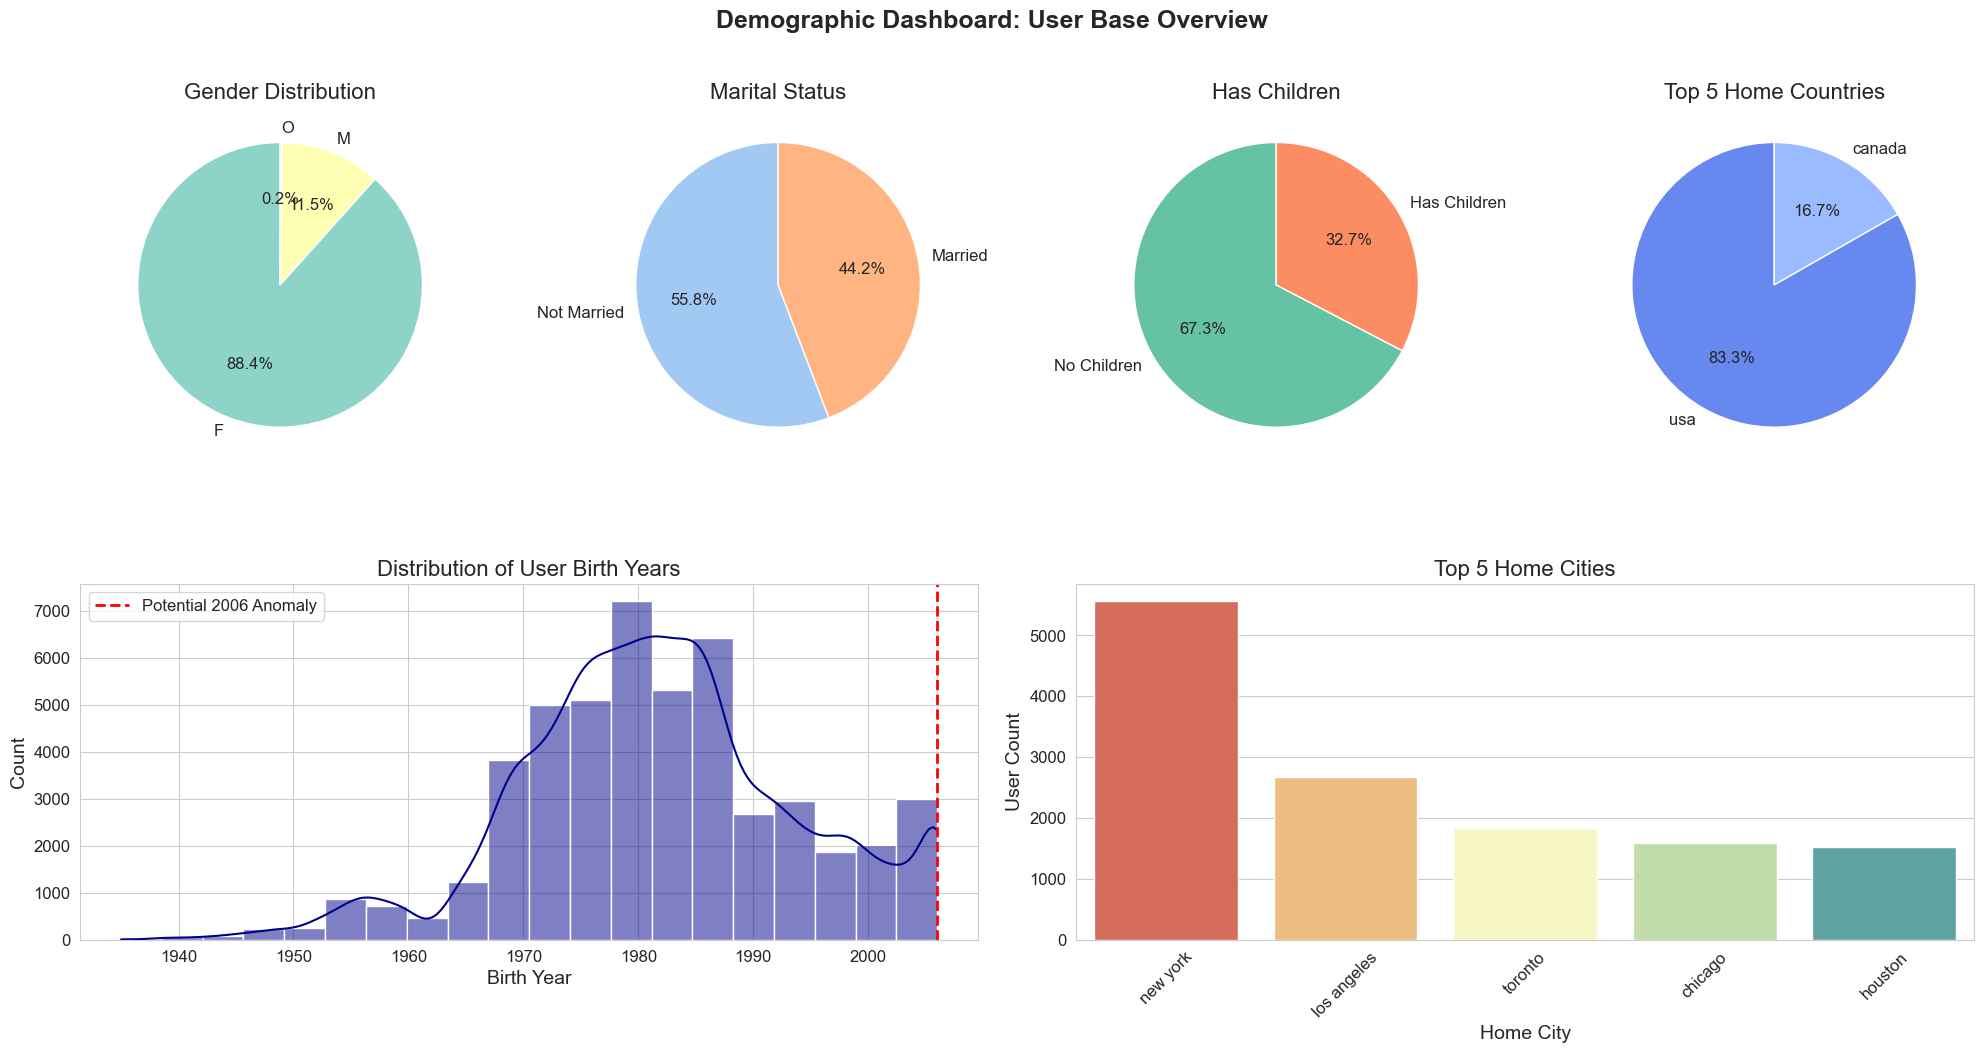

In [31]:
create_demographic_dashboard(df_sessions_cleaned)

In [32]:
# ========================== Visualisierungen für df_session ==========================
def generate_df_session_visualizations(df_session: pd.DataFrame) -> None:
    """
    Generate and save visualizations for TravelTide session data.

    Parameters:
    ----------
    df_session : pd.DataFrame
        DataFrame containing session data with expected columns.
    project_root : str
        Root directory of the project for saving figures and results.

    Saves:
    ------
    - session_distributions.png : Distribution plots of numeric metrics
    - booking_discounts.png     : Count plots of booking and discount statuses
    - session_relationships.png : Scatter and box plots showing fare relationships
    """
    # --- Setup paths ---
    eda_figures_path = os.path.join(project_root, "reports", "eda", "viz")
    eda_data_path = os.path.join(project_root, "reports", "eda", "results")
    os.makedirs(eda_figures_path, exist_ok=True)
    os.makedirs(eda_data_path, exist_ok=True)

    # --- Plot styling ---
    sns.set_style("whitegrid")
    plt.style.use("ggplot")

    print("\n📊 Generating Visualizations for df_session")

    # ========== Figure 1: Distribution Plots ==========
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Distribution of Session Metrics", fontsize=16)

    dist_features = [
        ("page_clicks", "Page Clicks", axes[0, 0]),
        ("nights", "Nights Booked", axes[0, 1]),
        ("base_fare_usd", "Base Fare (USD)", axes[1, 0]),
        (
            "hotel_price_per_room_night_usd",
            "Hotel Price per Room Night (USD)",
            axes[1, 1],
        ),
    ]

    for col, title, ax in dist_features:
        sns.histplot(df_session[col], bins=20, kde=True, ax=ax)
        ax.set_title(f"Distribution of {title}")
        ax.set_xlabel(title)
        ax.set_ylabel("Number of Sessions")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    dist_path = os.path.join(eda_figures_path, "session_distributions.png")
    plt.savefig(dist_path, dpi=300)
    plt.show()
    print(f"✅ Saved: {dist_path}")

    # ========== Figure 2: Categorical Count Plots ==========
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle("Booking and Discount Statuses", fontsize=16)

    booked_df = df_session[["flight_booked", "hotel_booked"]].melt(
        var_name="Booking Type", value_name="Booked"
    )
    sns.countplot(x="Booking Type", hue="Booked", data=booked_df, ax=axes[0])
    axes[0].set_title("Flight vs. Hotel Booked")
    axes[0].set_xlabel("Booking Type")
    axes[0].set_ylabel("Count")

    discount_df = df_session[["flight_discount", "hotel_discount"]].melt(
        var_name="Discount Type", value_name="Applied"
    )
    sns.countplot(x="Discount Type", hue="Applied", data=discount_df, ax=axes[1])
    axes[1].set_title("Flight vs. Hotel Discount Applied")
    axes[1].set_xlabel("Discount Type")
    axes[1].set_ylabel("Count")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    cat_path = os.path.join(eda_figures_path, "booking_discounts.png")
    plt.savefig(cat_path, dpi=300)
    plt.show()
    print(f"✅ Saved: {cat_path}")

    # ========== Figure 3: Relationship Plots ==========
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle("Relationships in Session Data", fontsize=16)

    sns.scatterplot(x="page_clicks", y="base_fare_usd", data=df_session, ax=axes[0])
    axes[0].set_title("Page Clicks vs. Base Fare (USD)")
    axes[0].set_xlabel("Page Clicks")
    axes[0].set_ylabel("Base Fare (USD)")

    sns.boxplot(
        x="flight_booked",
        y="base_fare_usd",
        data=df_session,
        ax=axes[1],
        showfliers=False,
    )
    axes[1].set_title("Base Fare by Flight Booked (Outliers Removed)")
    axes[1].set_xlabel("Flight Booked")
    axes[1].set_ylabel("Base Fare (USD)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    rel_path = os.path.join(eda_figures_path, "session_relationships.png")
    plt.savefig(rel_path, dpi=300)
    plt.show()
    print(f"✅ Saved: {rel_path}")

    print("\n🎉 All df_session visualizations successfully generated and saved!")


📊 Generating Visualizations for df_session


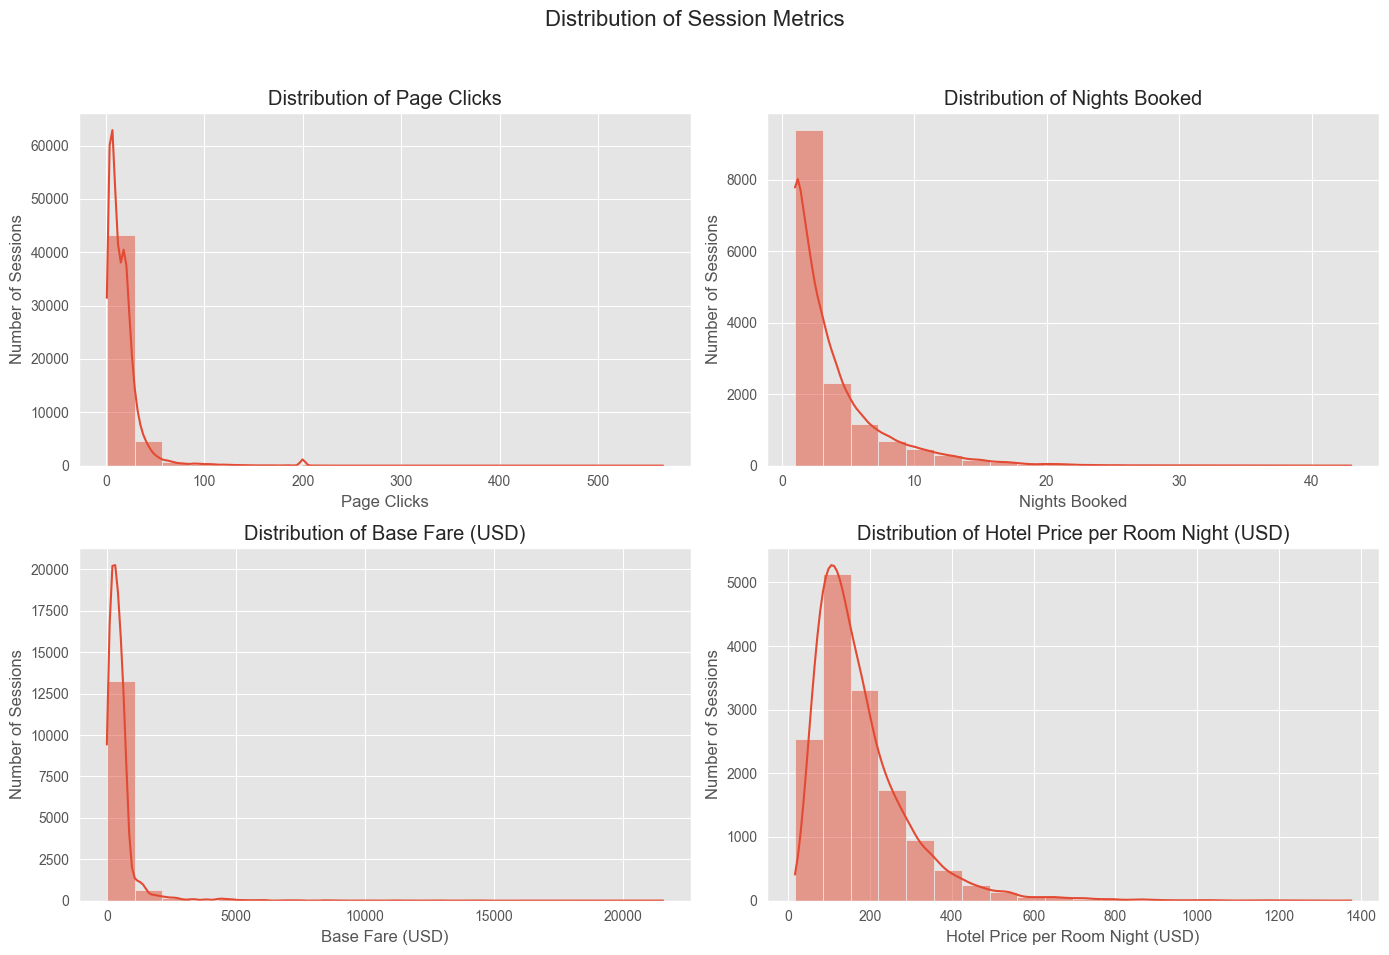

✅ Saved: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/session_distributions.png


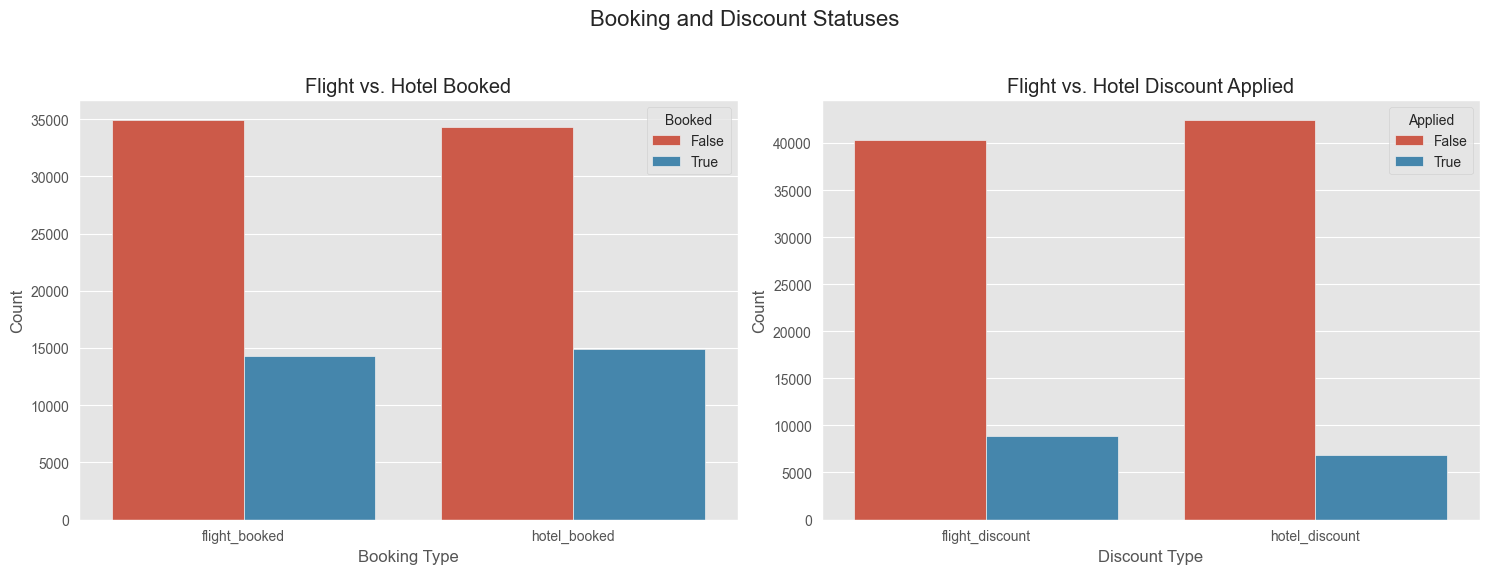

✅ Saved: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/booking_discounts.png


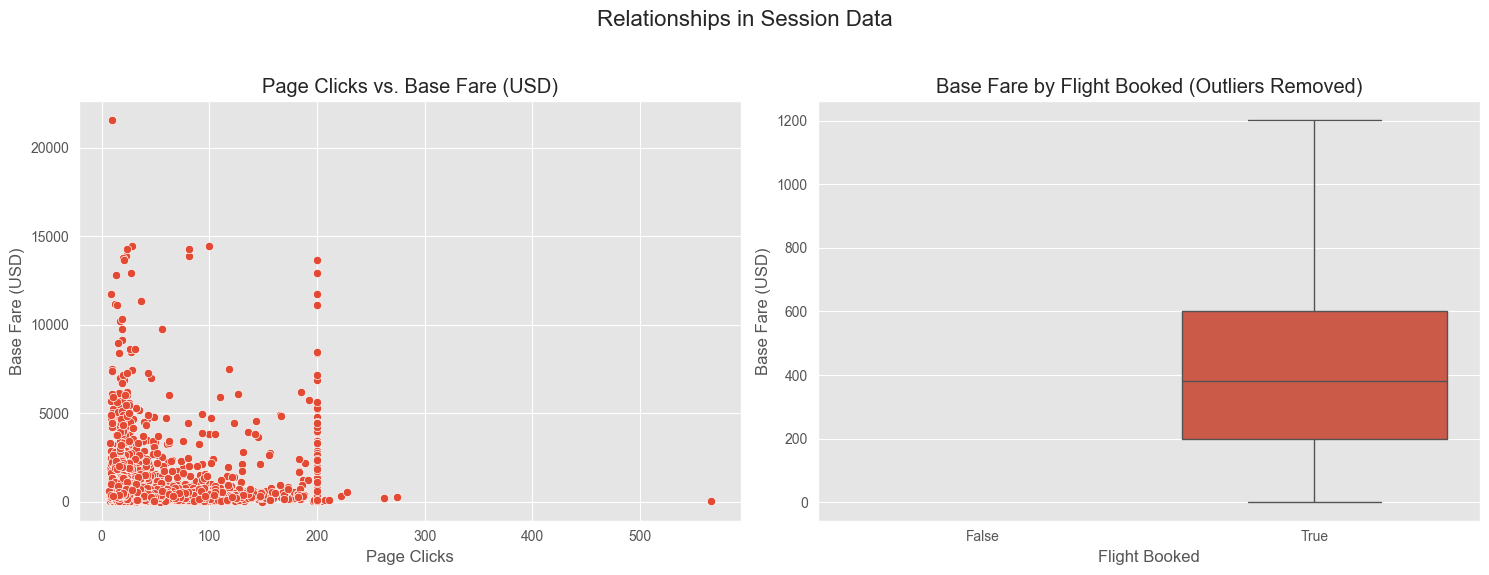

✅ Saved: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/session_relationships.png

🎉 All df_session visualizations successfully generated and saved!


In [33]:
generate_df_session_visualizations(df_sessions_cleaned)

### ✅ Bild 1 – „Distribution of Session Metrics“

Dieses Bild zeigt vier Histogramme zu Nutzerverhalten und Preisen.

- **Page Clicks:** Die meisten Sessions haben **unter 20 Klicks**, nur wenige über 100 – es gibt einzelne extreme Ausreißer bis **über 500 Klicks**.
- **Nights Booked:** Die meisten Buchungen liegen bei **2–4 Nächten**, wenige Nutzer buchen lange Aufenthalte über **10 Nächte**.
- **Base Fare (Flugpreis):** Die meisten Flugpreise liegen **unter 1.000 USD**, aber es gibt starke Ausreißer bis **über 20.000 USD**.
- **Hotel Price/Nacht:** Die typische Nacht kostet **120–200 USD**, nur wenige Fälle sind extrem teuer (über **1.000 USD**).

### ✅ Bild 2 – „Booking and Discount Statuses“

Hier wird gezählt, wie oft etwas gebucht wurde oder ein Rabatt angewendet wurde.

- **Buchungen:** Ca. **14.000–15.000** Nutzer buchen Flug oder Hotel, aber **über 34.000** Nutzer schauen nur, ohne zu buchen.
- **Rabatte:** Nur **7.000–9.000** Fälle nutzen einen Rabatt, während über **40.000** Sitzungen ohne Rabatt stattfinden.
- → Das heißt: Viele Nutzer suchen, aber ein kleinerer Teil bucht wirklich, und Rabatte sind eher selten.

### ✅ Bild 3 – „Relationships in Session Data“

Hier werden Zusammenhänge untersucht.

- **Page Clicks vs. Base Fare:** Es gibt **keine klare Beziehung** – viele Nutzer klicken viel, aber buchen trotzdem billige Flüge; einige extrem teure Flüge sind Ausreißer.
- **Base Fare by Flight Booked:** Wenn ein Flug gebucht wird, liegt der typische Preis im Bereich von **350–400 USD**. Bei „nicht gebucht“ stehen viele Werte bei **0 USD**, was logisch ist – kein Kauf → kein Preis.


# Creat sessions- Dashboard (df_sessions_cleaned)


In [34]:
def create_session_dashboard(df):
    """
    Analysiert das Nutzerverhalten (Sessions) und erstellt ein Dashboard.
    """
    print("\nCreating Session Dashboard...")
    df = df.copy()
    # --- 1. Kundenalter (in Monaten seit Anmeldung) ---
    df = calculate_customer_age(df)
    avg_customer_age = df["customer_age_months"].mean()
    # --- 2. Sitzungslänge / Klicks ---
    avg_clicks = df["page_clicks"].mean()
    clicks_distribution = df["page_clicks"]
    # --- Plotting ---
    fig = plt.figure(figsize=(18, 6))
    fig.suptitle(
        "Session Dashboard: User Behavior Analysis", fontsize=18, fontweight="bold"
    )
    gs = fig.add_gridspec(1, 3)
    ax1 = fig.add_subplot(gs[0, 0])  # Avg Clicks
    ax2 = fig.add_subplot(gs[0, 1])  # Avg Customer Age
    ax3 = fig.add_subplot(gs[0, 2])  # Clicks Distribution
    # Plot 1: Average Page Clicks (KPI Card simulation with text)
    ax1.text(
        0.5,
        0.5,
        f"{avg_clicks:.1f}",
        ha="center",
        va="center",
        fontsize=50,
        color="teal",
    )
    ax1.set_title("Average Page Clicks per Session", fontsize=14)
    ax1.axis("off")
    # Plot 2: Average Customer Age (KPI Card simulation with text)
    ax2.text(
        0.5,
        0.5,
        f"{avg_customer_age:.1f}",
        ha="center",
        va="center",
        fontsize=50,
        color="darkorange",
    )
    ax2.set_title("Average Customer Age (Months Since Signup)", fontsize=14)
    ax2.axis("off")
    # Plot 3: Page Clicks Distribution
    sns.histplot(
        clicks_distribution.dropna(), bins=20, kde=True, ax=ax3, color="indigo"
    )
    ax3.set_title("Distribution of Page Clicks")
    ax3.set_xlabel("Page Clicks")
    ax3.set_ylabel("Session Count")
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    path = os.path.join(dashboard_path, "session_dashboard.png")
    plt.savefig(path, dpi=300)
    print(f":weißes_häkchen: Session dashboard saved at: {path}")
    plt.show()


Creating Session Dashboard...
:weißes_häkchen: Session dashboard saved at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/dashboard/session_dashboard.png


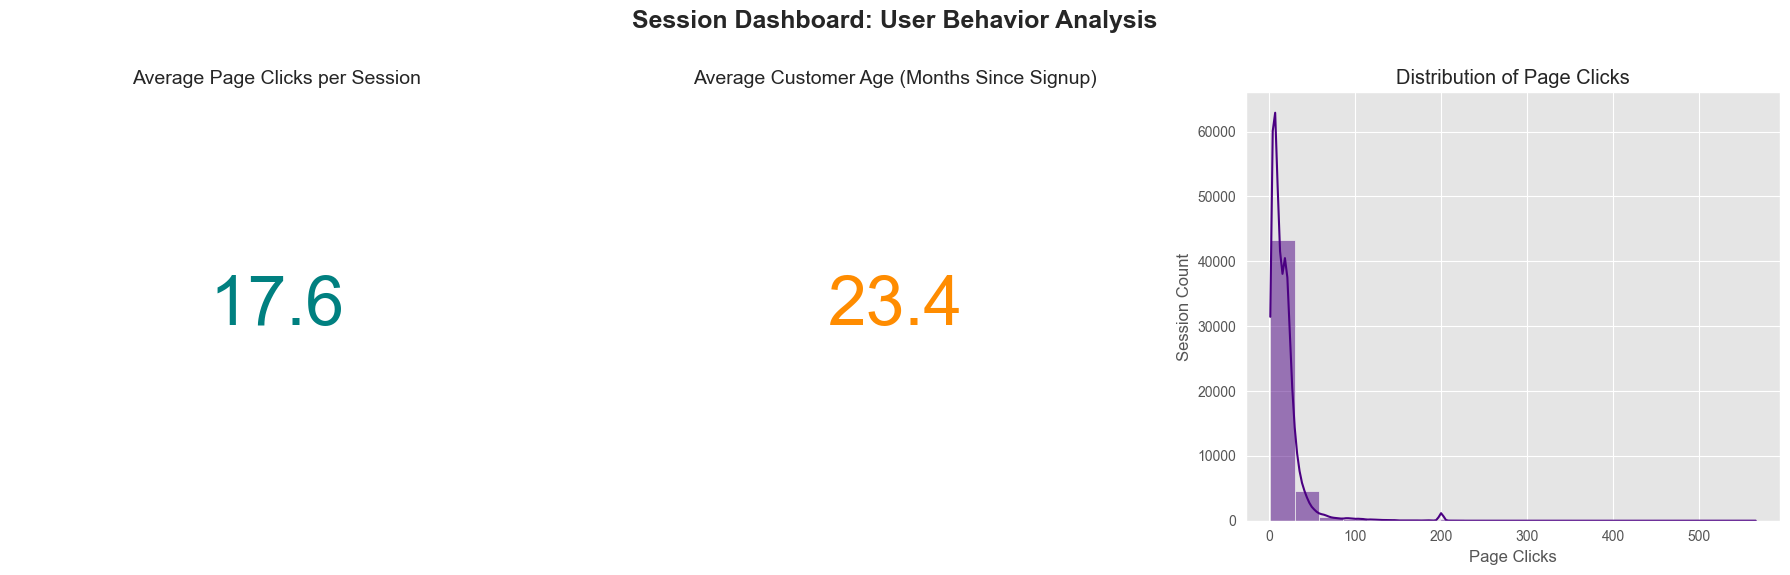

In [35]:
create_session_dashboard(df_sessions_cleaned)

In [36]:
def classify_booking(row):
    """Klassifiziert den Buchungstyp."""
    if row["flight_booked"] and row["hotel_booked"]:
        return "Flight + Hotel"
    elif row["flight_booked"]:
        return "Flight Only"
    elif row["hotel_booked"]:
        return "Hotel Only"
    else:
        return "No Booking"


def create_booking_dashboard(df):
    """
    Analysiert Buchungsdaten (Flüge und Hotels) und erstellt ein Dashboard.
    """
    print("\nCreating Booking Dashboard...")
    df = df.copy()
    # --- 1. Booking Type Classification (wie in Ihrer Vorlage) ---
    # Behalte alle Zeilen, um die "No Booking" Sessions zu zählen
    df["booking_type"] = df.apply(classify_booking, axis=1)
    booking_counts = df["booking_type"].value_counts()
    # --- Vorbereitung für Hotel/Flug-Statistiken ---
    # Berechne die Hotel-Gesamtkosten für die Analyse, da die Kosten über zwei Spalten verteilt sind
    df["hotel_total_price"] = df["hotel_price_per_room_night_usd"] * df["nights"]
    # Filtern für detaillierte Buchungsanalysen (Flüge/Hotels)
    df_booked = (
        df[(df["flight_booked"] == True) | (df["hotel_booked"] == True)]
        .dropna(subset=["trip_airline", "hotel_name", "nights"])
        .copy()
    )
    # --- 2. Top 10 Hotels ---
    hotel_stats = (
        df_booked[df_booked["hotel_booked"] == True]
        .groupby("hotel_name")
        .agg(
            booking_count=("session_id", "count"),
            avg_nights=("nights", "mean"),
            # Verwende die berechnete Hotel-Gesamtkosten für den Durchschnittspreis
            avg_price_total=("hotel_total_price", "mean"),
        )
        .reset_index()
    )
    top_10_hotels = hotel_stats.sort_values(by="booking_count", ascending=False).head(
        10
    )
    # --- 3. Airline Seats ---
    airline_seats = (
        df_booked[df_booked["flight_booked"] == True]
        .groupby("trip_airline")["seats"]
        .agg(["count", "mean"])
        .sort_values(by="count", ascending=False)
        .head(5)
    )
    # --- Plotting ---
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(
        "Booking Dashboard: Flight and Hotel Analysis", fontsize=18, fontweight="bold"
    )
    gs = fig.add_gridspec(3, 2)
    ax1 = fig.add_subplot(gs[0, 0])  # Booking Type Pie
    ax2 = fig.add_subplot(gs[0, 1])  # Top 10 Hotels
    ax3 = fig.add_subplot(gs[1, :])  # Hotel Stats Table
    ax4 = fig.add_subplot(gs[2, 0])  # Airline Bookings
    ax5 = fig.add_subplot(gs[2, 1])  # Seats per Airline
    # Plot 1: Booking Type Distribution
    ax1.pie(
        booking_counts,
        labels=booking_counts.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette("coolwarm", len(booking_counts)),
    )
    ax1.set_title("Booking Type Distribution (Hotel + Flight Combos)")
    # Plot 2: Top 10 Hotels (Booking Count)
    sns.barplot(
        x="booking_count",
        y="hotel_name",
        hue="hotel_name",
        data=top_10_hotels,
        ax=ax2,
        palette="magma",
    )
    ax2.set_title("Top 10 Most Booked Hotels")
    ax2.set_xlabel("Booking Count")
    ax2.set_ylabel("Hotel Name")
    # Plot 3: Hotel Statistics Table
    ax3.axis("off")
    ax3.set_title("Hotel Performance Metrics (Top 10)")
    # Format the table data
    table_data = top_10_hotels.drop(columns=["booking_count"]).round(1)
    table_data = table_data.rename(
        columns={
            "hotel_name": "Hotel",
            "avg_nights": "Avg Nights",
            "avg_price_total": "Avg Price Total (USD)",
        }
    )
    # Create the table (only if data exists)
    if not table_data.empty:
        table = ax3.table(
            cellText=table_data.values,
            colLabels=table_data.columns,
            loc="center",
            cellLoc="center",
            colColours=["#F5F5F5"] * len(table_data.columns),
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.0, 1.5)
    # Plot 4: Top 5 Airlines (by booking count)
    if not airline_seats.empty:
        sns.barplot(
            x="count",
            y=airline_seats.index,
            data=airline_seats,
            hue=airline_seats.index,
            ax=ax4,
            palette="viridis",
        )
        ax4.set_title("Top 5 Airlines by Booking Count")
        ax4.set_xlabel("Booking Count")
        ax4.set_ylabel("Airline")
    else:
        ax4.set_title("Top 5 Airlines: Keine Daten")
        ax4.axis("off")
    # Plot 5: Average Seats per Airline
    if not airline_seats.empty:
        sns.barplot(
            x="mean",
            y=airline_seats.index,
            data=airline_seats,
            hue=airline_seats.index,
            ax=ax5,
            palette="cividis",
        )
        ax5.set_title("Avg Seats per Booking (Top 5 Airlines)")
        ax5.set_xlabel("Average Seats")
        ax5.set_ylabel("Airline")
    else:
        ax5.set_title("Avg Seats: Keine Daten")
        ax5.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    path = os.path.join(dashboard_path, "booking_dashboard.png")
    plt.savefig(path, dpi=300)
    print(f":weißes_häkchen: Booking dashboard saved at: {path}")
    plt.show()


Creating Booking Dashboard...
:weißes_häkchen: Booking dashboard saved at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/eda/viz/dashboard/booking_dashboard.png


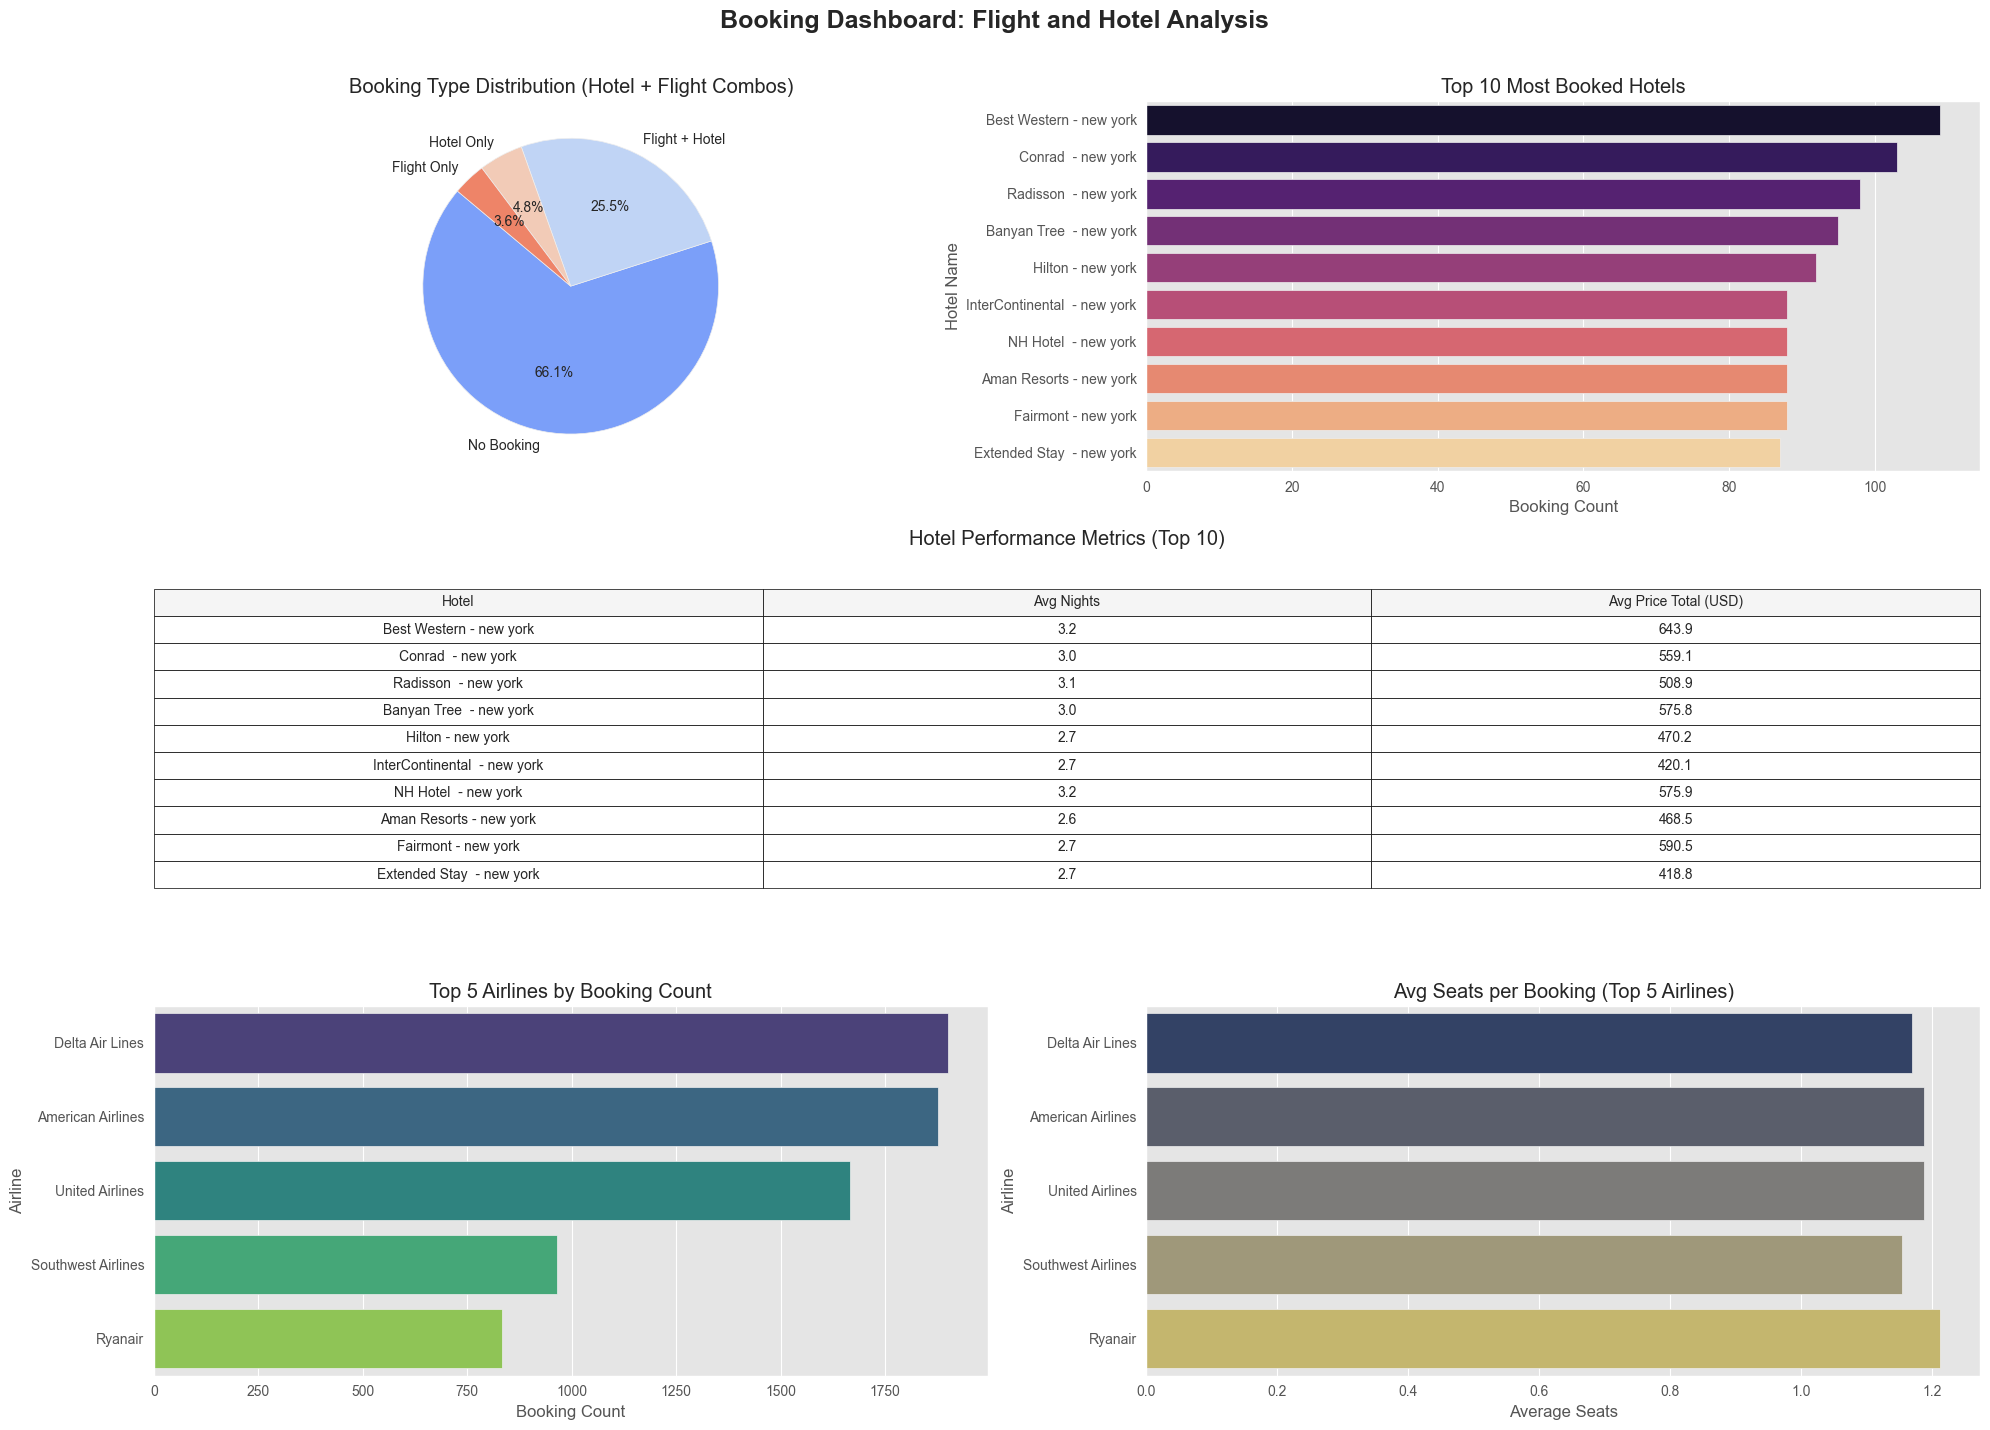

In [37]:
create_booking_dashboard(df_sessions_cleaned)